___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score, PrecisionRecallDisplay, plot_precision_recall_curve, plot_roc_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from pyclustertend import hopkins

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [330]:
df = pd.read_csv("HR_Dataset.csv")

In [331]:
df_copy = df.copy()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [333]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [334]:
df.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Departments  salary  
14994                      0      support    low  
14995                      0      support    low  
14996                      0      support    low  
14997                      0      support    low  
14998                      0      support    low

In [335]:
df.sample(20)

satisfaction_level  last_evaluation  number_project  \
2302                 0.56             0.62               5   
8289                 0.89             0.98               3   
2867                 0.44             0.68               3   
3120                 0.83             0.59               5   
963                  0.37             0.51               2   
1745                 0.09             0.78               6   
14967                0.43             0.51               2   
5600                 0.22             0.58               2   
8270                 0.38             0.42               2   
12361                0.76             0.90               4   
483                  0.42             0.54               2   
255                  0.44             0.45               2   
8074                 0.26             0.98               5   
5920                 0.81             0.62               4   
9581                 0.74             0.54               5   
14898                0.10             0.90               7   
8003                 0.69             0.69               3   
3369                 0.69             0.53               3   
5079                 0.86             0.53               4   
12299                0.74             0.84               5   

       average_montly_hours  time_spend_company  Work_accident  left  \
2302                    238                   3              0     0   
8289                    214                   3              0     0   
2867                    140                   3              0     0   
3120                    160                   4              0     0   
963                     140                   3              0     1   
1745                    260                   4              0     1   
14967                   128                   3              0     1   
5600                    255                   5              0     0   
8270                    127                   4              0     0   
12361                   263                   5              0     1   
483                     143                   3              1     1   
255                     156                   3              0     1   
8074                    161                   5              0     0   
5920                    255                   4              1     0   
9581                    221                   3              0     0   
14898                   269                   4              0     1   
8003                    236                   4              0     0   
3369                    135                   2              0     0   
5079                    244                   3              0     0   
12299                   249                   5              0     1   

       promotion_last_5years Departments   salary  
2302                       0        sales     low  
8289                       0    technical  medium  
2867                       0    technical     low  
3120                       0  product_mng     low  
963                        0      support  medium  
1745                       0           IT  medium  
14967                      0        sales     low  
5600                       0        sales  medium  
8270                       0        sales  medium  
12361                      0      support     low  
483                        0        sales     low  
255                        0        sales  medium  
8074                       0           IT  medium  
5920                       0    technical     low  
9581                       0    technical  medium  
14898                      0   accounting  medium  
8003                       0  product_mng  medium  
3369                       0        sales     low  
5079                       0    technical  medium  
12299                      0  product_mng  medium

In [336]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [337]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [338]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print()
    print(f"Value_counts of {col} column:\n", "--"*20,"\n", df[col].value_counts(dropna = False).head(10))
    print()
    if df[col].dtypes == "O" :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index(key = lambda x : x.str.lower()).head(10))
    else :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index().head(10))
    print()

In [339]:
for col in df.columns :
    first_look(col)

column name :  satisfaction_level
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  92

Value_counts of satisfaction_level column:
 ---------------------------------------- 
 0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.37    241
0.82    241
0.89    237
Name: satisfaction_level, dtype: int64

Value_counts of satisfaction_level column with sort_index : 
 ---------------------------------------- 
 0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
0.14     73
0.15     76
0.16     79
0.17     72
0.18     63
Name: satisfaction_level, dtype: int64

column name :  last_evaluation
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  65

Value_counts of last_evaluation column:
 ---------------------------------------- 
 0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
N

In [340]:
# descriptive statistics for numeric columns

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
last_evaluation       14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00
number_project        14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
average_montly_hours  14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
time_spend_company    14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
Work_accident         14999.00   0.14  0.35  0.00   0.00   0.00   0.00   1.00
left                  14999.00   0.24  0.43  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 14999.00   0.02  0.14  0.00   0.00   0.00   0.00   1.00

In [341]:
# descriptive statistics for categorical columns

df.describe(include="O").T

count unique    top  freq
Departments   14999     10  sales  4140
salary        14999      3    low  7316

In [342]:
df.groupby("left").describe()

satisfaction_level                                    last_evaluation  \
                  count mean  std  min  25%  50%  75%  max           count   
left                                                                         
0              11428.00 0.67 0.22 0.12 0.54 0.69 0.84 1.00        11428.00   
1               3571.00 0.44 0.26 0.09 0.13 0.41 0.73 0.92         3571.00   

                                        number_project                      \
     mean  std  min  25%  50%  75%  max          count mean  std  min  25%   
left                                                                         
0    0.72 0.16 0.36 0.58 0.71 0.85 1.00       11428.00 3.79 0.98 2.00 3.00   
1    0.72 0.20 0.45 0.52 0.79 0.90 1.00        3571.00 3.86 1.82 2.00 2.00   

                    average_montly_hours                                    \
      50%  75%  max                count   mean   std    min    25%    50%   
left                                                                         
0    4.00 4.00 6.00             11428.00 199.06 45.68  96.00 162.00 198.00   
1    4.00 6.00 7.00              3571.00 207.42 61.20 126.00 146.00 224.00   

                   time_spend_company                                      \
        75%    max              count mean  std  min  25%  50%  75%   max   
left                                                                        
0    238.00 287.00           11428.00 3.38 1.56 2.00 2.00 3.00 4.00 10.00   
1    262.00 310.00            3571.00 3.88 0.98 2.00 3.00 4.00 5.00  6.00   

     Work_accident                                    promotion_last_5years  \
             count mean  std  min  25%  50%  75%  max                 count   
left                                                                          
0         11428.00 0.18 0.38 0.00 0.00 0.00 0.00 1.00              11428.00   
1          3571.00 0.05 0.21 0.00 0.00 0.00 0.00 1.00               3571.00   

                                         
     mean  std  min  25%  50%  75%  max  
left                                     
0    0.03 0.16 0.00 0.00 0.00 0.00 1.00  
1    0.01 0.07 0.00 0.00 0.00 0.00 1.00

In [343]:
df.groupby("left").describe(include="O")

Departments                      salary                  
            count unique    top  freq  count unique  top  freq
left                                                          
0           11428     10  sales  3126  11428      3  low  5144
1            3571     10  sales  1014   3571      3  low  2172

In [344]:
# checking duplicates

df.duplicated().sum()

3008

In [345]:
# checking the percentage of duplicates in df

df.duplicated().sum()/df.shape[0]

0.2005467031135409

In [346]:
# dropping duplicates

# df = df.drop_duplicates().reset_index(drop=True)

In [348]:
# cleaning column names

from skimpy import clean_columns
df = clean_columns(df)
df.columns

2 column names have been cleaned

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [349]:
# changing the position of "left" column in df

df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'departments', 'salary','left']]

In [350]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count            11991.00         11991.00        11991.00   
mean                 0.63             0.72            3.80   
std                  0.24             0.17            1.16   
min                  0.09             0.36            2.00   
25%                  0.48             0.57            3.00   
50%                  0.66             0.72            4.00   
75%                  0.82             0.86            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  work_accident  \
count              11991.00            11991.00       11991.00   
mean                 200.47                3.36           0.15   
std                   48.73                1.33           0.36   
min                   96.00                2.00           0.00   
25%                  157.00                3.00           0.00   
50%                  200.00                3.00           0.00   
75%                  243.00                4.00           0.00   
max                  310.00               10.00           1.00   

       promotion_last_5years     left  
count               11991.00 11991.00  
mean                    0.02     0.17  
std                     0.13     0.37  
min                     0.00     0.00  
25%                     0.00     0.00  
50%                     0.00     0.00  
75%                     0.00     0.00  
max                     1.00     1.00

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

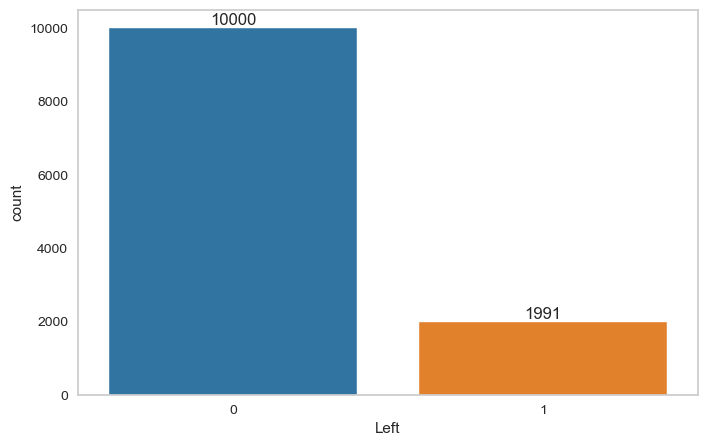

In [351]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="left", data=df, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

In [352]:
df.left.value_counts(normalize=True)

0   0.83
1   0.17
Name: left, dtype: float64

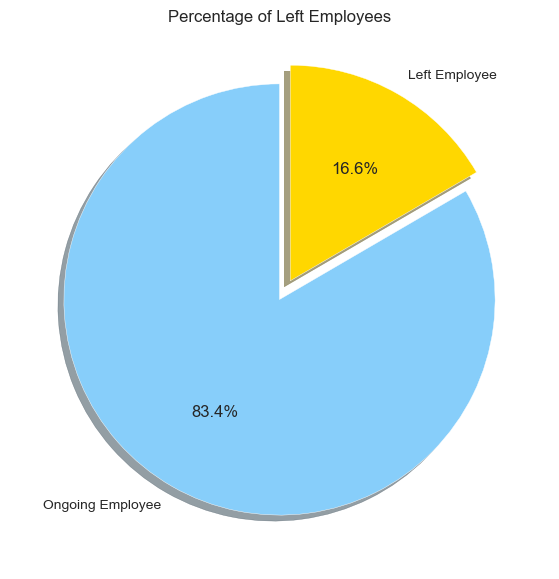

In [353]:
# Percentage of Employees based on the "left" feature

fig = plt.figure(figsize =(10, 7))
plt.pie(df.left.value_counts(normalize=True), 
        labels = ["Ongoing Employee","Left Employee"], explode = (0, 0.1),autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

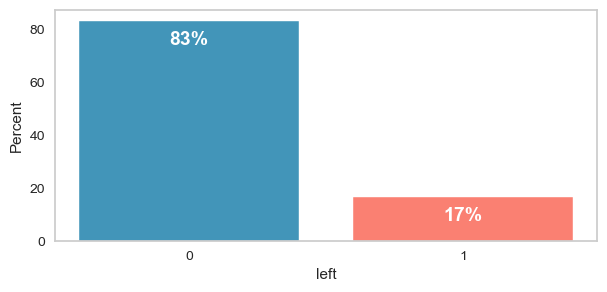

In [354]:
# Allen Hoca'dan

fig, ax = plt.subplots(figsize=(7, 3))
sns.histplot(x=df['left'], discrete=1, stat='percent', shrink=.8, kde=False, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.0f%%', padding=-20, fontsize=14, weight='bold', c='w');
ax.patches[1].set_facecolor('salmon')
plt.xticks([0, 1]);

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

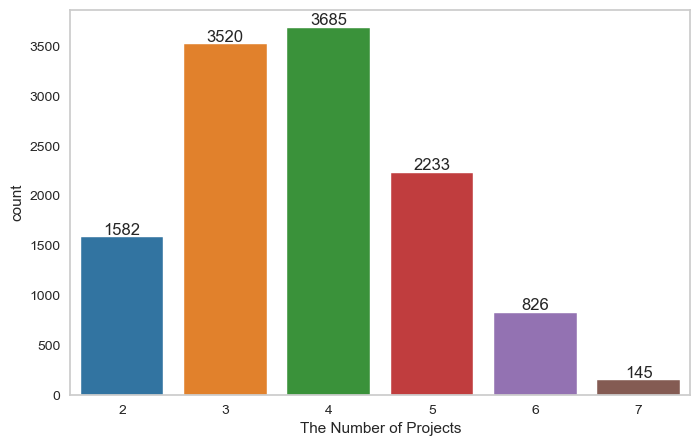

In [355]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
ax.bar_label(ax.containers[0]);

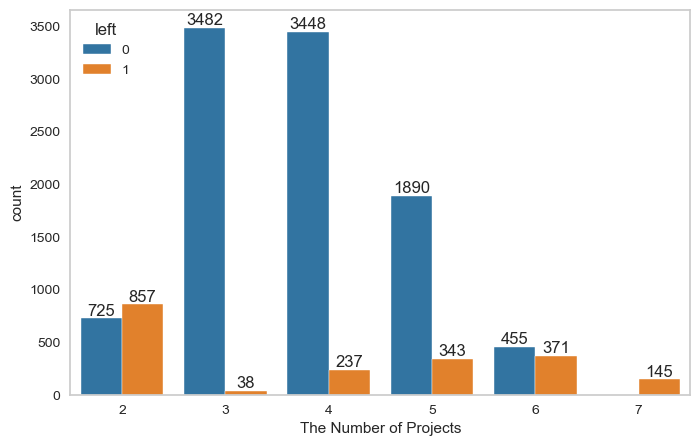

In [356]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", hue = "left", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
for i in ax.containers:
    ax.bar_label(i);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


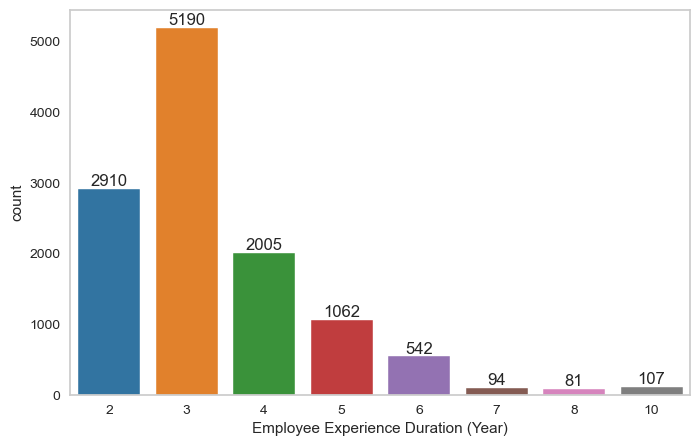

In [357]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", data=df, palette="tab10")
plt.xlabel("Employee Experience Duration (Year)")
ax.bar_label(ax.containers[0]);

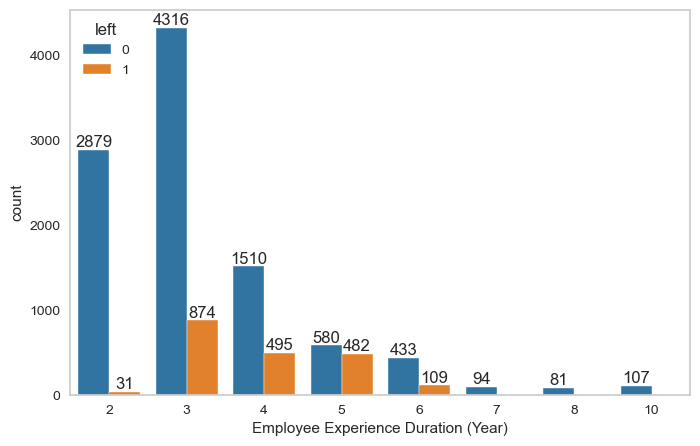

In [358]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", hue="left", data=df, palette = "tab10")
plt.xlabel("Employee Experience Duration (Year)")
for i in ax.containers:
    ax.bar_label(i)

### Work Accident

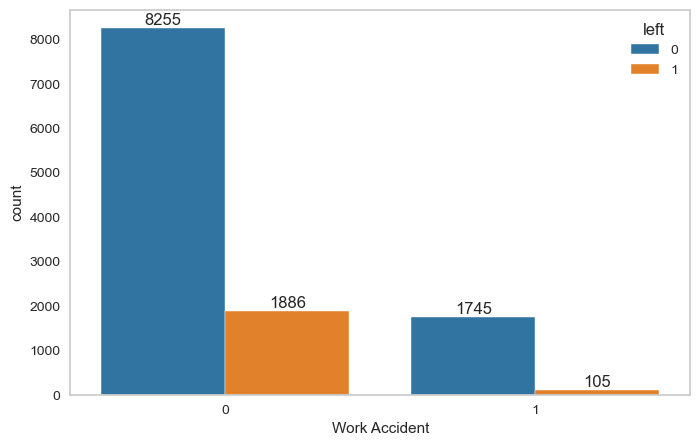

In [359]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="work_accident", hue="left", data=df, palette = "tab10")
plt.xlabel("Work Accident")
for i in ax.containers:
    ax.bar_label(i)

### promotion_last_5years

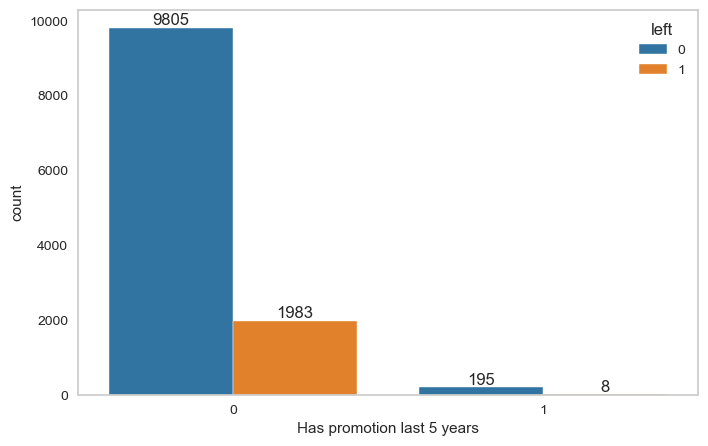

In [360]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df, palette = "tab10")
plt.xlabel("Has promotion last 5 years")
for i in ax.containers:
    ax.bar_label(i)

### Departments

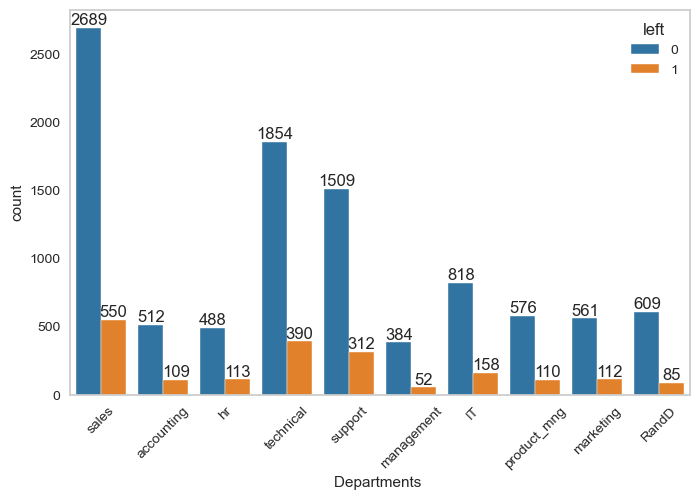

In [361]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="left", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

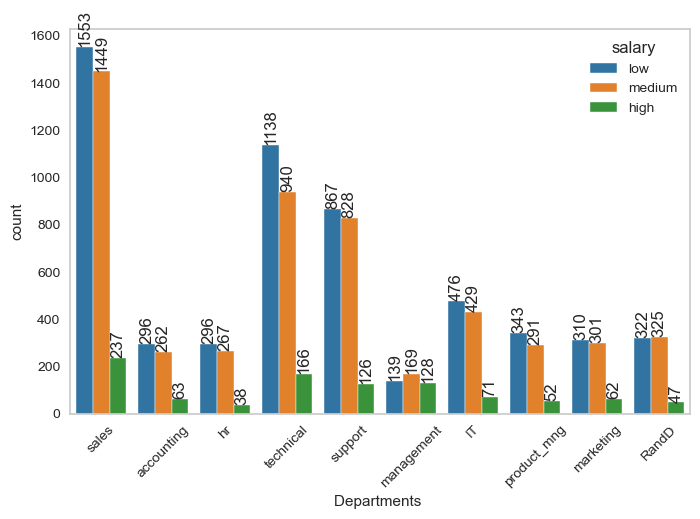

In [362]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="salary", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i, rotation=90)

### Salary

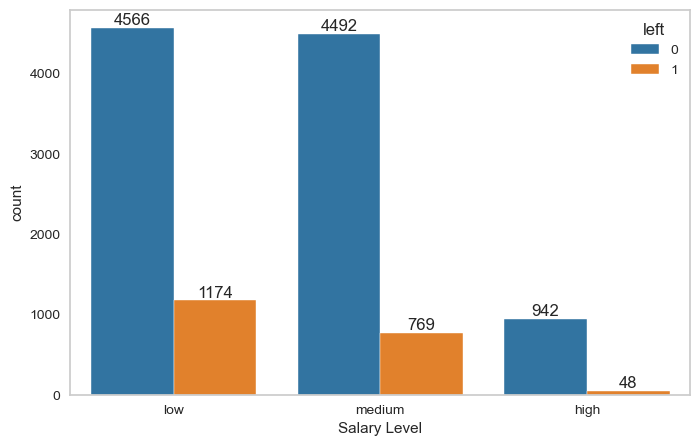

In [363]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

### Subplots of Features

You can use the methods of the matplotlib.

#### Distribution of numerical features

In [364]:
numeric = df.select_dtypes(exclude="O").columns
numeric

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'left'],
      dtype='object')

In [365]:
df[numeric].head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  left  
0                   3              0                      0     1  
1                   6              0                      0     1  
2                   4              0                      0     1  
3                   5              0                      0     1  
4                   3              0                      0     1

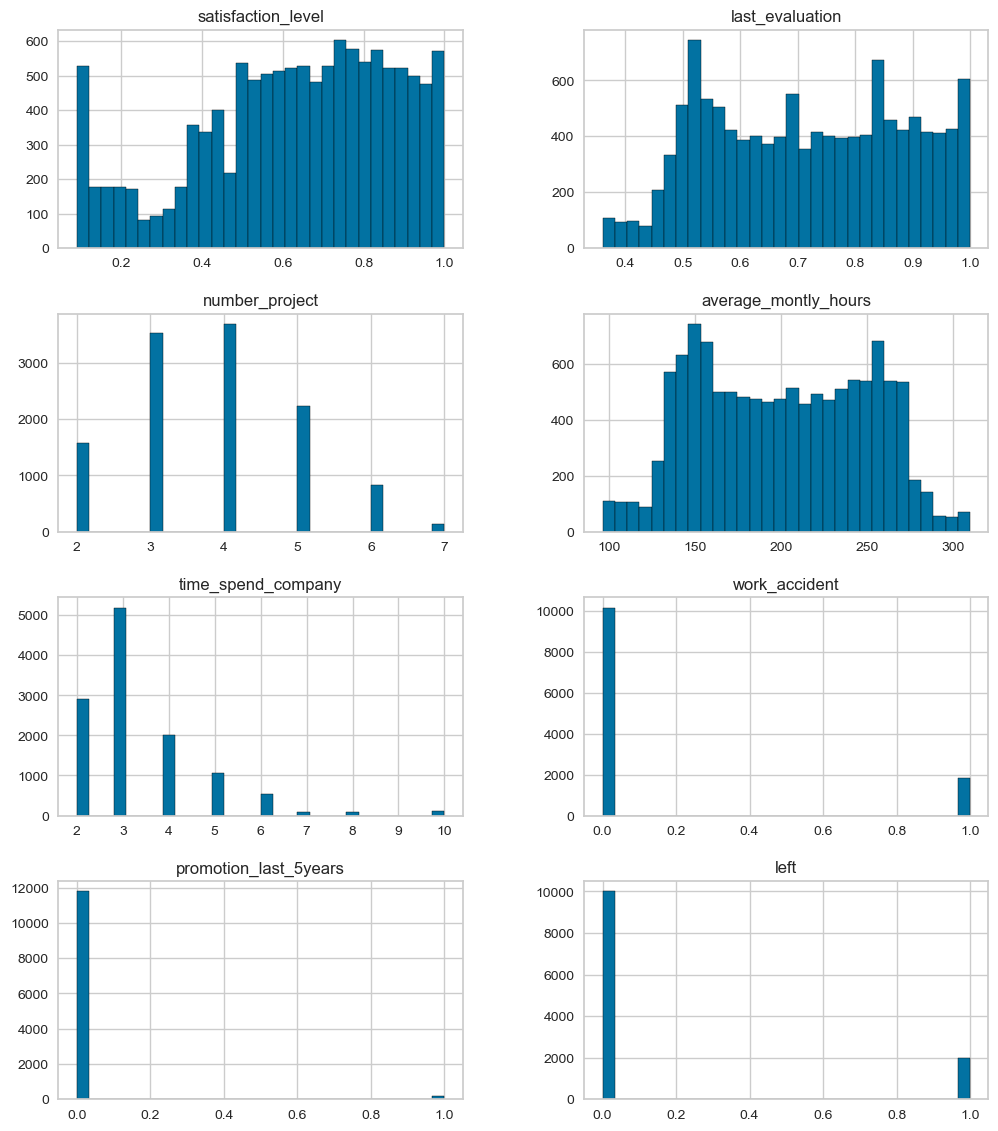

In [366]:
fig_ = df[numeric].hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");

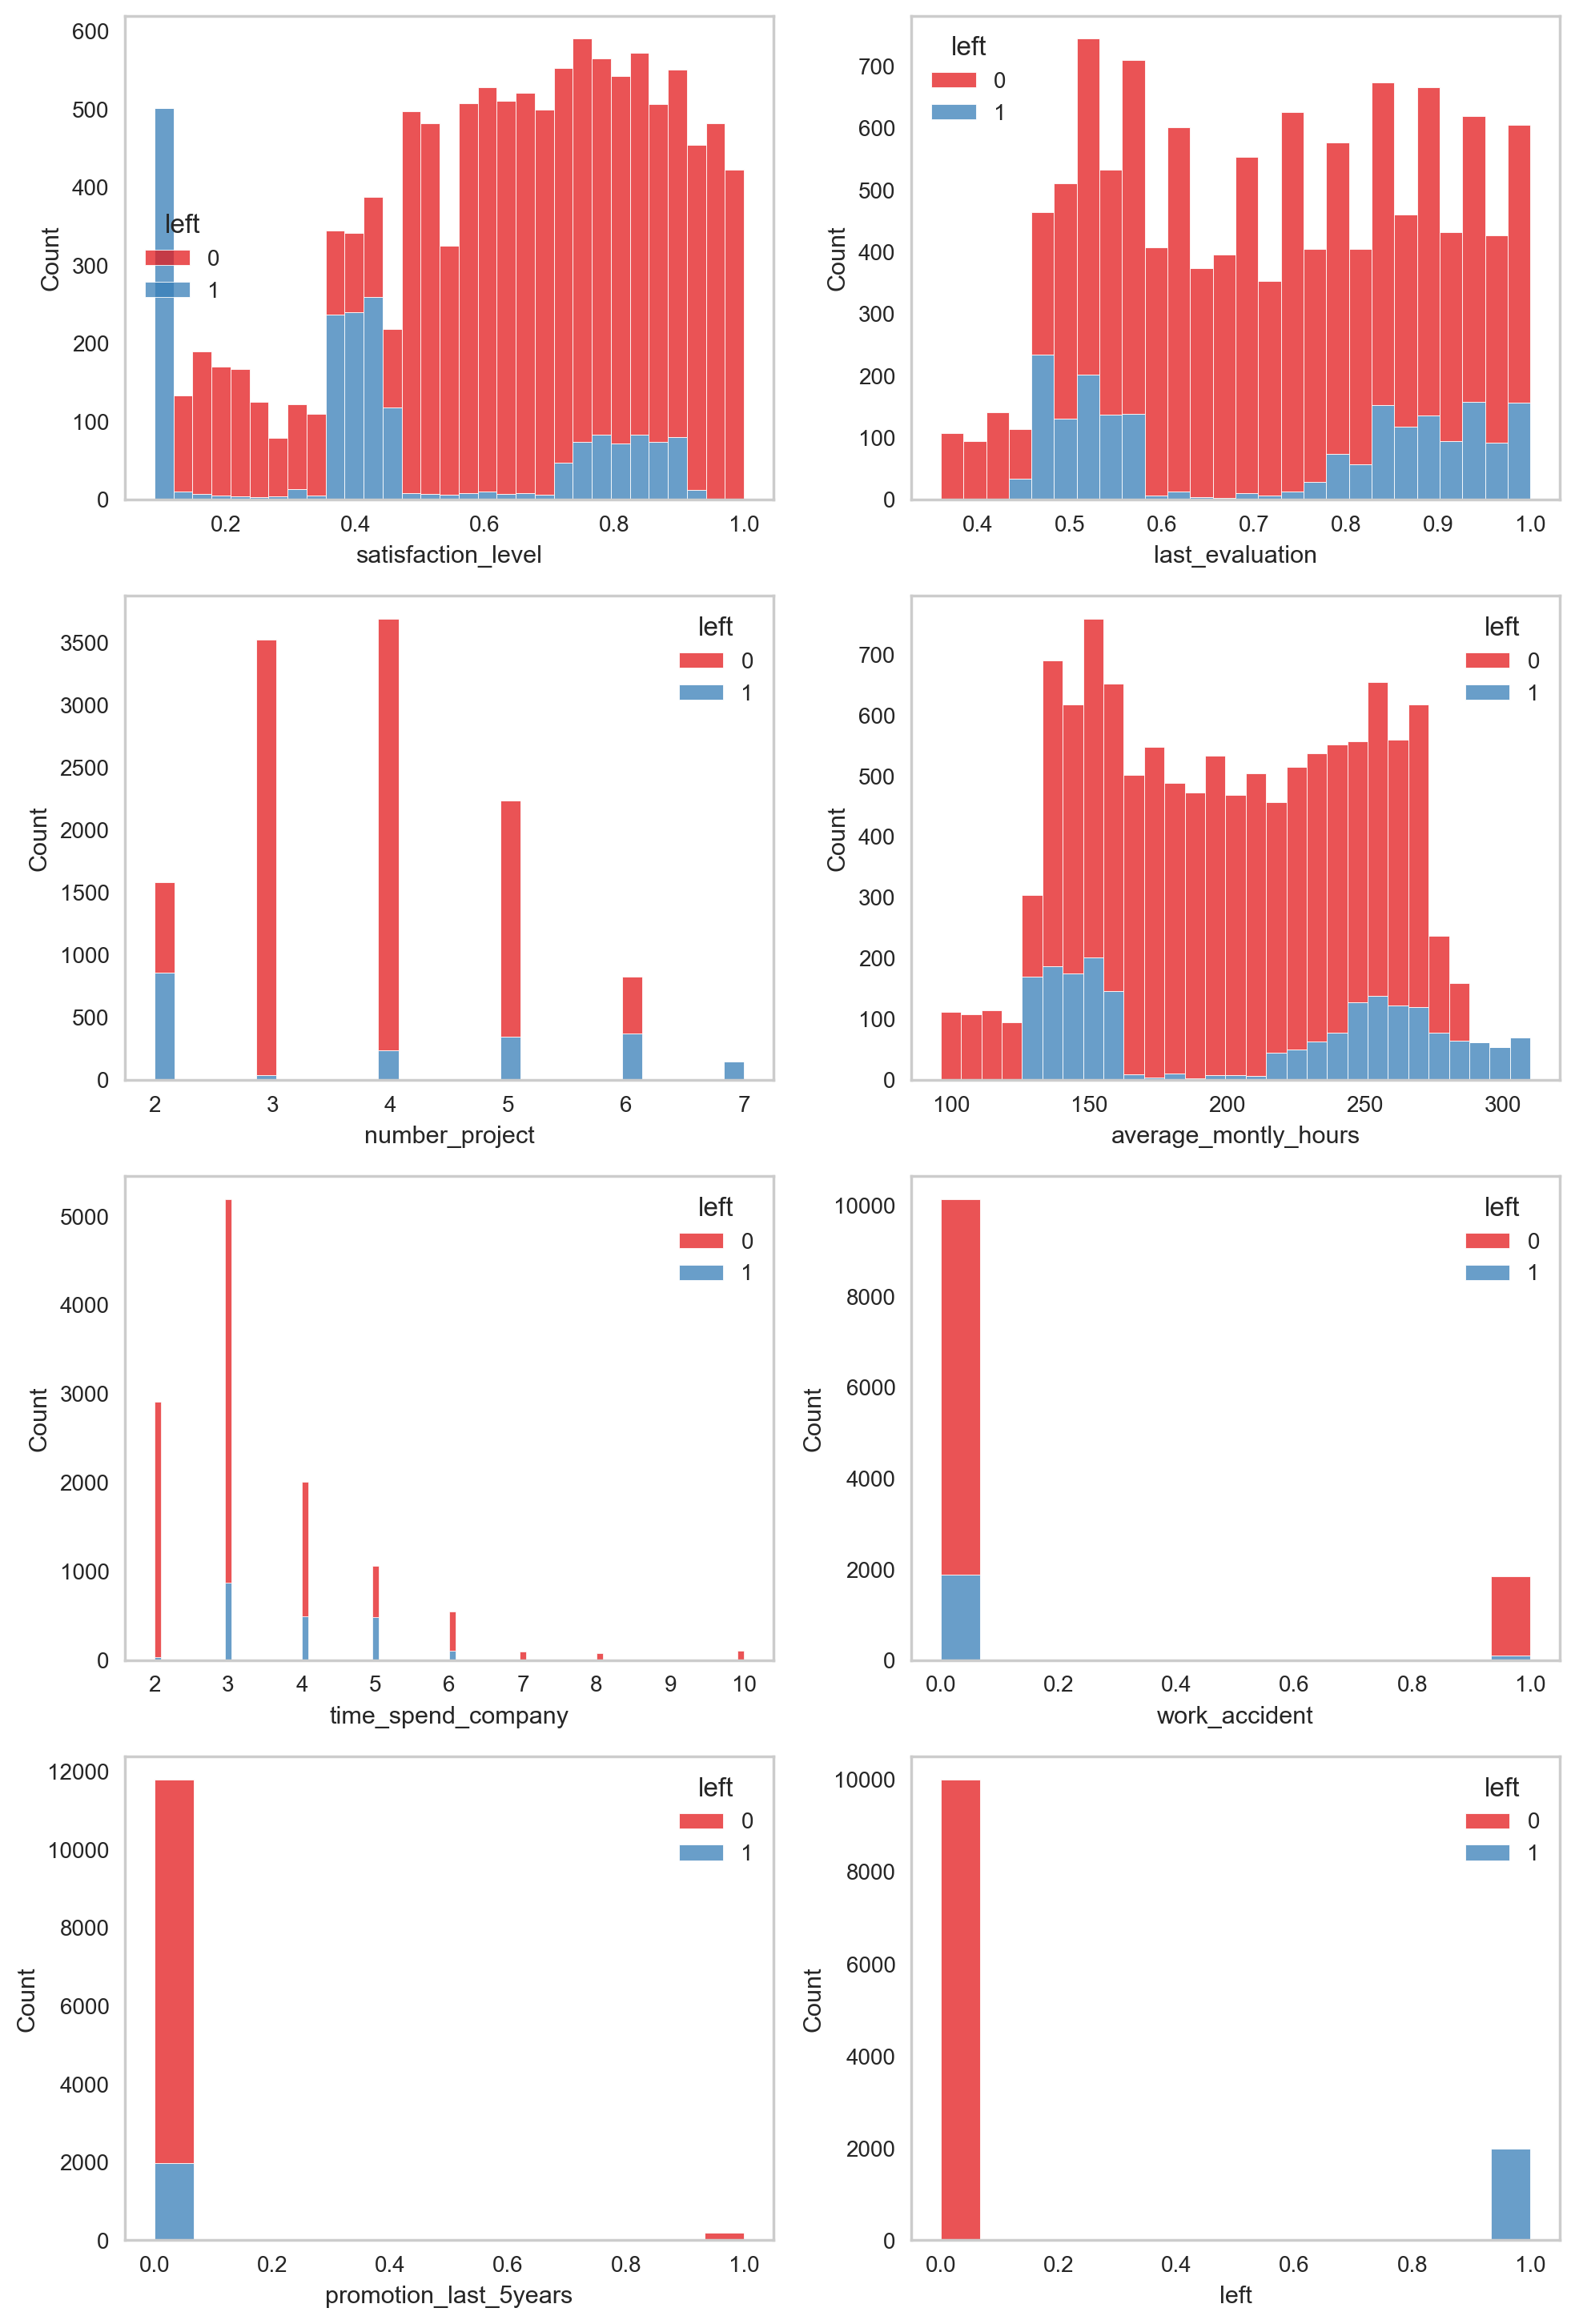

In [367]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric]):
        plt.subplot(10,2,i+1)
        sns.histplot(x= col, hue="left", data=df, multiple="stack", palette="Set1"
                    )
plt.tight_layout();

#### Boxplots for numerical features based on the "left" feature

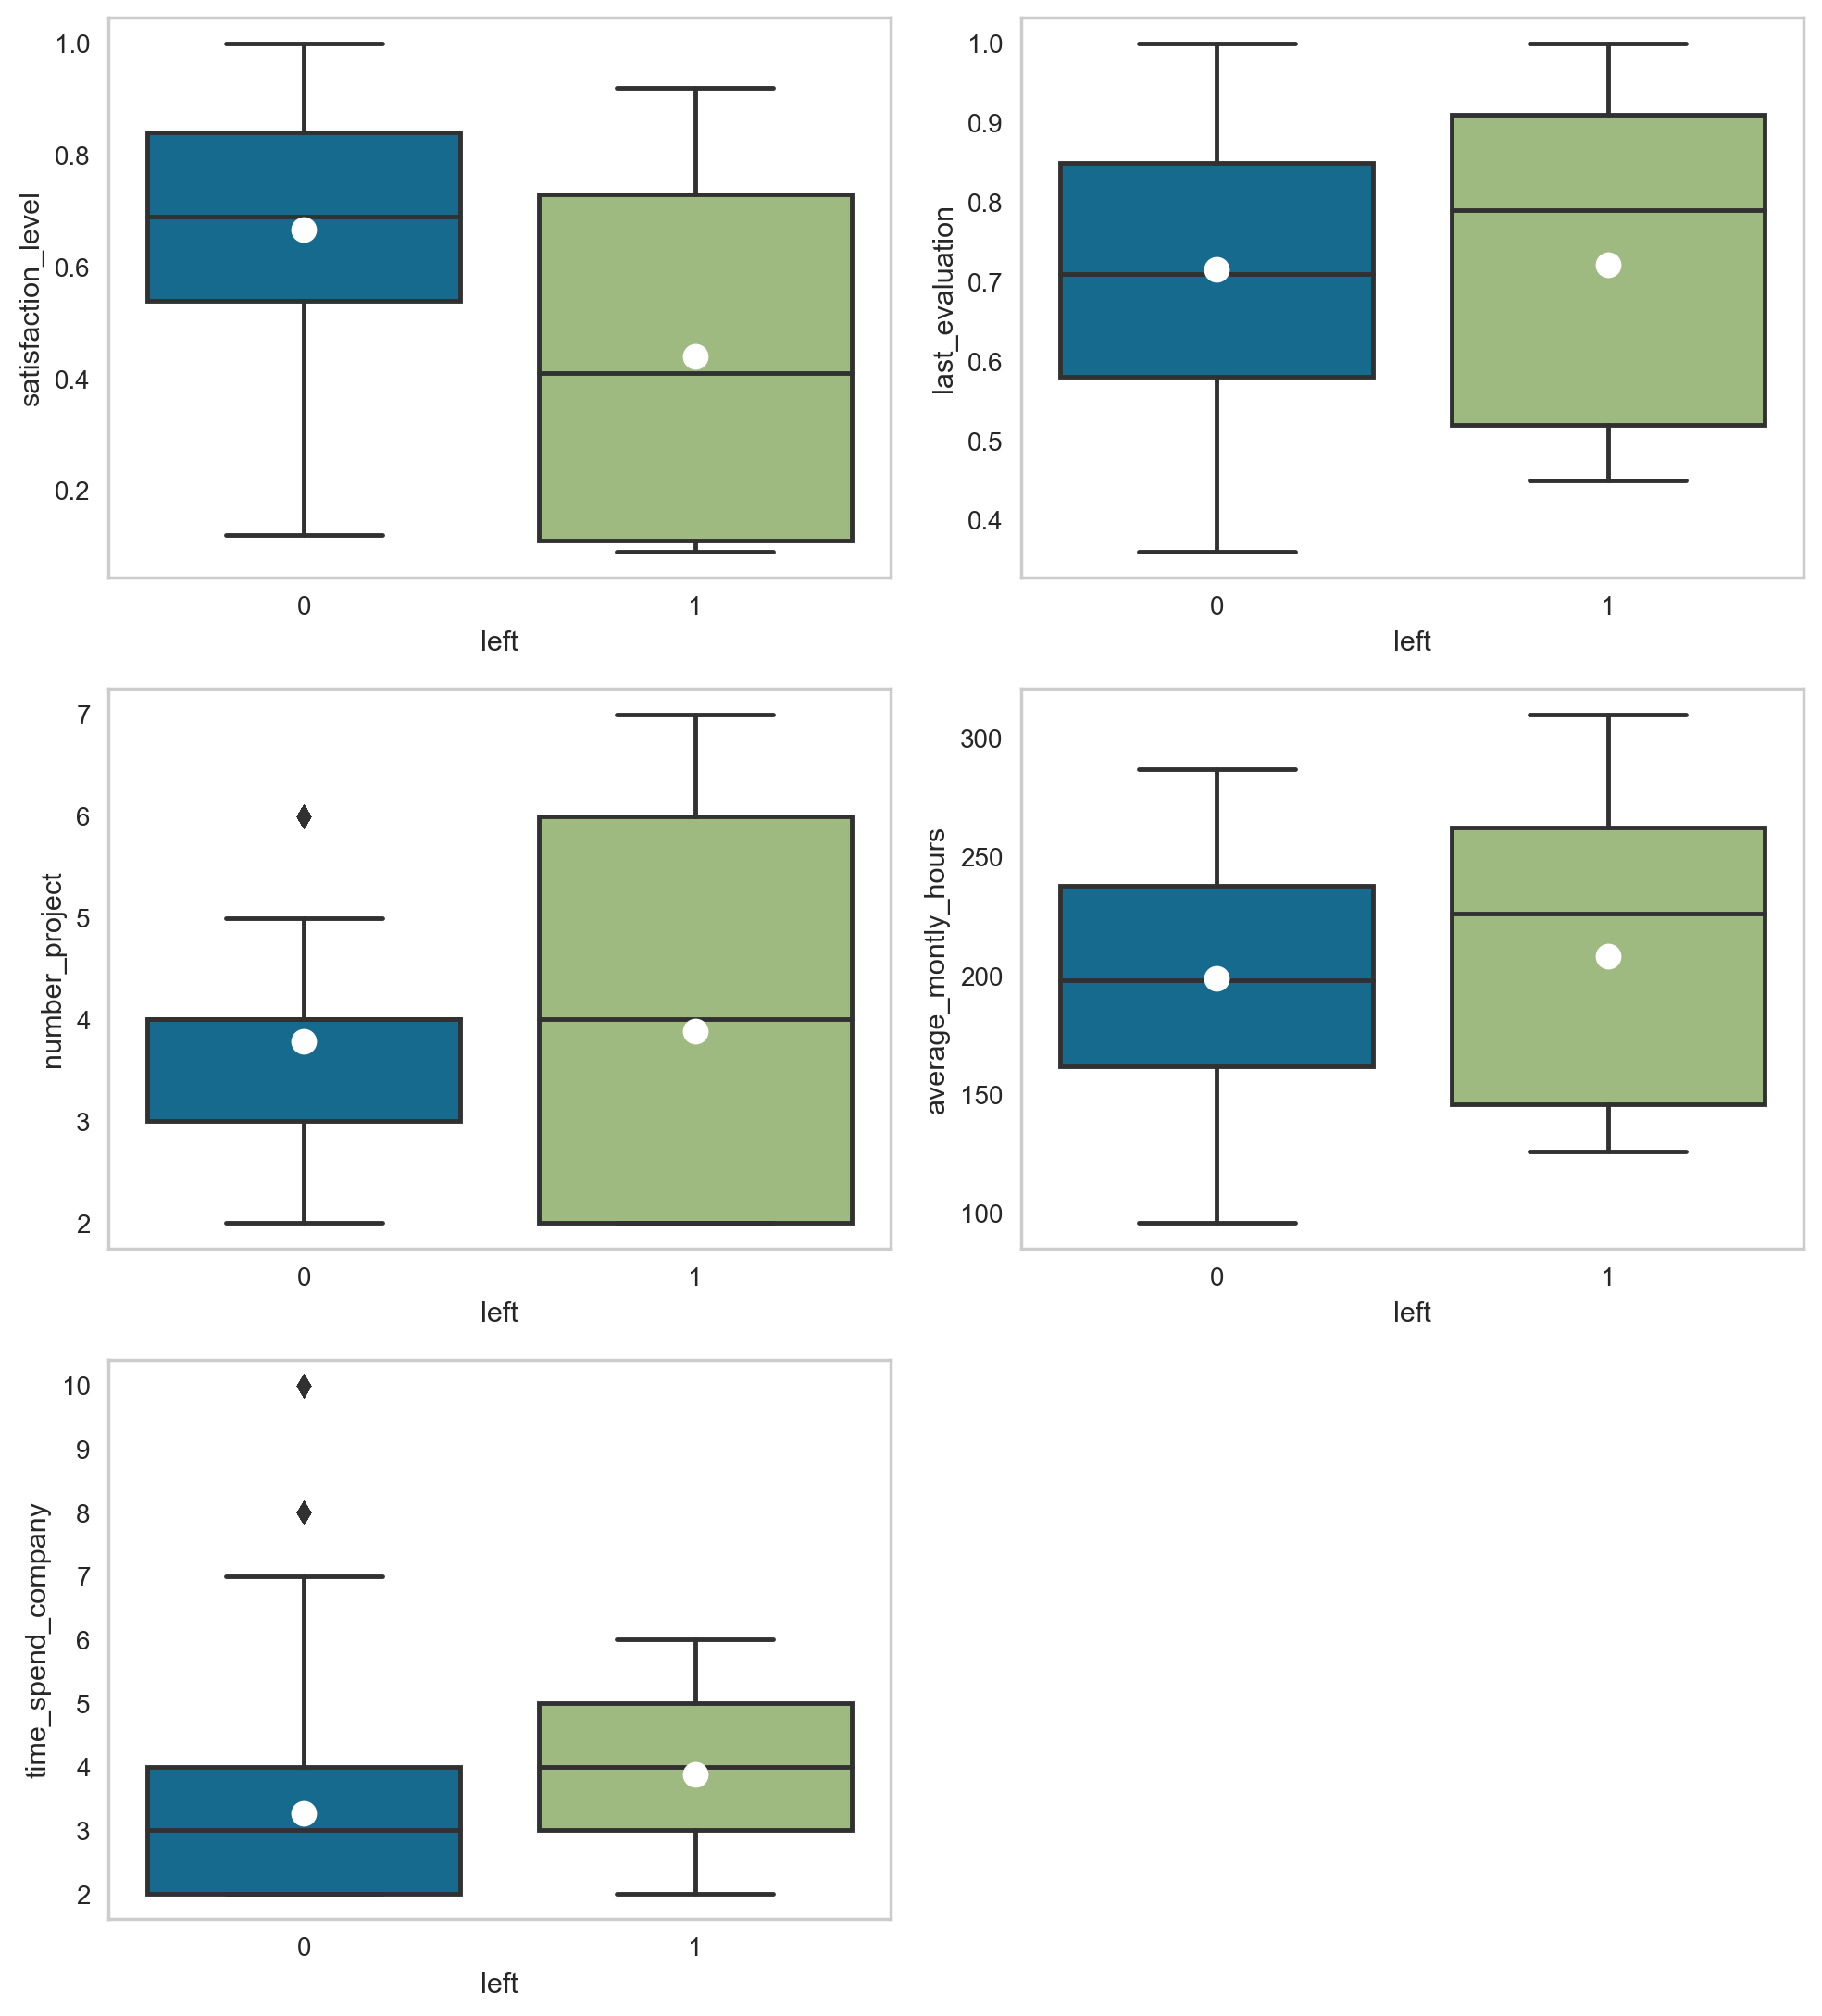

In [368]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric].iloc[:,:-3]):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "left", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

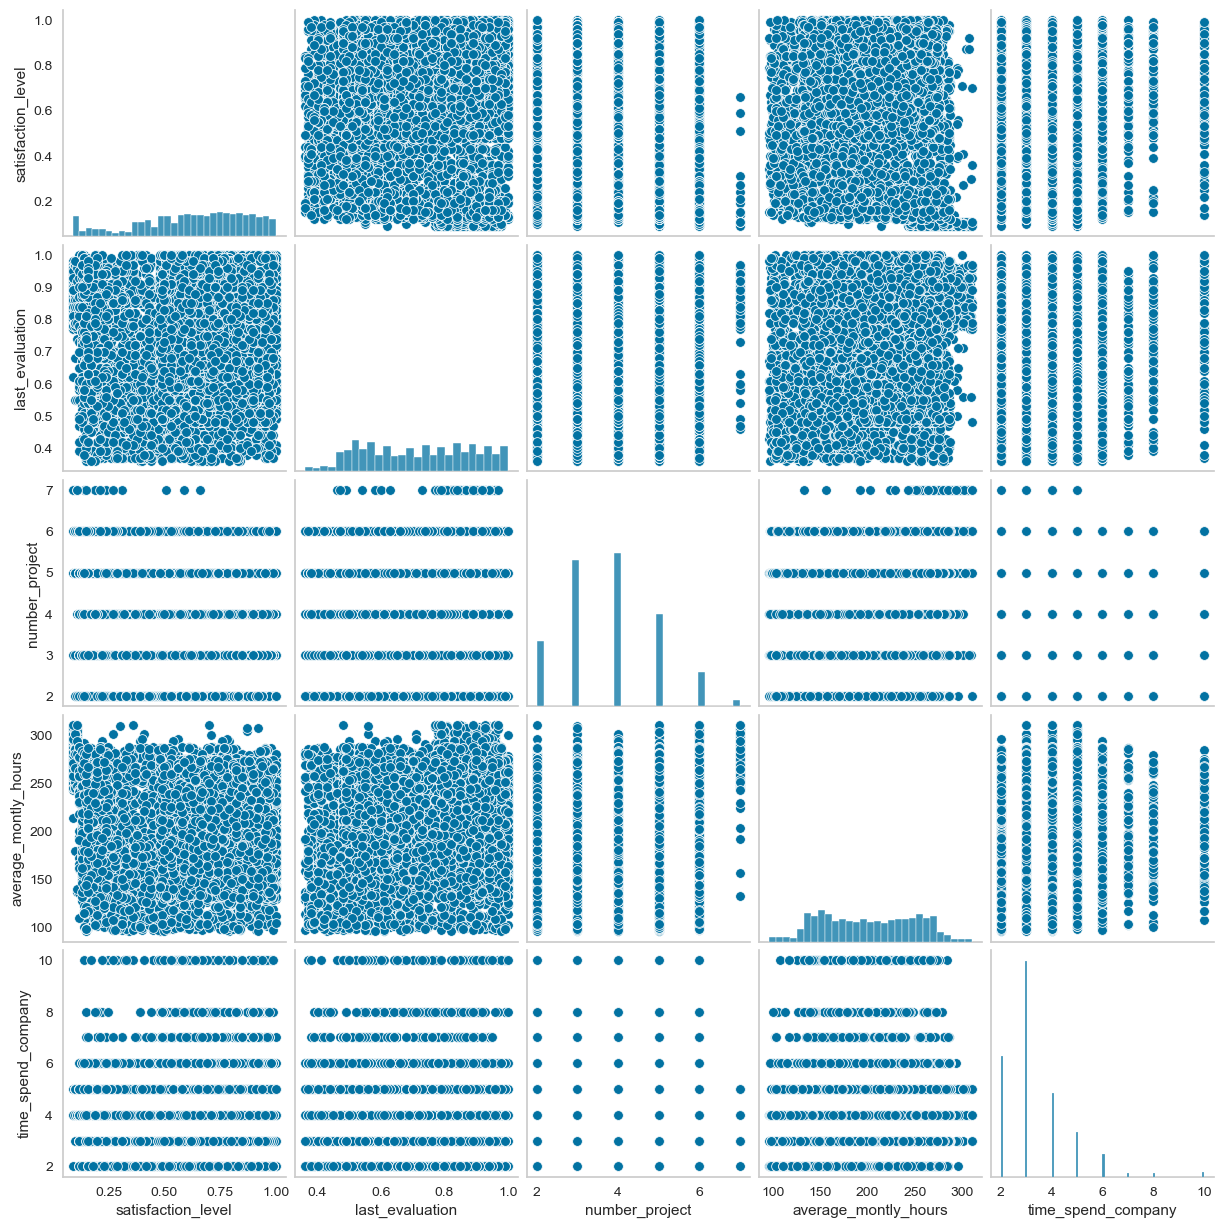

In [369]:
sns.pairplot(df[numeric].iloc[:,:-3]);

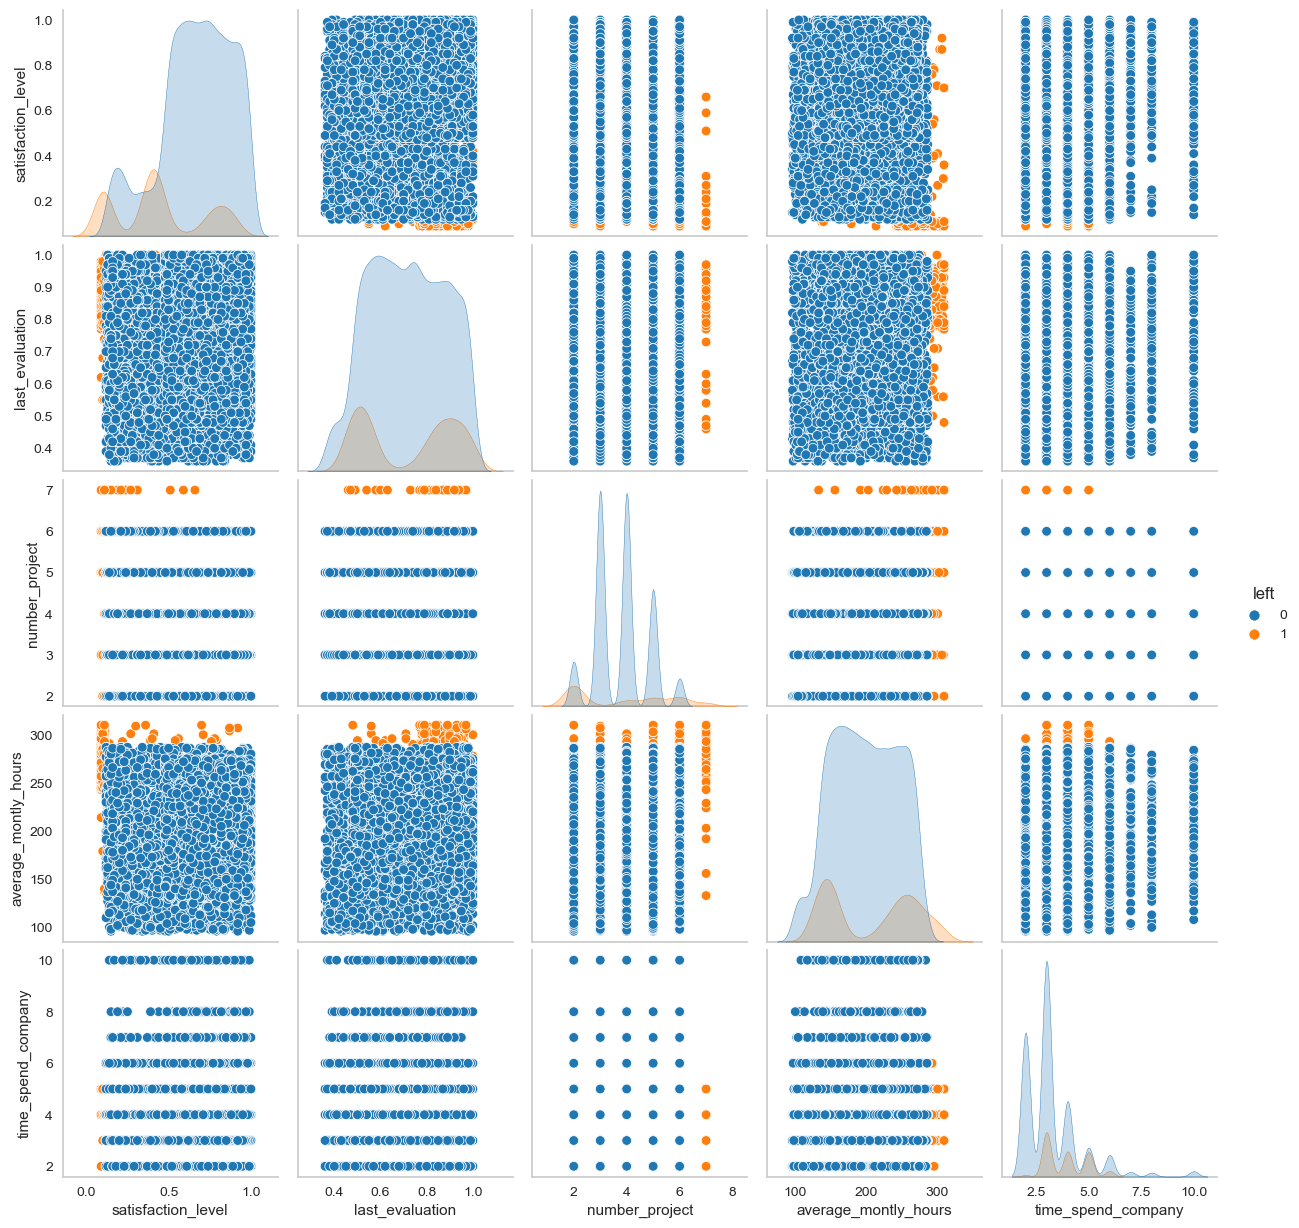

In [370]:
sns.pairplot(df[numeric].iloc[:, [0,1,2,3,4,7]], hue="left", palette="tab10" );

In [371]:
df.corr().style.background_gradient(cmap='YlGnBu')

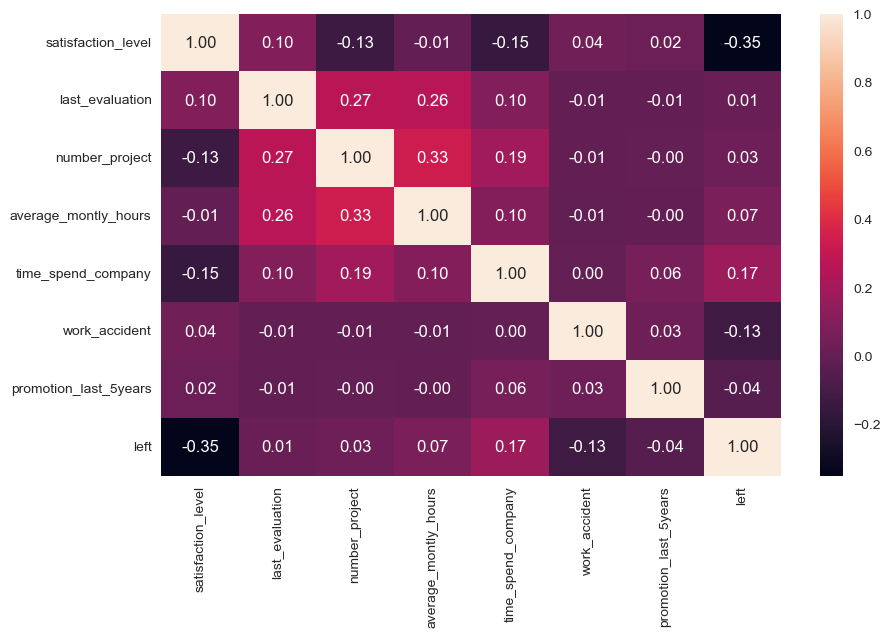

In [372]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

## 3. Data Pre-Processing

### Defining X and y

In [373]:
# data with duplicated

df_with_dp = df_copy.copy()
df_with_dp = clean_columns(df_with_dp)
df_with_dp.head()

df_with_dp.to_csv("df_with_dp.csv", index=False)


2 column names have been cleaned

In [374]:
df_with_dp.shape

(14999, 10)

In [375]:
# data without duplicates

df_without_dp = df.copy()
df_without_dp.to_csv("df_without_dp.csv", index=False)

df_without_dp.shape

(11991, 10)

In [45]:
# data with duplicates

X_dp = df_with_dp.drop(columns="left")
y_dp = df_with_dp.left

In [7]:
# data without duplicates

X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [46]:
X_dp.shape, y_dp.shape

((14999, 9), (14999,))

In [8]:
X.shape, y.shape

((11991, 9), (11991,))

#### Encoding and Scaling

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [47]:
# We will implement ordinal encoding to the categorical features and then scaling the data before KMeans Clustering

from sklearn.compose import make_column_transformer

# one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, ["salary", "departments"]), remainder= "passthrough")

column_trans.fit_transform(X_dp)

column_names=column_trans.get_feature_names_out()

X_dp_enc = pd.DataFrame(column_trans.fit_transform(X_dp), columns=column_names)
X_dp_enc

ordinalencoder__salary  ordinalencoder__departments  \
0                        1.00                         7.00   
1                        2.00                         7.00   
2                        2.00                         7.00   
3                        1.00                         7.00   
4                        1.00                         7.00   
...                       ...                          ...   
14994                    1.00                         8.00   
14995                    1.00                         8.00   
14996                    1.00                         8.00   
14997                    1.00                         8.00   
14998                    1.00                         8.00   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                               0.38                        0.53   
1                               0.80                        0.86   
2                               0.11                        0.88   
3                               0.72                        0.87   
4                               0.37                        0.52   
...                              ...                         ...   
14994                           0.40                        0.57   
14995                           0.37                        0.48   
14996                           0.37                        0.53   
14997                           0.11                        0.96   
14998                           0.37                        0.52   

       remainder__number_project  remainder__average_montly_hours  \
0                           2.00                           157.00   
1                           5.00                           262.00   
2                           7.00                           272.00   
3                           5.00                           223.00   
4                           2.00                           159.00   
...                          ...                              ...   
14994                       2.00                           151.00   
14995                       2.00                           160.00   
14996                       2.00                           143.00   
14997                       6.00                           280.00   
14998                       2.00                           158.00   

       remainder__time_spend_company  remainder__work_accident  \
0                               3.00                      0.00   
1                               6.00                      0.00   
2                               4.00                      0.00   
3                               5.00                      0.00   
4                               3.00                      0.00   
...                              ...                       ...   
14994                           3.00                      0.00   
14995                           3.00                      0.00   
14996                           3.00                      0.00   
14997                           4.00                      0.00   
14998                           3.00                      0.00   

       remainder__promotion_last_5years  
0                                  0.00  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                                 ...  
14994                              0.00  
14995                              0.00  
14996                              0.00  
14997                              0.00  
14998                              0.00  

[14999 rows x 9 columns]

In [12]:
# Effects of different scaler on hopkins score

from pyclustertend import hopkins

counter = 1
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    X_scaled = i.fit_transform(X_dp_enc)
    print(f"{scal_str[counter-1]}: {hopkins(X_scaled, X_scaled.shape[0])}")
    counter += 1

MinMaxScaling: 0.12720444921218377
StandardScaling: 0.11230344390347943
RobustScaling: 0.16104881758691864


In [48]:
# As we get the better result with StandartScaler, we will continue with it

scalar = StandardScaler()
X_dp_scaled = scalar.fit_transform(X_dp_enc)

In [385]:
one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, ["salary", "departments"]), remainder= "passthrough")

column_trans.fit_transform(X)

column_names=column_trans.get_feature_names_out()

X_enc = pd.DataFrame(column_trans.fit_transform(X), columns=column_names)
X_enc

ordinalencoder__salary  ordinalencoder__departments  \
0                        1.00                         7.00   
1                        2.00                         7.00   
2                        2.00                         7.00   
3                        1.00                         7.00   
4                        1.00                         7.00   
...                       ...                          ...   
11986                    0.00                         4.00   
11987                    0.00                         4.00   
11988                    0.00                         4.00   
11989                    0.00                         5.00   
11990                    1.00                         0.00   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                               0.38                        0.53   
1                               0.80                        0.86   
2                               0.11                        0.88   
3                               0.72                        0.87   
4                               0.37                        0.52   
...                              ...                         ...   
11986                           0.90                        0.55   
11987                           0.74                        0.95   
11988                           0.85                        0.54   
11989                           0.33                        0.65   
11990                           0.50                        0.73   

       remainder__number_project  remainder__average_montly_hours  \
0                           2.00                           157.00   
1                           5.00                           262.00   
2                           7.00                           272.00   
3                           5.00                           223.00   
4                           2.00                           159.00   
...                          ...                              ...   
11986                       3.00                           259.00   
11987                       5.00                           266.00   
11988                       3.00                           185.00   
11989                       3.00                           172.00   
11990                       4.00                           180.00   

       remainder__time_spend_company  remainder__work_accident  \
0                               3.00                      0.00   
1                               6.00                      0.00   
2                               4.00                      0.00   
3                               5.00                      0.00   
4                               3.00                      0.00   
...                              ...                       ...   
11986                          10.00                      1.00   
11987                          10.00                      0.00   
11988                          10.00                      0.00   
11989                          10.00                      0.00   
11990                           3.00                      0.00   

       remainder__promotion_last_5years  
0                                  0.00  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                                 ...  
11986                              1.00  
11987                              1.00  
11988                              1.00  
11989                              1.00  
11990                              0.00  

[11991 rows x 9 columns]

In [386]:
# Effects of different scaler on hopkins score

counter = 1
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    X_scaled = i.fit_transform(X_enc)
    print(f"{scal_str[counter-1]}: {hopkins(X_scaled, X_scaled.shape[0])}")
    counter += 1

MinMaxScaling: 0.18607527238196914
StandardScaling: 0.15970483742817154
RobustScaling: 0.2373432194027743


In [387]:
# As we get better hopkins score with data contains duplicates we implement KMeans clustering with it

# X_scaled = scalar.fit_transform(X_enc)

In [53]:
X_dp_scaled_df = pd.DataFrame(X_dp_scaled, columns=X_dp_enc.columns)
X_dp_scaled_df["left"] = y_dp
X_dp_scaled_df

ordinalencoder__salary  ordinalencoder__departments  \
0                       -0.55                         0.39   
1                        1.04                         0.39   
2                        1.04                         0.39   
3                       -0.55                         0.39   
4                       -0.55                         0.39   
...                       ...                          ...   
14994                   -0.55                         0.74   
14995                   -0.55                         0.74   
14996                   -0.55                         0.74   
14997                   -0.55                         0.74   
14998                   -0.55                         0.74   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                              -0.94                       -1.09   
1                               0.75                        0.84   
2                              -2.02                        0.96   
3                               0.43                        0.90   
4                              -0.98                       -1.15   
...                              ...                         ...   
14994                          -0.86                       -0.85   
14995                          -0.98                       -1.38   
14996                          -0.98                       -1.09   
14997                          -2.02                        1.42   
14998                          -0.98                       -1.15   

       remainder__number_project  remainder__average_montly_hours  \
0                          -1.46                            -0.88   
1                           0.97                             1.22   
2                           2.59                             1.42   
3                           0.97                             0.44   
4                          -1.46                            -0.84   
...                          ...                              ...   
14994                      -1.46                            -1.00   
14995                      -1.46                            -0.82   
14996                      -1.46                            -1.16   
14997                       1.78                             1.58   
14998                      -1.46                            -0.86   

       remainder__time_spend_company  remainder__work_accident  \
0                              -0.34                     -0.41   
1                               1.71                     -0.41   
2                               0.34                     -0.41   
3                               1.03                     -0.41   
4                              -0.34                     -0.41   
...                              ...                       ...   
14994                          -0.34                     -0.41   
14995                          -0.34                     -0.41   
14996                          -0.34                     -0.41   
14997                           0.34                     -0.41   
14998                          -0.34                     -0.41   

       remainder__promotion_last_5years  left  
0                                 -0.15     1  
1                                 -0.15     1  
2                                 -0.15     1  
3                                 -0.15     1  
4                                 -0.15     1  
...                                 ...   ...  
14994                             -0.15     1  
14995                             -0.15     1  
14996                             -0.15     1  
14997                             -0.15     1  
14998                             -0.15     1  

[14999 rows x 10 columns]

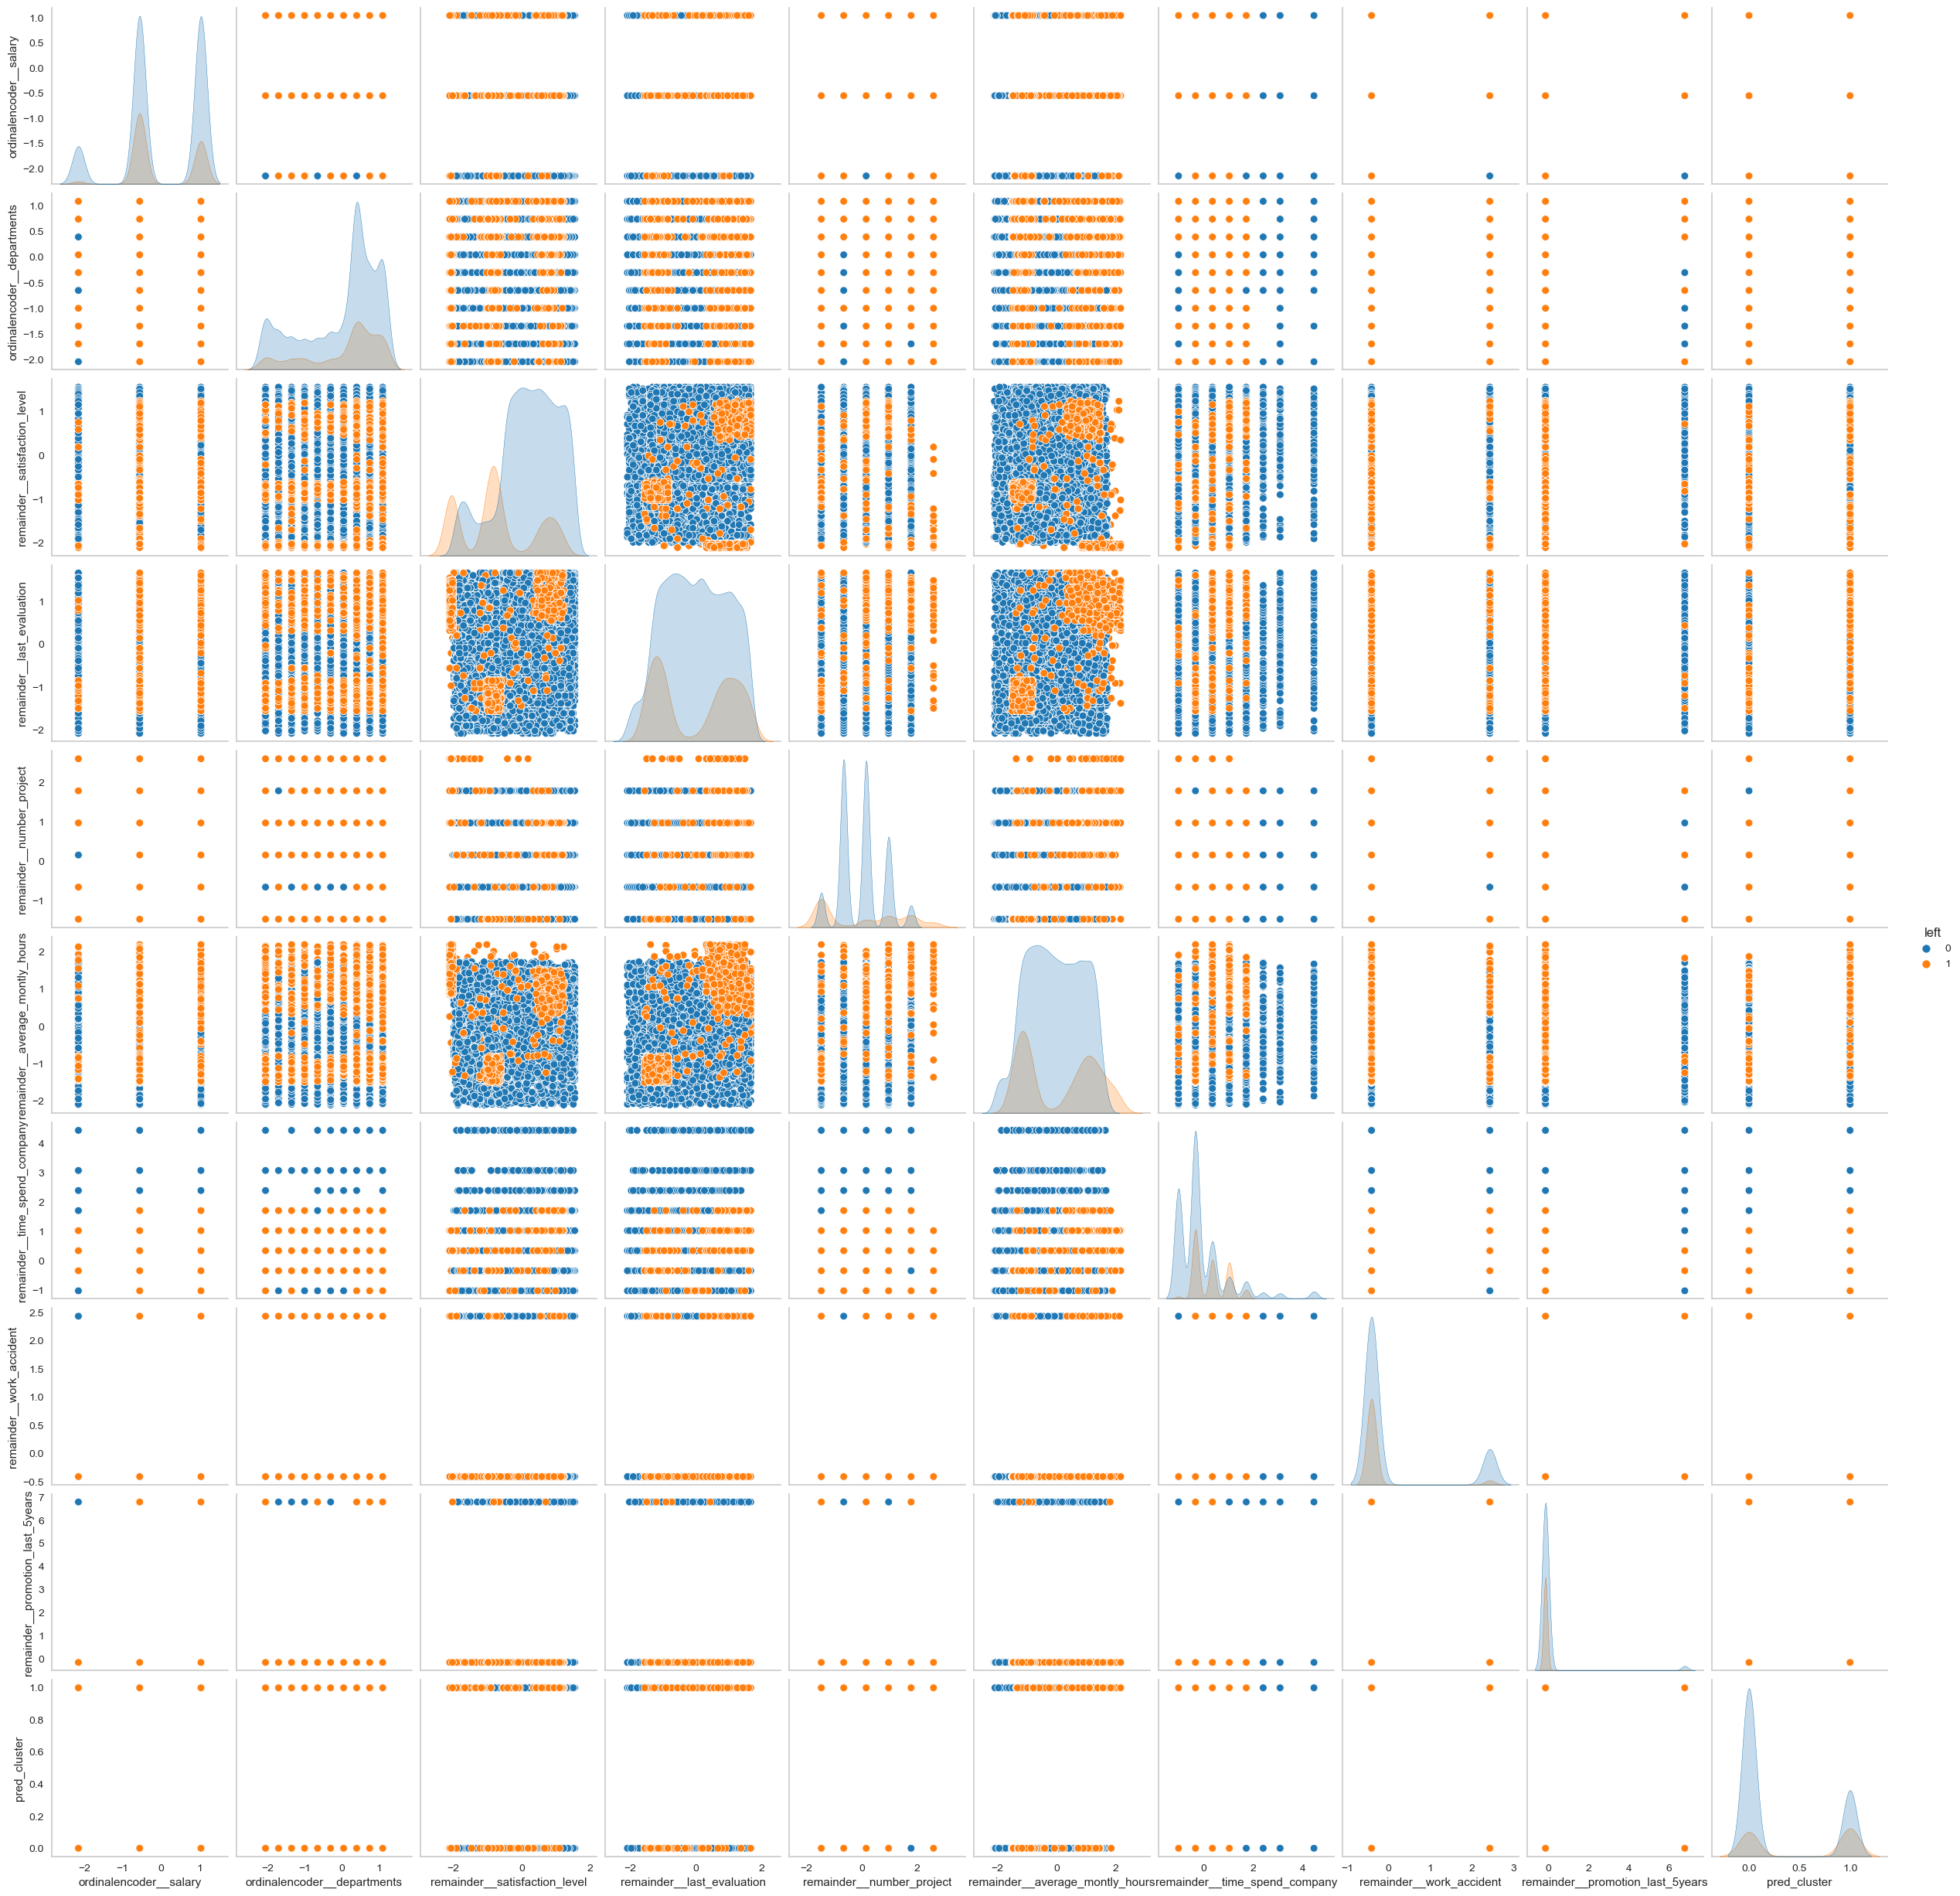

In [62]:
sns.pairplot(X_dp_scaled_df, hue="left", palette="tab10")
plt.show();

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [17]:
hopkins(X_dp_scaled, X_dp_scaled.shape[0])

0.11207084484813529

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [18]:
ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=101)
    model.fit(X_dp_scaled)
    ssd.append(model.inertia_)

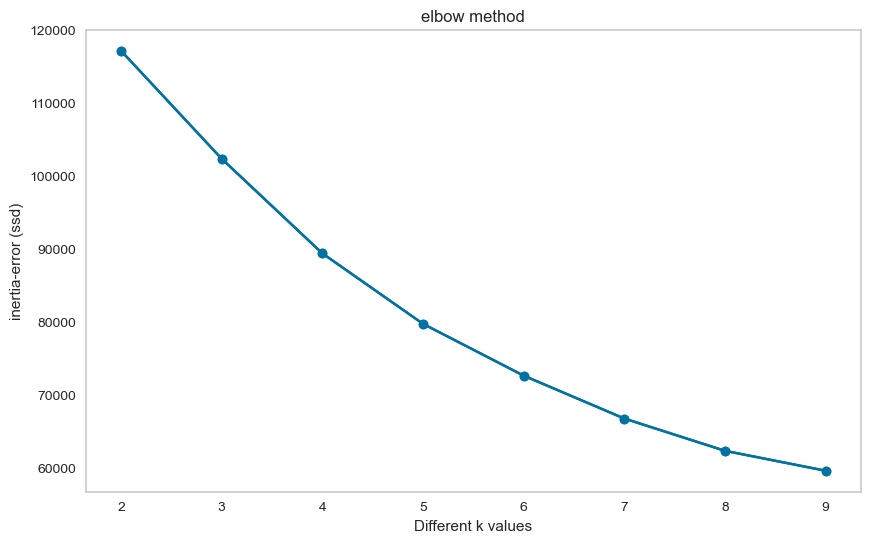

In [20]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show();

In [21]:
ssd

[117154.30447241469,
 102351.28960320223,
 89385.69641926493,
 79726.0393780248,
 72626.12463726618,
 66744.6260198887,
 62321.71426815568,
 59590.46738620519]

In [22]:
pd.Series(ssd).diff()

0         NaN
1   -14803.01
2   -12965.59
3    -9659.66
4    -7099.91
5    -5881.50
6    -4422.91
7    -2731.25
dtype: float64

In [23]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1      NaN
2 14803.01
3 12965.59
4  9659.66
5  7099.91
6  5881.50
7  4422.91
8  2731.25

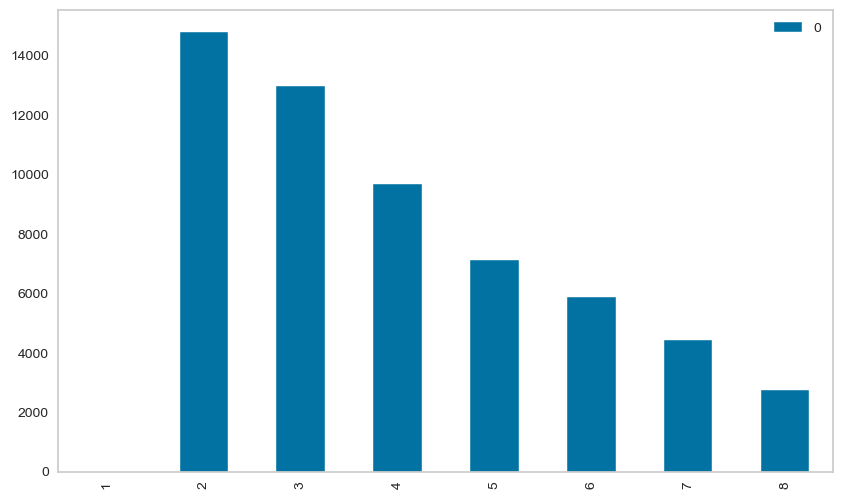

In [26]:
df_diff.plot(kind='bar')
plt.show()

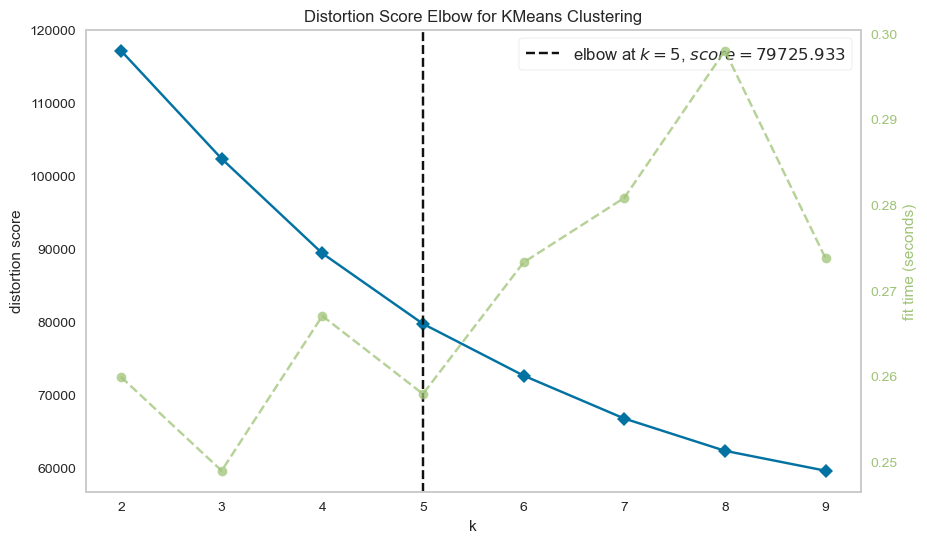

In [27]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X_dp_scaled)        # Fit the data to the visualizer
visualizer.show();

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_dp_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_dp_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.15874717609542882
For n_clusters=3, the silhouette score is 0.1761562410185968
For n_clusters=4, the silhouette score is 0.18792923150101112
For n_clusters=5, the silhouette score is 0.19263778772251525
For n_clusters=6, the silhouette score is 0.19779505128826702
For n_clusters=7, the silhouette score is 0.20428951733074827
For n_clusters=8, the silhouette score is 0.19735886320698362


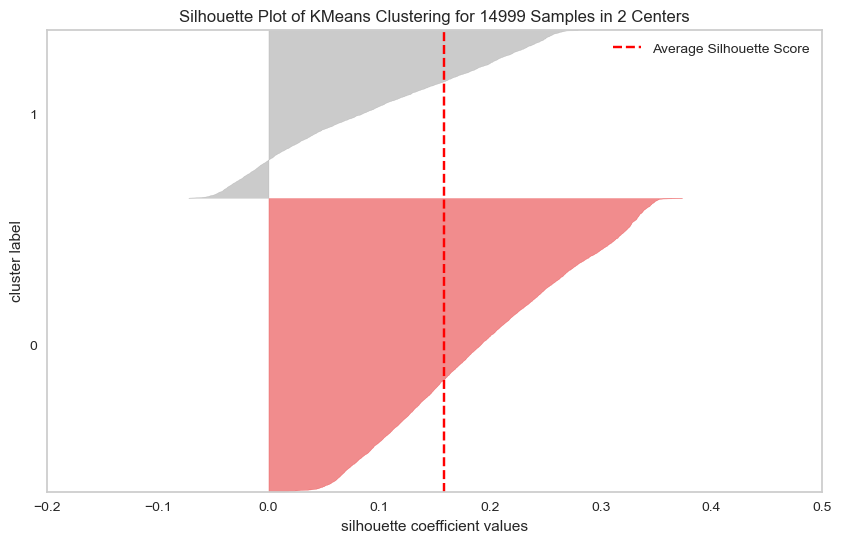

In [30]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_dp_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [40]:
# Model fitting
model = KMeans(n_clusters = 2, random_state=101)
y_pred = model.fit_predict(X_dp_scaled)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [41]:
predicted_label=model.labels_
predicted_label

array([0, 1, 1, ..., 0, 1, 0])

In [55]:
X_dp_scaled_df["pred_cluster"] = predicted_label
X_dp_scaled_df.head()

ordinalencoder__salary  ordinalencoder__departments  \
0                   -0.55                         0.39   
1                    1.04                         0.39   
2                    1.04                         0.39   
3                   -0.55                         0.39   
4                   -0.55                         0.39   

   remainder__satisfaction_level  remainder__last_evaluation  \
0                          -0.94                       -1.09   
1                           0.75                        0.84   
2                          -2.02                        0.96   
3                           0.43                        0.90   
4                          -0.98                       -1.15   

   remainder__number_project  remainder__average_montly_hours  \
0                      -1.46                            -0.88   
1                       0.97                             1.22   
2                       2.59                             1.42   
3                       0.97                             0.44   
4                      -1.46                            -0.84   

   remainder__time_spend_company  remainder__work_accident  \
0                          -0.34                     -0.41   
1                           1.71                     -0.41   
2                           0.34                     -0.41   
3                           1.03                     -0.41   
4                          -0.34                     -0.41   

   remainder__promotion_last_5years  left  pred_cluster  
0                             -0.15     1             0  
1                             -0.15     1             1  
2                             -0.15     1             1  
3                             -0.15     1             1  
4                             -0.15     1             0

In [57]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(X_dp_scaled_df.left, y_pred)

0.09620716431241791

In [58]:
ct = pd.crosstab(y_pred, X_dp_scaled_df.left)
ct

left      0     1
row_0            
0      8197  1662
1      3231  1909

In [60]:
clus_pred =X_dp_scaled_df.groupby("left").mean().T
clus_pred

left                                 0     1
ordinalencoder__salary            0.00 -0.00
ordinalencoder__departments      -0.02  0.06
remainder__satisfaction_level     0.22 -0.69
remainder__last_evaluation       -0.00  0.01
remainder__number_project        -0.01  0.04
remainder__average_montly_hours  -0.04  0.13
remainder__time_spend_company    -0.08  0.26
remainder__work_accident          0.09 -0.28
remainder__promotion_last_5years  0.03 -0.11
pred_cluster                      0.28  0.53

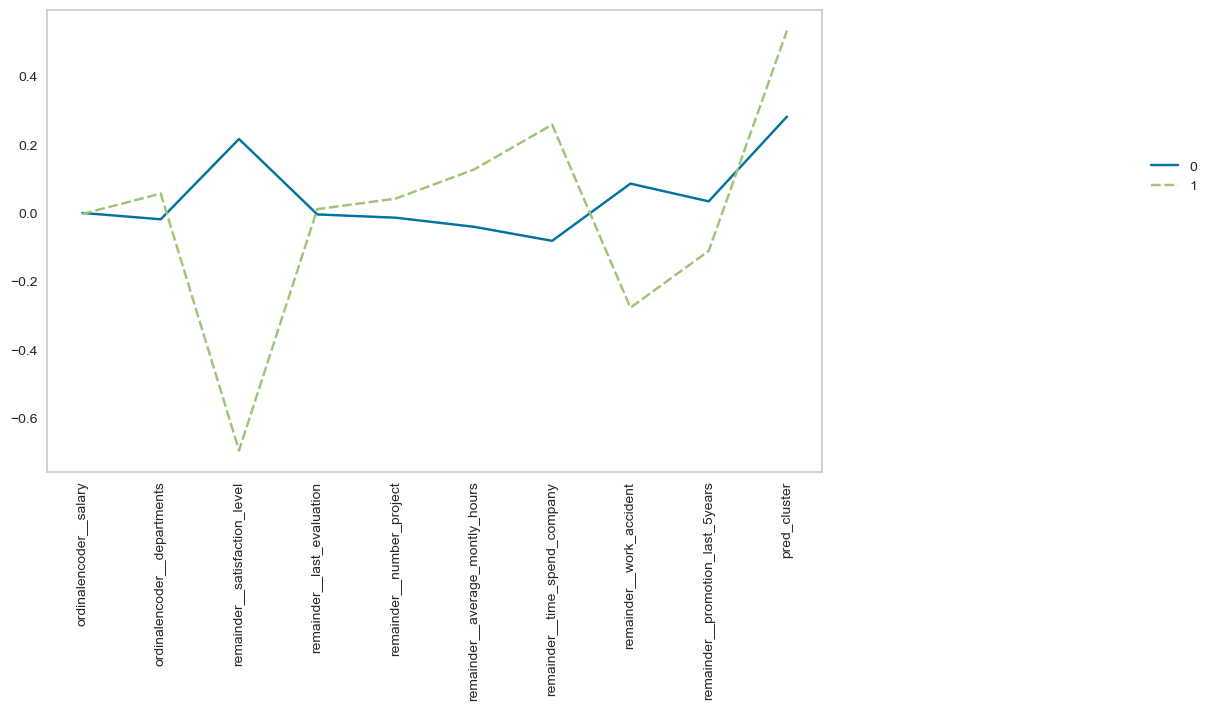

In [63]:
sns.lineplot(data = clus_pred)
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.xticks(rotation=90)
plt.show()

#### Clustering based on the satisfaction_level, time_spend_company and average_monthly_hours

In [66]:
X_dp.shape, y_dp.shape

((14999, 9), (14999,))

In [68]:
X_dp.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [69]:
X2 = X_dp[["satisfaction_level","time_spend_company","average_montly_hours"]]

In [73]:
X2.head()

satisfaction_level  time_spend_company  average_montly_hours
0                0.38                   3                   157
1                0.80                   6                   262
2                0.11                   4                   272
3                0.72                   5                   223
4                0.37                   3                   159

In [74]:
x2_scaled = scalar.fit_transform(X2)

In [75]:
# hopkins test

hopkins(x2_scaled, x2_scaled.shape[0])

0.061755918774402556

In [77]:
# Elbow method

ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=101)
    model.fit(x2_scaled)
    ssd.append(model.inertia_)

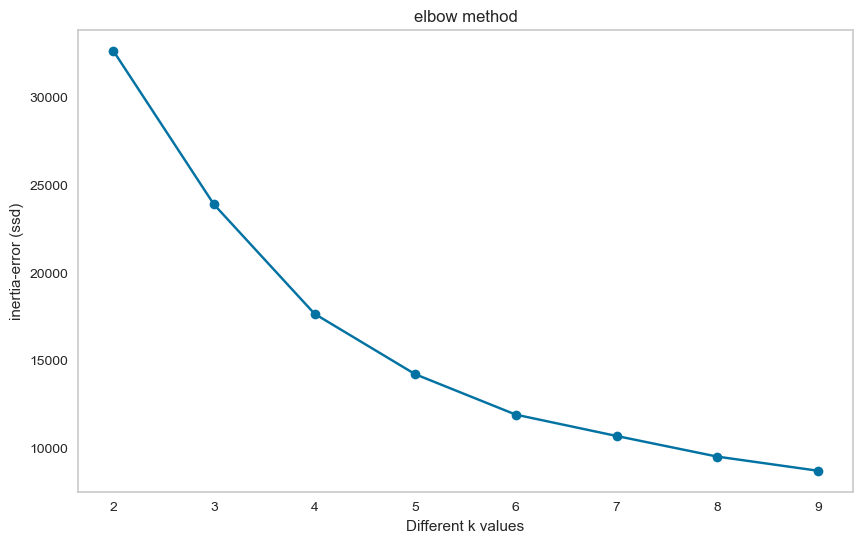

In [78]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show();

In [79]:
ssd

[32618.068483676037,
 23874.488103394386,
 17648.032813103728,
 14209.519442107005,
 11908.92544719752,
 10696.172210918941,
 9522.48364111497,
 8718.335983858044]

In [80]:
pd.Series(ssd).diff()

0        NaN
1   -8743.58
2   -6226.46
3   -3438.51
4   -2300.59
5   -1212.75
6   -1173.69
7    -804.15
dtype: float64

In [81]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1     NaN
2 8743.58
3 6226.46
4 3438.51
5 2300.59
6 1212.75
7 1173.69
8  804.15

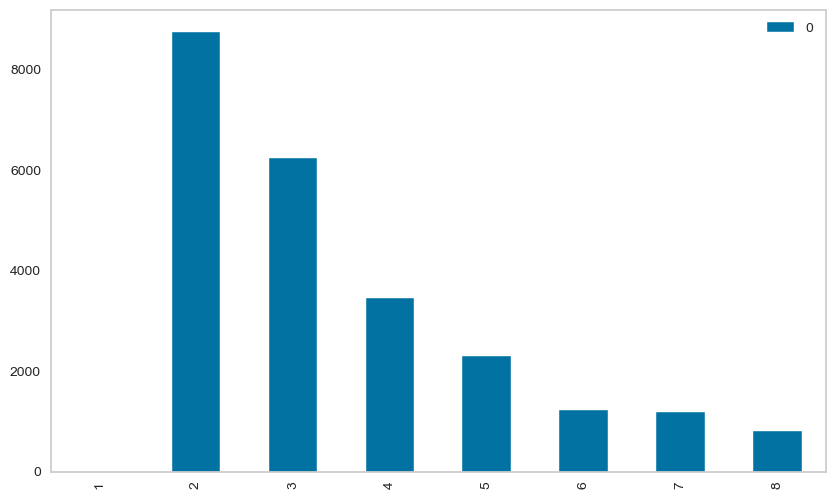

In [82]:
df_diff.plot(kind='bar')
plt.show()

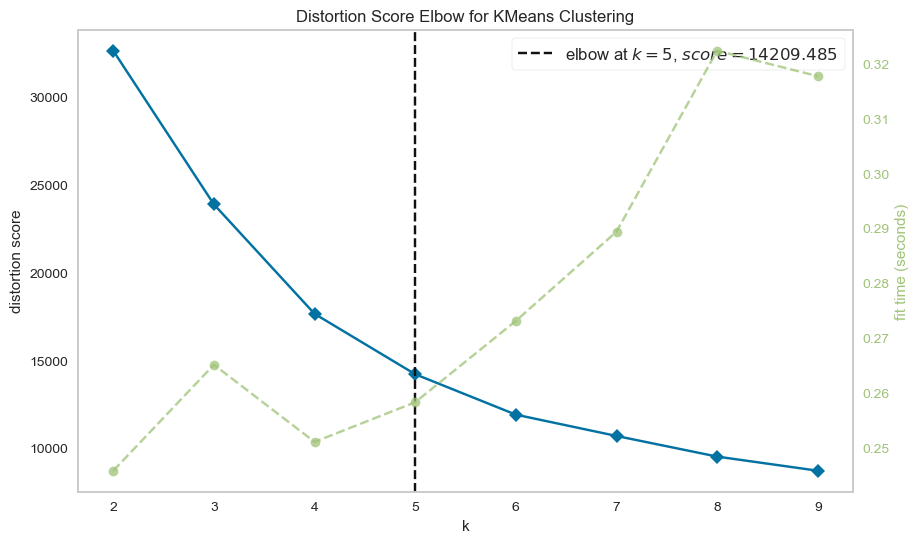

In [83]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(x2_scaled)        # Fit the data to the visualizer
visualizer.show();

In [84]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3444251901644129
For n_clusters=3, the silhouette score is 0.3330402824534808
For n_clusters=4, the silhouette score is 0.36098828594153515
For n_clusters=5, the silhouette score is 0.35700857452317597
For n_clusters=6, the silhouette score is 0.36840267506212493
For n_clusters=7, the silhouette score is 0.3742043865663975
For n_clusters=8, the silhouette score is 0.36184626424729244


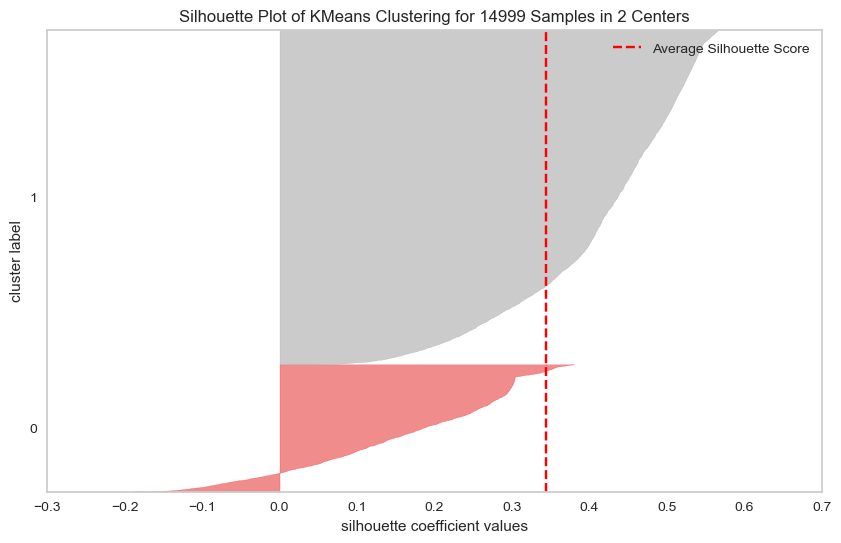

In [85]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(x2_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [86]:
# Model fitting
model = KMeans(n_clusters = 2, random_state=101)
y_pred = model.fit_predict(x2_scaled)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [87]:
predicted_label=model.labels_
predicted_label

array([1, 0, 0, ..., 1, 0, 1])

In [89]:
x2_scaled_df = pd.DataFrame(x2_scaled, columns=X2.columns)
x2_scaled_df["left"] = y_dp
x2_scaled_df.head()

satisfaction_level  time_spend_company  average_montly_hours  left
0               -0.94               -0.34                 -0.88     1
1                0.75                1.71                  1.22     1
2               -2.02                0.34                  1.42     1
3                0.43                1.03                  0.44     1
4               -0.98               -0.34                 -0.84     1

In [90]:
x2_scaled_df["pred_cluster"] = predicted_label
x2_scaled_df.head()

satisfaction_level  time_spend_company  average_montly_hours  left  \
0               -0.94               -0.34                 -0.88     1   
1                0.75                1.71                  1.22     1   
2               -2.02                0.34                  1.42     1   
3                0.43                1.03                  0.44     1   
4               -0.98               -0.34                 -0.84     1   

   pred_cluster  
0             1  
1             0  
2             0  
3             0  
4             1

In [91]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(x2_scaled_df.left, y_pred)

0.18232887520386012

In [92]:
ct = pd.crosstab(y_pred, x2_scaled_df.left)
ct

left      0     1
row_0            
0      2248  1895
1      9180  1676

left	0	1
row_0		
0	8197	1662
1	3231	1909

## 5. Model Building

In [93]:
df_with_dp = pd.read_csv("df_with_dp.csv")
df_without_dp = pd.read_csv("df_without_dp.csv")

### Implement Lazypredict with duplicates

In [409]:
X = df_with_dp.drop(columns="left")
y= df_with_dp.left

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [413]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [414]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.61it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.99               0.98     0.98      0.99   
ExtraTreesClassifier               0.99               0.98     0.98      0.99   
BaggingClassifier                  0.99               0.98     0.98      0.99   
LGBMClassifier                     0.99               0.98     0.98      0.99   
DecisionTreeClassifier             0.98               0.97     0.97      0.98   
LabelPropagation                   0.97               0.97     0.97      0.97   
LabelSpreading                     0.97               0.97     0.97      0.97   
XGBClassifier                      0.98               0.96     0.96      0.98   
ExtraTreeClassifier                0.97               0.96     0.96      0.97   
SVC                                0.96               0.95     0.95      0.96   
AdaBoostClassifier                 0.96               0.95     0.95      0.96   
KNeighborsClassifier               0.94               0.94     0.94      0.95   
QuadraticDiscriminantAnalysis      0.85               0.84     0.84      0.86   
NearestCentroid                    0.75               0.74     0.74      0.76   
GaussianNB                         0.66               0.72     0.72      0.69   
LogisticRegression                 0.79               0.64     0.64      0.77   
LinearDiscriminantAnalysis         0.78               0.62     0.62      0.76   
CalibratedClassifierCV             0.78               0.61     0.61      0.75   
LinearSVC                          0.78               0.60     0.60      0.74   
RidgeClassifier                    0.78               0.60     0.60      0.74   
RidgeClassifierCV                  0.78               0.60     0.60      0.74   
SGDClassifier                      0.79               0.57     0.57      0.73   
BernoulliNB                        0.75               0.56     0.56      0.71   
Perceptron                         0.76               0.52     0.52      0.69   
PassiveAggressiveClassifier        0.76               0.52     0.52      0.68   
DummyClassifier                    0.76               0.50     0.50      0.66   

                               Time Taken  
Model                                      
RandomForestClassifier               0.56  
ExtraTreesClassifier                 0.73  
BaggingClassifier                    0.22  
LGBMClassifier                       0.18  
DecisionTreeClassifier               0.05  
LabelPropagation                     3.89  
LabelSpreading                       6.60  
XGBClassifier                        1.43  
ExtraTreeClassifier                  0.03  
SVC                                  1.38  
AdaBoostClassifier                   0.32  
KNeighborsClassifier                 0.18  
QuadraticDiscriminantAnalysis        0.03  
NearestCentroid                      0.02  
GaussianNB                           0.03  
LogisticRegression                   0.07  
LinearDiscriminantAnalysis           0.05  
CalibratedClassifierCV               1.40  
LinearSVC                            0.54  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.03  
SGDClassifier                        0.07  
BernoulliNB                          0.03  
Perceptron                           0.05  
PassiveAggressiveClassifier          0.02  
DummyClassifier                      0.02

### Implement Lazypredict without duplicates

In [415]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [417]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:11<00:00,  2.54it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.97     0.97      0.99   
BaggingClassifier                  0.98               0.96     0.96      0.98   
RandomForestClassifier             0.99               0.96     0.96      0.99   
XGBClassifier                      0.98               0.96     0.96      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.96   
SVC                                0.97               0.95     0.95      0.97   
ExtraTreesClassifier               0.98               0.95     0.95      0.98   
KNeighborsClassifier               0.95               0.94     0.94      0.95   
LabelSpreading                     0.95               0.93     0.93      0.95   
LabelPropagation                   0.95               0.93     0.93      0.95   
AdaBoostClassifier                 0.96               0.93     0.93      0.96   
ExtraTreeClassifier                0.93               0.90     0.90      0.94   
QuadraticDiscriminantAnalysis      0.84               0.84     0.84      0.86   
GaussianNB                         0.73               0.75     0.75      0.76   
NearestCentroid                    0.76               0.71     0.71      0.79   
LinearDiscriminantAnalysis         0.83               0.60     0.60      0.81   
PassiveAggressiveClassifier        0.75               0.60     0.60      0.76   
CalibratedClassifierCV             0.84               0.60     0.60      0.81   
LogisticRegression                 0.84               0.59     0.59      0.81   
LinearSVC                          0.84               0.57     0.57      0.80   
RidgeClassifier                    0.85               0.56     0.56      0.80   
RidgeClassifierCV                  0.85               0.56     0.56      0.80   
Perceptron                         0.58               0.56     0.56      0.63   
BernoulliNB                        0.83               0.56     0.56      0.79   
DummyClassifier                    0.83               0.50     0.50      0.76   
SGDClassifier                      0.83               0.50     0.50      0.76   

                               Time Taken  
Model                                      
LGBMClassifier                       0.11  
BaggingClassifier                    0.18  
RandomForestClassifier               0.47  
XGBClassifier                        0.93  
DecisionTreeClassifier               0.04  
SVC                                  0.74  
ExtraTreesClassifier                 0.46  
KNeighborsClassifier                 0.13  
LabelSpreading                       3.96  
LabelPropagation                     2.25  
AdaBoostClassifier                   0.30  
ExtraTreeClassifier                  0.02  
QuadraticDiscriminantAnalysis        0.03  
GaussianNB                           0.03  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.04  
PassiveAggressiveClassifier          0.03  
CalibratedClassifierCV               1.00  
LogisticRegression                   0.06  
LinearSVC                            0.40  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.03  
Perceptron                           0.03  
BernoulliNB                          0.03  
DummyClassifier                      0.02  
SGDClassifier                        0.05

### Build Pipeline to Implement ML Models

In [418]:
# Defining column_trans object that contains onehot encoder and ordinal encoder

onehot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((onehot_enc, ["departments"]), (ordinal_enc, ["salary"]), remainder= "passthrough")

# Defining scaler object
scaler = StandardScaler()

In [118]:
# define a function to compare evaluation metrics of ML models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show();

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show();

### Distance Based(?) Algorithm

### SVC Model- without duplicates

In [420]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [422]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

In [423]:
# fit the logistic regression model on train data

SVC_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.75      0.93      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7999
           1       0.79      0.93      0.85      1593

    accuracy                           0.95      9592
   macro avg       0.89      0.94      0.91      9592
weighted avg       0.95      0.95      0.95      9592



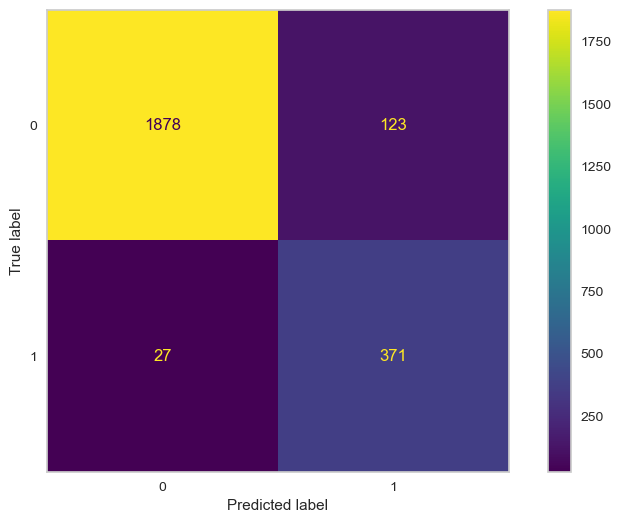

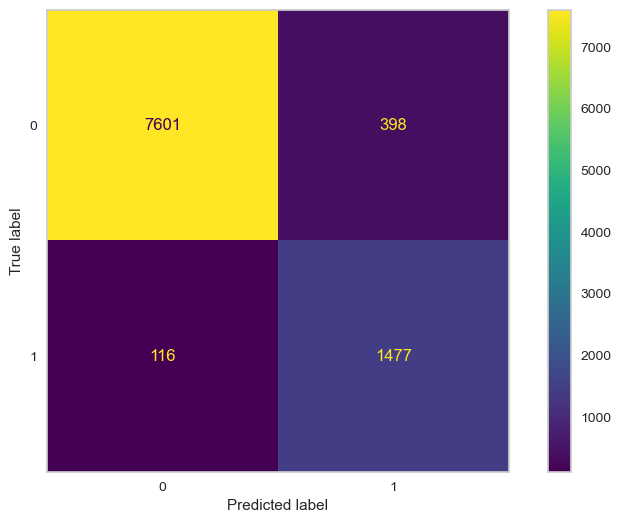

In [424]:
# check the evaluation metrics of logistic model

eval_metric(SVC_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### SVC Model Cross Validation

In [425]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.87        0.16            0.76             0.79         0.91   
2       0.83        0.15            0.78             0.79         0.89   
3       1.25        0.15            0.77             0.79         0.90   
4       0.82        0.14            0.79             0.78         0.93   
5       0.80        0.14            0.76             0.79         0.94   
6       0.85        0.14            0.77             0.79         0.92   
7       0.80        0.14            0.76             0.78         0.94   
8       0.81        0.15            0.81             0.78         0.92   
9       0.80        0.14            0.76             0.79         0.92   
10      0.79        0.14            0.74             0.79         0.90   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.93     0.83      0.85           0.94            0.95  
2           0.93     0.83      0.85           0.94            0.95  
3           0.93     0.83      0.85           0.94            0.95  
4           0.93     0.86      0.85           0.95            0.95  
5           0.93     0.84      0.85           0.94            0.95  
6           0.93     0.84      0.85           0.94            0.95  
7           0.93     0.84      0.85           0.94            0.95  
8           0.93     0.86      0.85           0.95            0.95  
9           0.93     0.83      0.85           0.94            0.95  
10          0.93     0.81      0.85           0.93            0.95

In [426]:
df_scores.mean()[2:]

test_precision    0.77
train_precision   0.79
test_recall       0.92
train_recall      0.93
test_f1           0.84
train_f1          0.85
test_accuracy     0.94
train_accuracy    0.95
dtype: float64

#### SVC Model GridsearchCV

In [427]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.01, 0.1, 1, 5],
              'SVC__gamma': ["scale", "auto", 1, 0.1, 0.01]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [428]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1, 5],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='recall')

In [429]:
SVC_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.1, class_weight='balanced', gamma=0.01, max_iter=10000,
                     random_state=101))])

In [430]:
SVC_grid_model.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.01}

In [431]:
SVC_grid_model.best_score_

0.9422566589775438

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2001
           1       0.51      0.94      0.66       398

    accuracy                           0.84      2399
   macro avg       0.75      0.88      0.78      2399
weighted avg       0.91      0.84      0.86      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7999
           1       0.48      0.94      0.64      1593

    accuracy                           0.82      9592
   macro avg       0.73      0.87      0.76      9592
weighted avg       0.90      0.82      0.84      9592



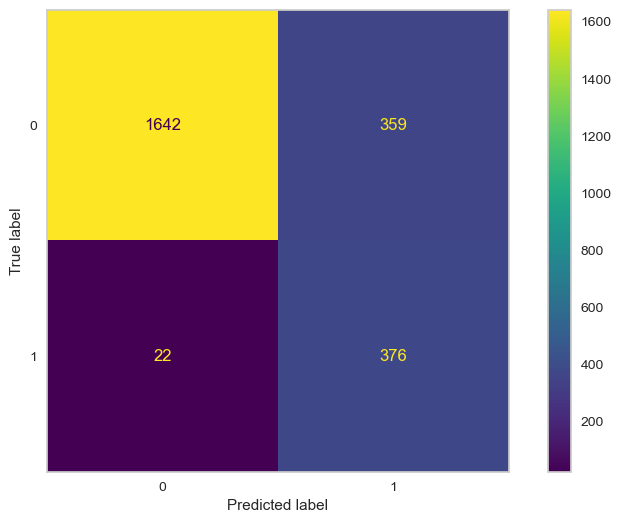

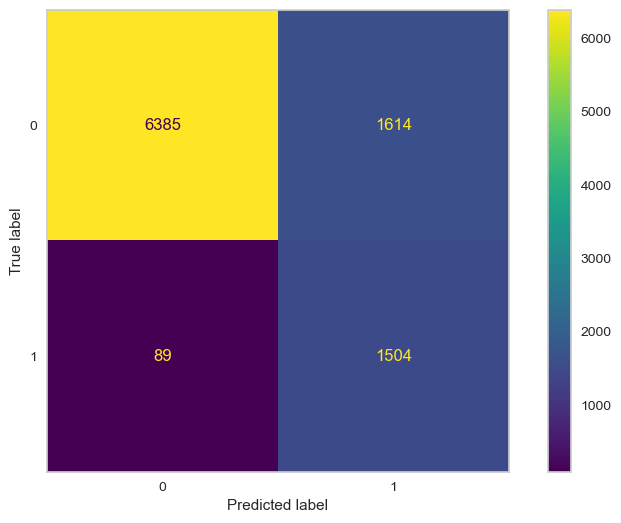

In [432]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

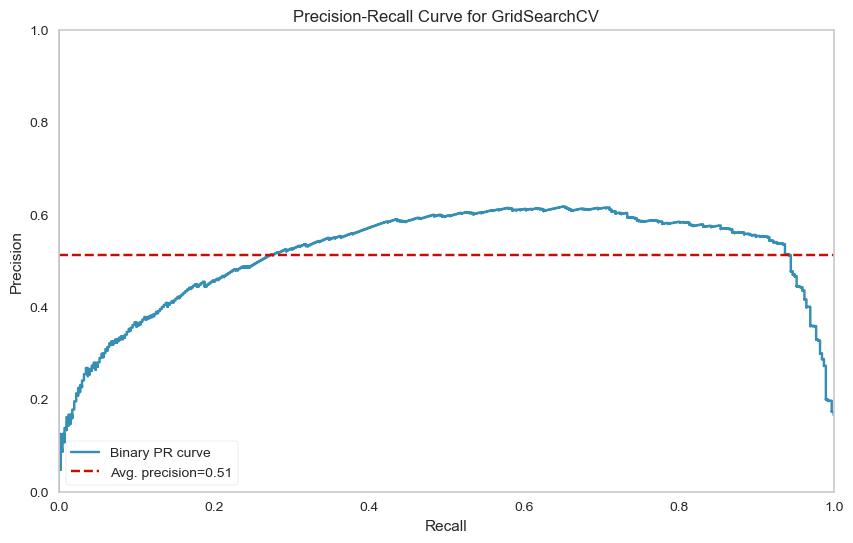

In [433]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=SVC_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

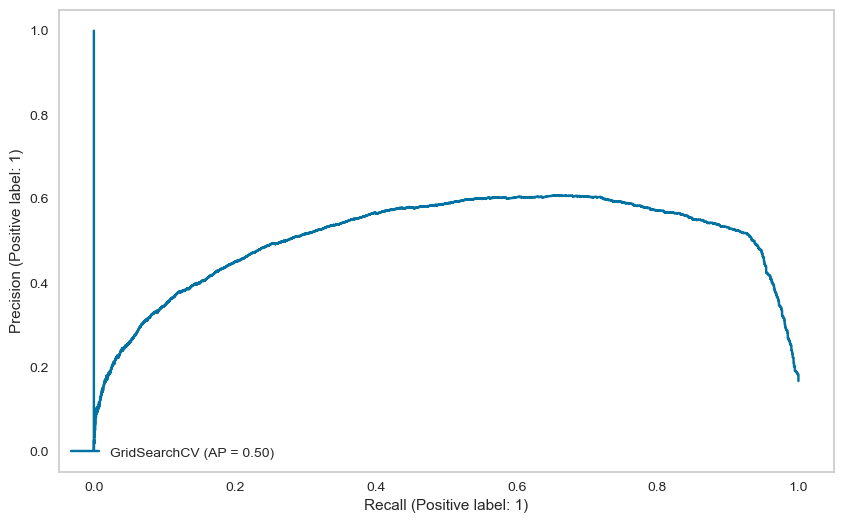

In [434]:
plot_precision_recall_curve(SVC_grid_model, X_train, y_train);

#### Prediction

In [435]:
# predict on train and test data

y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

In [436]:
# define model comparison variables

SVC_AP = viz.score_ # AP: average precision

SVC_f1_test = f1_score(y_test, y_pred_test)
SVC_f1_train = f1_score(y_train, y_pred_train)

SVC_recall_test = recall_score(y_test, y_pred_test)
SVC_recall_train = recall_score(y_train, y_pred_train)

SVC_AP, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.5129689368712189,
 0.6637246248896734,
 0.6385056251326683,
 0.9447236180904522,
 0.9441305712492153)

In [437]:
# !pip install scikit-plot -q
# import scikitplot as skplt

In [438]:
# from sklearn.calibration import CalibratedClassifierCV

# calibrated_svc = CalibratedClassifierCV(
#     # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=random_state),
#     base_estimator=SVC_grid_model, 
#     method='sigmoid',
#     cv=5, 
# )
# calibrated_svc.fit(X_train, y_train)

# y_probas = calibrated_svc.predict_proba(X_test)
# skplt.metrics.plot_precision_recall(y_test, y_probas)
# plt.show()

### SVC Model - with duplicates

In [205]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [207]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

In [208]:
# fit the logistic regression model on train data

SVC_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.84      0.94      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000



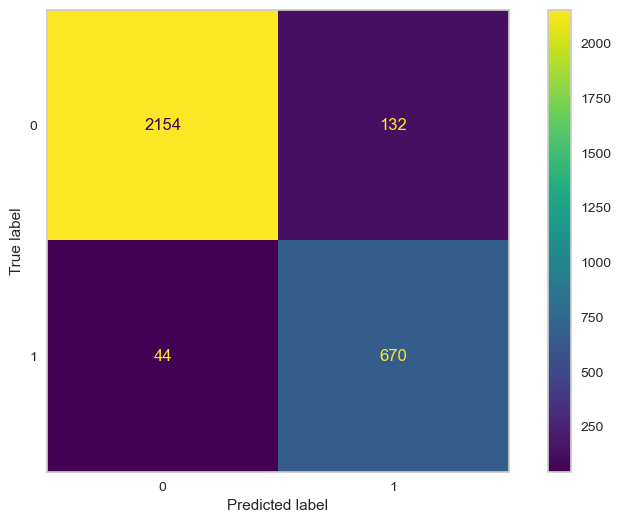




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9142
           1       0.86      0.93      0.89      2857

    accuracy                           0.95     11999
   macro avg       0.92      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



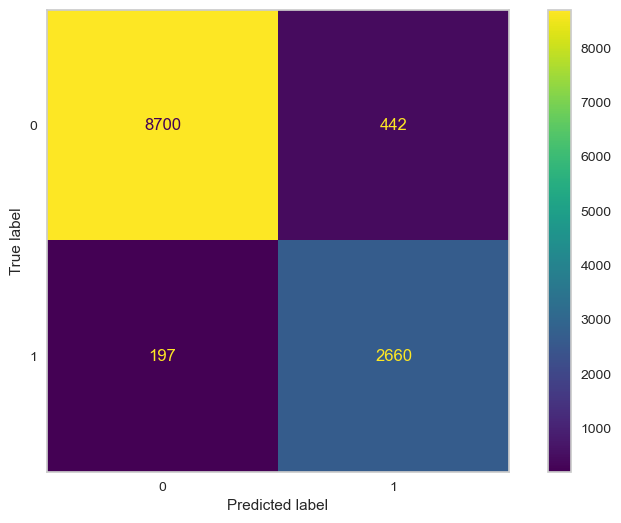

In [209]:
# check the evaluation metrics of logistic model

eval_metric(SVC_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### SVC Model Cross Validation

In [210]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       1.41        0.23            0.88             0.85         0.94   
2       1.34        0.23            0.83             0.86         0.91   
3       1.38        0.25            0.85             0.86         0.93   
4       1.39        0.22            0.83             0.86         0.94   
5       1.31        0.22            0.84             0.86         0.89   
6       1.44        0.25            0.86             0.85         0.92   
7       1.34        0.26            0.84             0.86         0.93   
8       1.34        0.24            0.85             0.86         0.92   
9       1.41        0.25            0.85             0.85         0.93   
10      1.33        0.24            0.84             0.86         0.92   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.93     0.91      0.89           0.95            0.94  
2           0.93     0.87      0.89           0.94            0.95  
3           0.93     0.89      0.89           0.94            0.95  
4           0.93     0.88      0.89           0.94            0.95  
5           0.93     0.87      0.89           0.94            0.95  
6           0.93     0.89      0.89           0.94            0.95  
7           0.93     0.88      0.89           0.94            0.95  
8           0.93     0.89      0.89           0.94            0.95  
9           0.93     0.88      0.89           0.94            0.95  
10          0.93     0.87      0.89           0.94            0.95

In [211]:
df_scores.mean()[2:]

test_precision    0.85
train_precision   0.86
test_recall       0.92
train_recall      0.93
test_f1           0.88
train_f1          0.89
test_accuracy     0.94
train_accuracy    0.95
dtype: float64

#### SVC Model GridsearchCV

In [212]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.01, 0.1, 1],
              'SVC__gamma': ["scale", "auto", 1, 0.1, 0.01]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [213]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='recall')

In [214]:
SVC_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC',
                 SVC(C=1, class_weight='balanced', gamma=1, max_iter=10000,
                     random_state=101))])

In [215]:
SVC_grid_model.best_params_

{'SVC__C': 1, 'SVC__gamma': 1}

In [216]:
SVC_grid_model.best_score_

0.9464532840189583

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.95      0.95      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



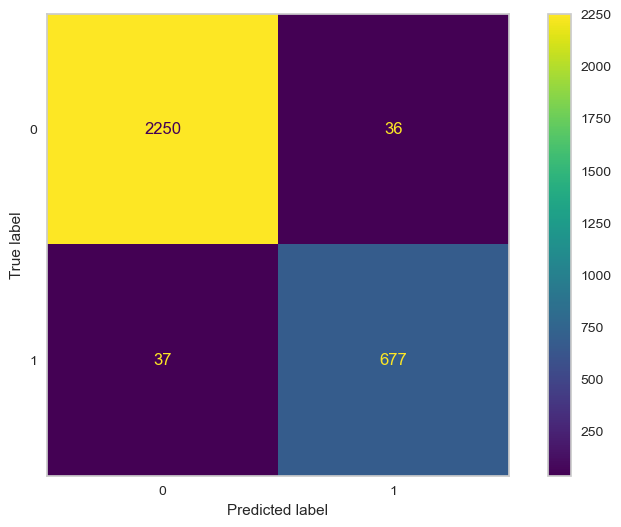




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9142
           1       0.98      0.99      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.99      0.99     11999
weighted avg       0.99      0.99      0.99     11999



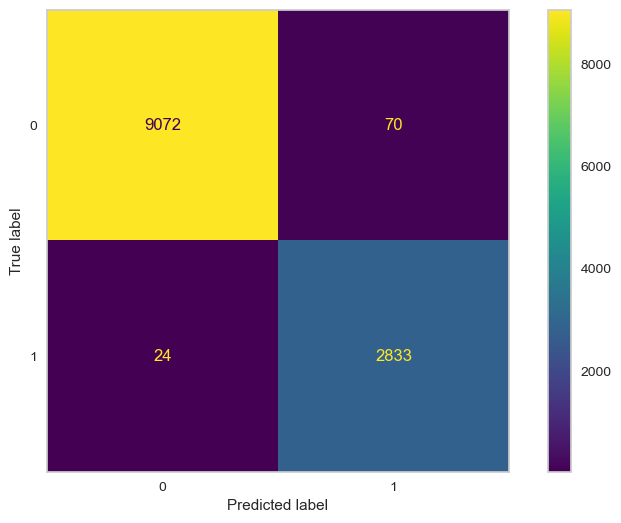

In [217]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

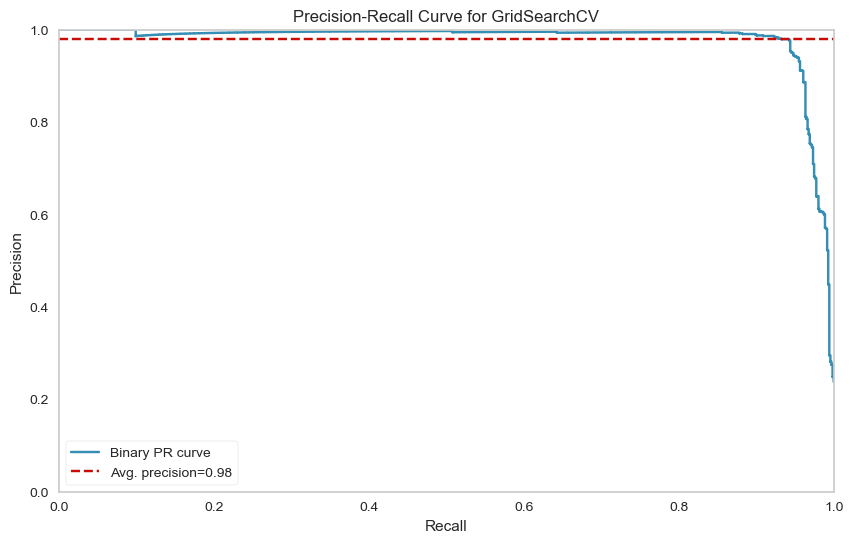

In [218]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=SVC_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

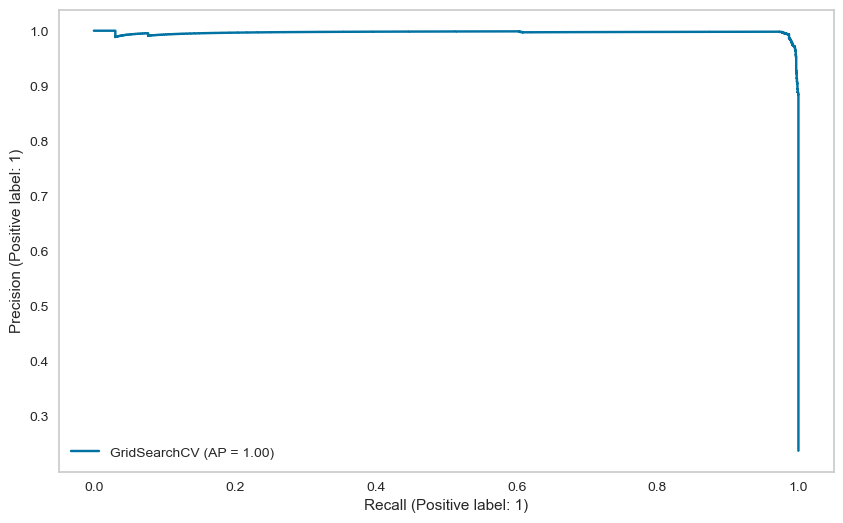

In [453]:
plot_precision_recall_curve(SVC_grid_model, X_train, y_train);

#### Prediction

In [219]:
# predict on train and test data

y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

In [220]:
# define model comparison variables

SVC_AP = viz.score_ # AP: average precision

SVC_f1_test = f1_score(y_test, y_pred_test)
SVC_f1_train = f1_score(y_train, y_pred_train)

SVC_recall_test = recall_score(y_test, y_pred_test)
SVC_recall_train = recall_score(y_train, y_pred_train)

SVC_AP, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.9789260696594247,
 0.948843728100911,
 0.9836805555555556,
 0.9481792717086834,
 0.991599579978999)

### KNN Model - without duplicates

In [456]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [458]:
# built a pipe model for KNN with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

In [459]:
# fit the logistic regression model on train data

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN_model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.82      0.89      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.93      0.91      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



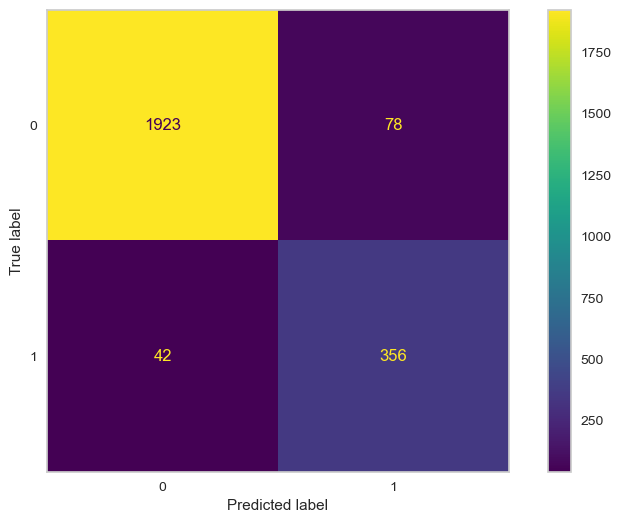

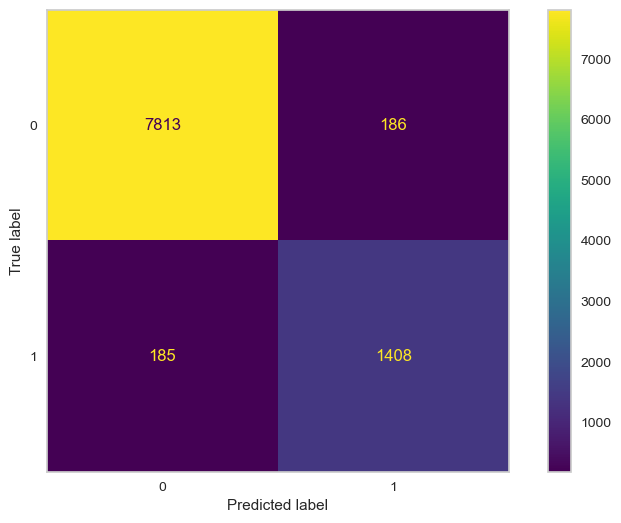

In [460]:
# check the evaluation metrics of logistic model

eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### KNN Model Cross Validation

In [461]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.01        0.08            0.86             0.88         0.86   
2       0.02        0.08            0.85             0.88         0.82   
3       0.02        0.07            0.86             0.88         0.86   
4       0.01        0.07            0.82             0.88         0.89   
5       0.01        0.06            0.81             0.89         0.91   
6       0.01        0.06            0.82             0.88         0.86   
7       0.01        0.05            0.78             0.88         0.89   
8       0.01        0.06            0.86             0.87         0.89   
9       0.01        0.05            0.84             0.88         0.87   
10      0.01        0.06            0.83             0.88         0.83   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.89     0.86      0.88           0.95            0.96  
2           0.89     0.84      0.88           0.95            0.96  
3           0.88     0.86      0.88           0.95            0.96  
4           0.88     0.86      0.88           0.95            0.96  
5           0.88     0.85      0.88           0.95            0.96  
6           0.89     0.84      0.88           0.95            0.96  
7           0.88     0.83      0.88           0.94            0.96  
8           0.88     0.88      0.88           0.96            0.96  
9           0.89     0.85      0.88           0.95            0.96  
10          0.88     0.83      0.88           0.94            0.96

In [462]:
df_scores.mean()[2:]

test_precision    0.83
train_precision   0.88
test_recall       0.87
train_recall      0.88
test_f1           0.85
train_f1          0.88
test_accuracy     0.95
train_accuracy    0.96
dtype: float64

#### Elbow Method for Choosing Reasonable K Values

In [463]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=k))]
    KNN_pipe_model = Pipeline(steps=operations)
    KNN_pipe_model.fit(X_train, y_train)  
   
    y_pred_test = KNN_pipe_model.predict(X_test)
    y_pred_train = KNN_pipe_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

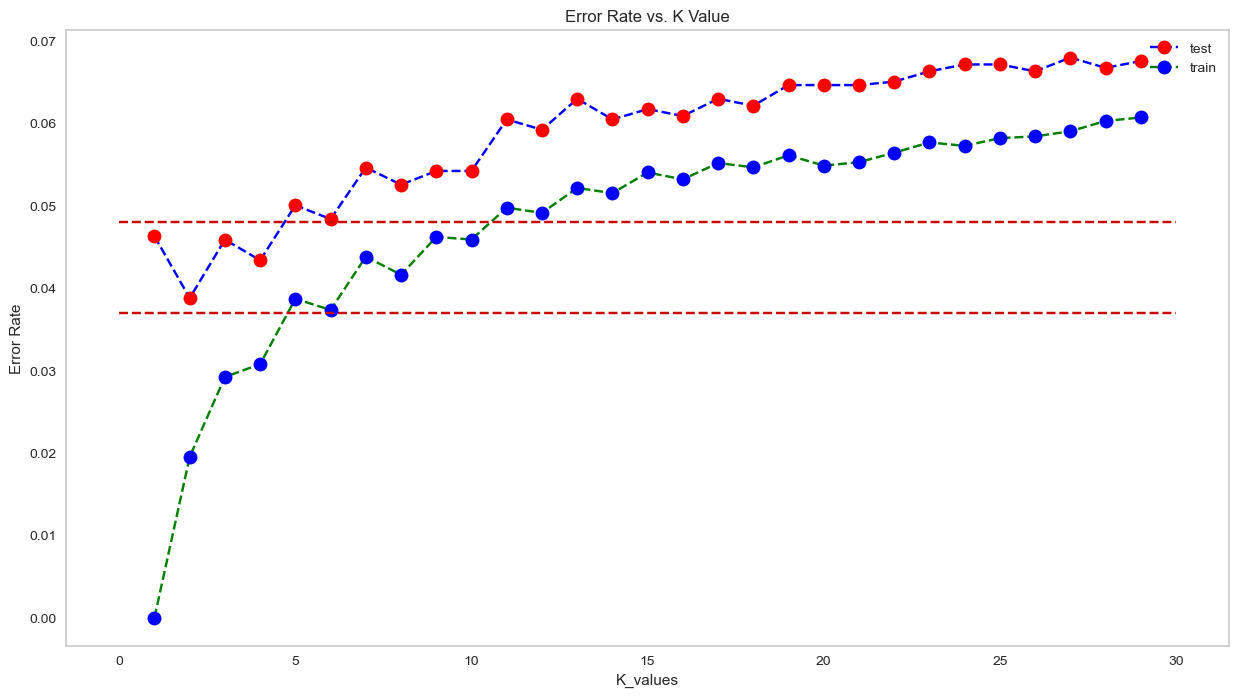

In [464]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.037, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.048, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.legend(["test", "train"]);

#### Scores by Various K Values

WITH K=6

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.88      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7999
           1       0.90      0.87      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.94      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



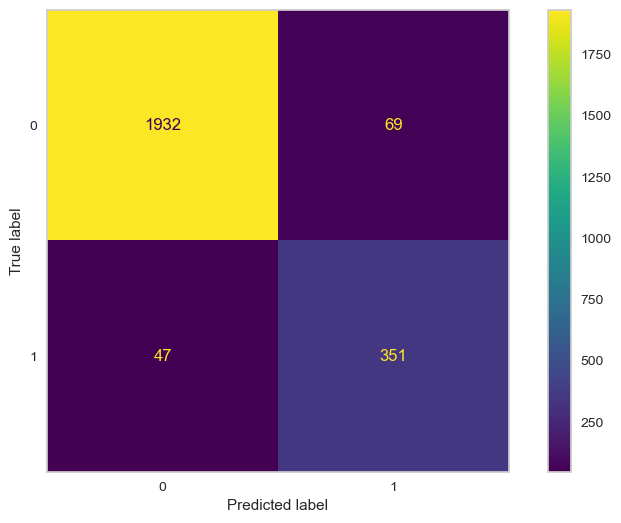

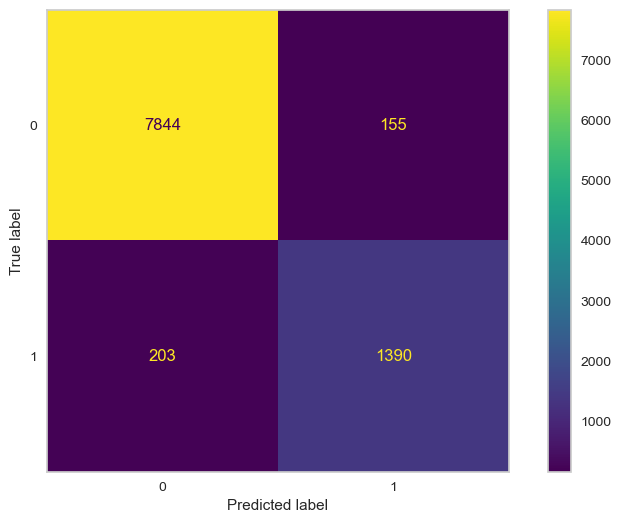

In [465]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=6))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=6\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=7

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.80      0.89      0.84       398

    accuracy                           0.95      2399
   macro avg       0.89      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7999
           1       0.86      0.88      0.87      1593

    accuracy                           0.96      9592
   macro avg       0.92      0.93      0.92      9592
weighted avg       0.96      0.96      0.96      9592



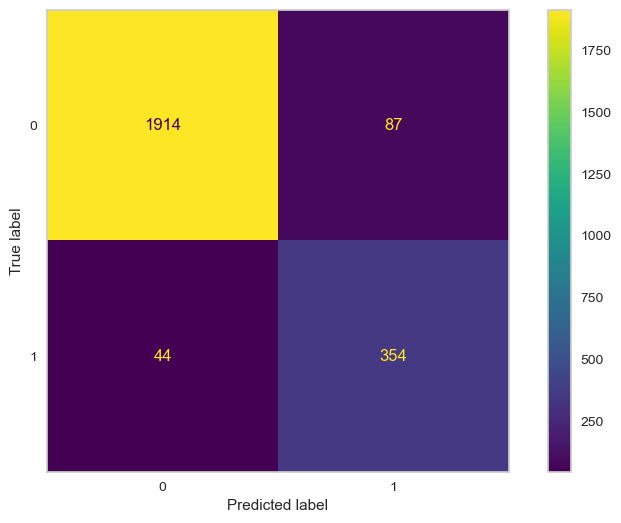

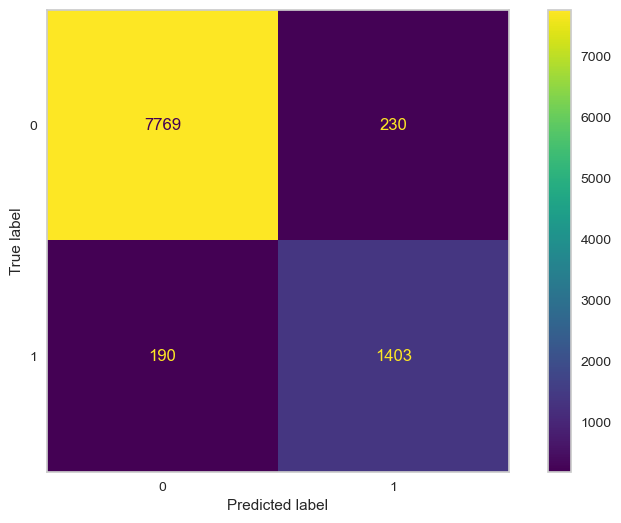

In [466]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=7))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=7\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=8

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2001
           1       0.82      0.87      0.85       398

    accuracy                           0.95      2399
   macro avg       0.90      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7999
           1       0.88      0.87      0.87      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.92      0.92      9592
weighted avg       0.96      0.96      0.96      9592



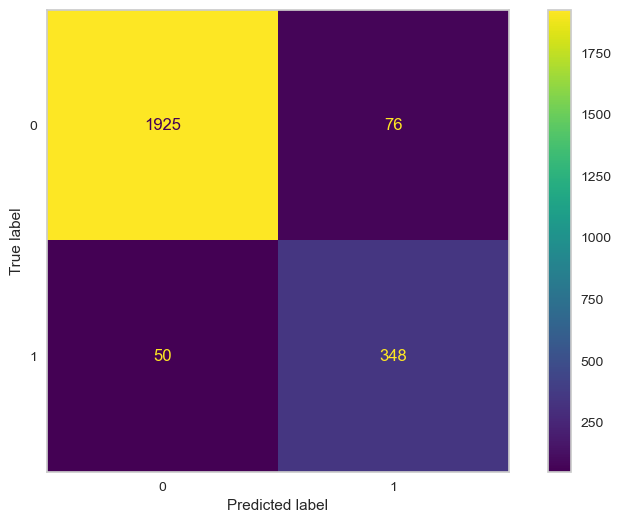

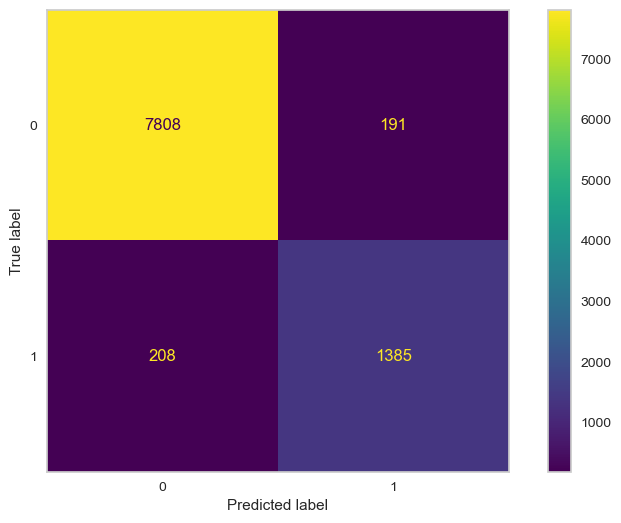

In [467]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=8))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=10

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2001
           1       0.82      0.86      0.84       398

    accuracy                           0.95      2399
   macro avg       0.90      0.91      0.90      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7999
           1       0.86      0.86      0.86      1593

    accuracy                           0.95      9592
   macro avg       0.92      0.92      0.92      9592
weighted avg       0.95      0.95      0.95      9592



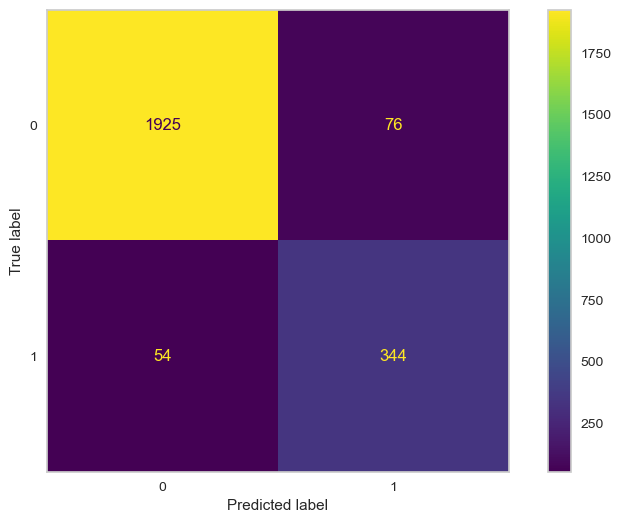

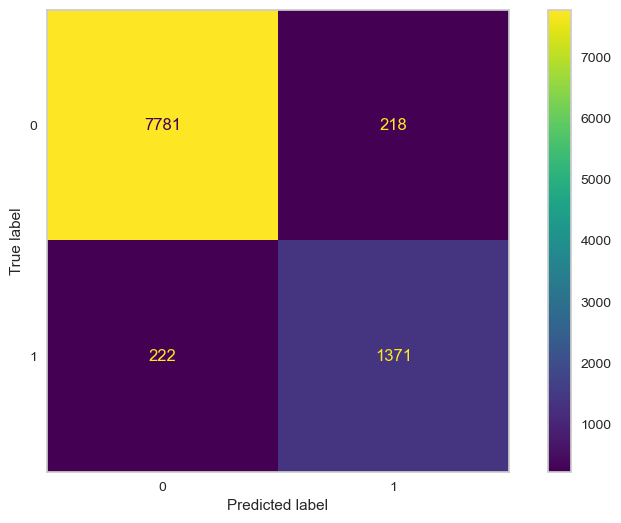

In [468]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=10))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=10\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

#### KNN Model GridsearchCV

In [469]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations)

# defining the grid parameter
k_values=[5, 6, 7, 8, 10, 15]

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', "distance"]
             }

# built KNN grid model
KNN_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [470]:
# fit grid model on train data

KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 6, 7, 8, 10, 15],
                         'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='recall')

In [471]:
KNN_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=15, p=1,
                                      weights='distance'))])

In [472]:
KNN_grid_model.best_params_

{'KNN__n_neighbors': 15, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [473]:
KNN_grid_model.best_score_

0.893927564519627

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.81      0.91      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.94      0.92      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



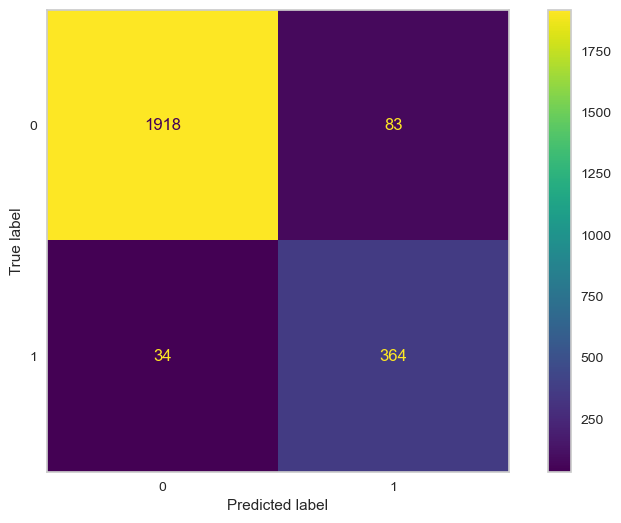

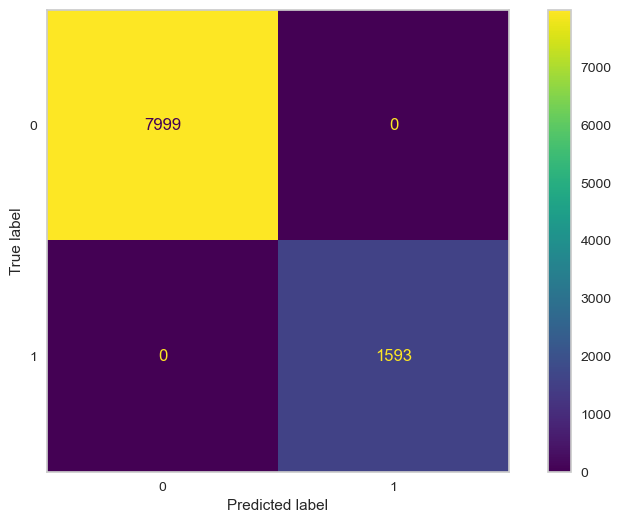

In [474]:
# checking the evaluation metrics of grid model

eval_metric(KNN_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

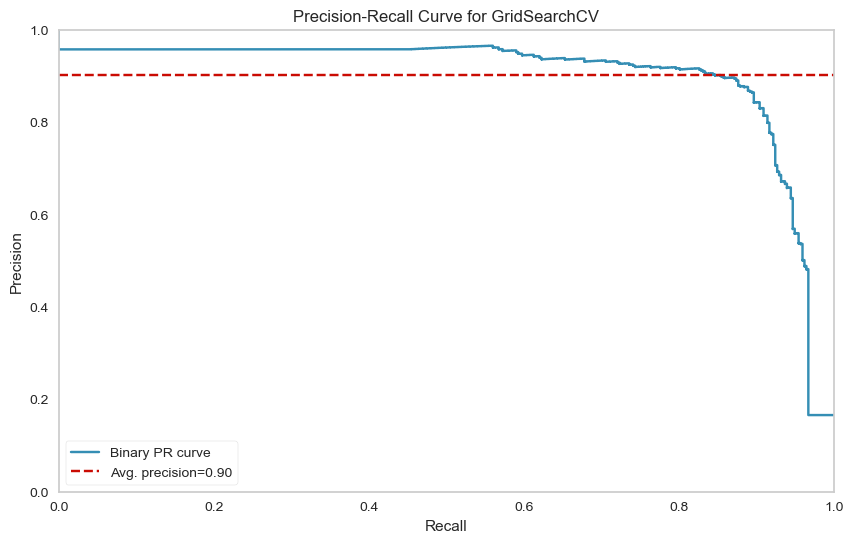

In [475]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

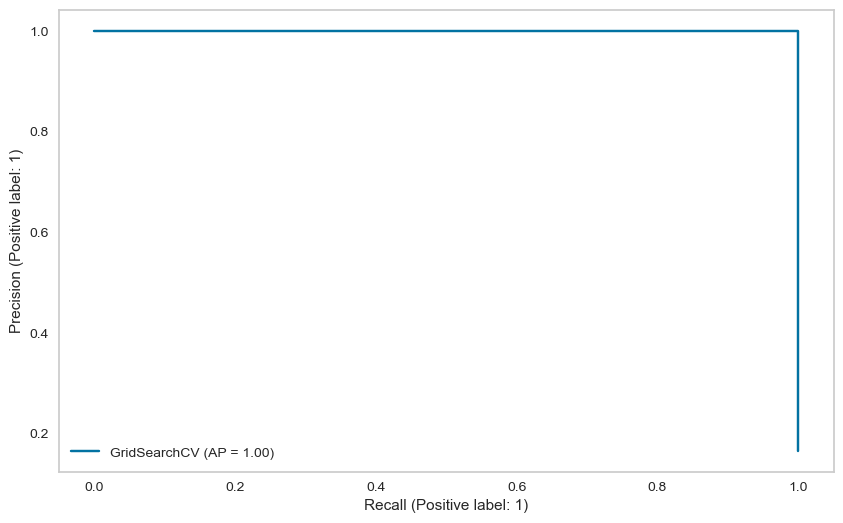

In [476]:
plot_precision_recall_curve(KNN_grid_model, X_train, y_train);

#### Prediction

In [477]:
# predict on train and test data

y_pred_test = KNN_grid_model.predict(X_test)
y_pred_train = KNN_grid_model.predict(X_train)

In [478]:
# define model comparison variables

KNN_AP = viz.score_ # AP: average precision

KNN_f1_test = f1_score(y_test, y_pred_test)
KNN_f1_train = f1_score(y_train, y_pred_train)

KNN_recall_test = recall_score(y_test, y_pred_test)
KNN_recall_train = recall_score(y_train, y_pred_train)

KNN_AP, KNN_f1_test, KNN_f1_train, KNN_recall_test, KNN_recall_train

(0.9018020620904542, 0.8615384615384615, 1.0, 0.914572864321608, 1.0)

### KNN Model - with duplicates

In [221]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [223]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

In [224]:
# fit the KNN model on train data

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN_model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.93      0.89       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000



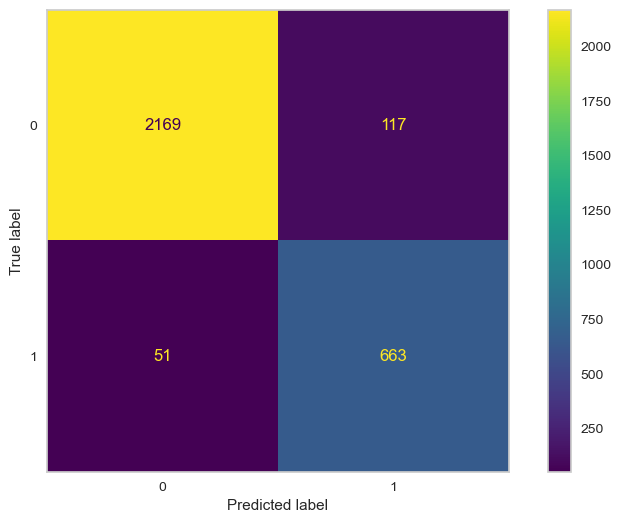




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.91      0.95      0.93      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.96      0.95     11999
weighted avg       0.97      0.96      0.96     11999



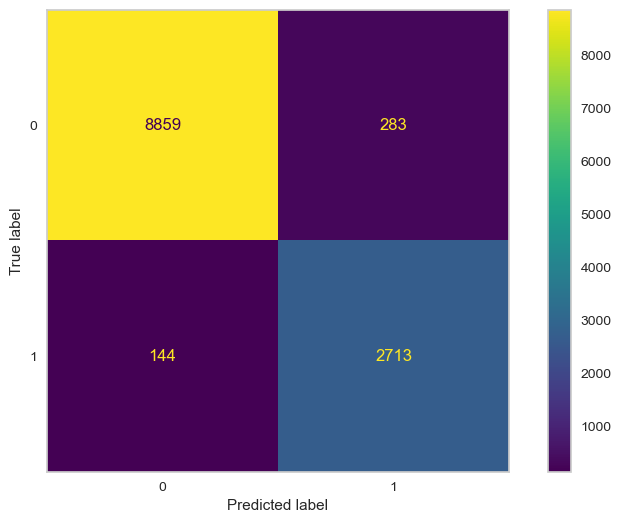

In [225]:
# check the evaluation metrics of logistic model

eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### KNN Model Cross Validation

In [226]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.02        0.08            0.87             0.90         0.94   
2       0.02        0.08            0.86             0.90         0.87   
3       0.02        0.06            0.85             0.90         0.88   
4       0.01        0.06            0.84             0.90         0.92   
5       0.01        0.06            0.84             0.91         0.87   
6       0.02        0.07            0.86             0.91         0.89   
7       0.02        0.07            0.86             0.91         0.89   
8       0.02        0.08            0.86             0.90         0.91   
9       0.01        0.08            0.86             0.90         0.92   
10      0.02        0.34            0.85             0.91         0.88   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.94     0.90      0.92           0.95            0.96  
2           0.94     0.87      0.92           0.94            0.96  
3           0.94     0.86      0.92           0.93            0.96  
4           0.94     0.88      0.92           0.94            0.96  
5           0.94     0.86      0.92           0.93            0.96  
6           0.94     0.88      0.92           0.94            0.96  
7           0.94     0.87      0.93           0.94            0.96  
8           0.94     0.88      0.92           0.94            0.96  
9           0.94     0.89      0.92           0.94            0.96  
10          0.94     0.87      0.92           0.94            0.96

In [227]:
df_scores.mean()[2:]

test_precision    0.86
train_precision   0.90
test_recall       0.90
train_recall      0.94
test_f1           0.88
train_f1          0.92
test_accuracy     0.94
train_accuracy    0.96
dtype: float64

#### Elbow Method for Choosing Reasonable K Values

In [228]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=k))]
    KNN_pipe_model = Pipeline(steps=operations)
    KNN_pipe_model.fit(X_train, y_train)  
   
    y_pred_test = KNN_pipe_model.predict(X_test)
    y_pred_train = KNN_pipe_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

In [229]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0455, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.055, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.legend(["test", "train"]);

#### Scores by Various K Values

WITH K=6

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2286
           1       0.88      0.92      0.90       714

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000



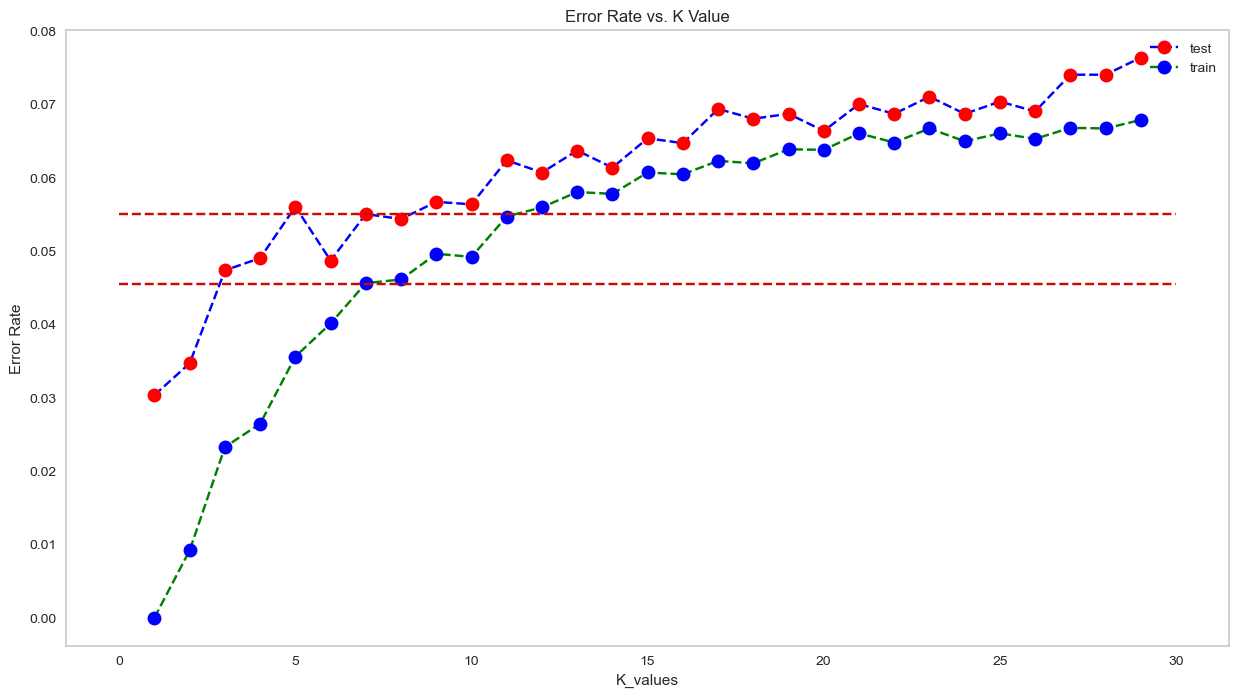

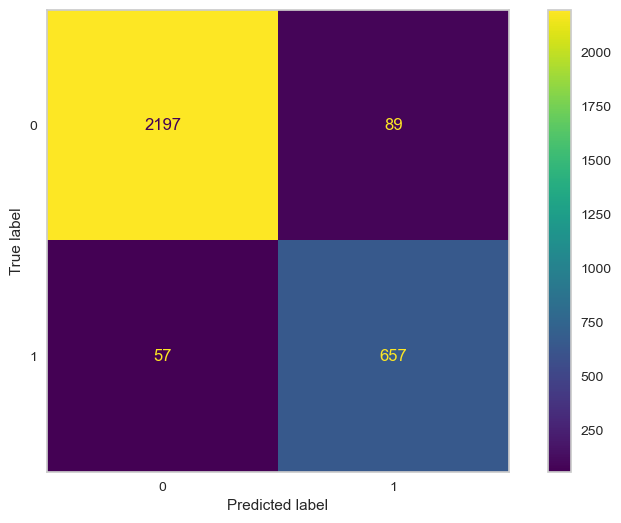




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9142
           1       0.93      0.90      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.95      0.94      0.94     11999
weighted avg       0.96      0.96      0.96     11999



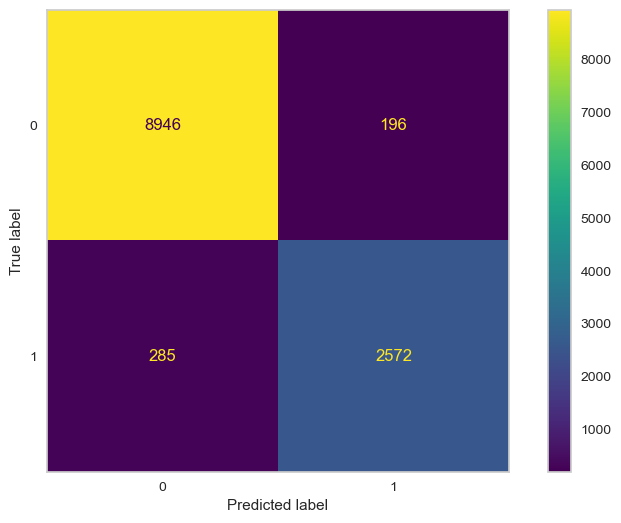

In [230]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=6))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=6\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=7

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.94      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.94      0.95      3000



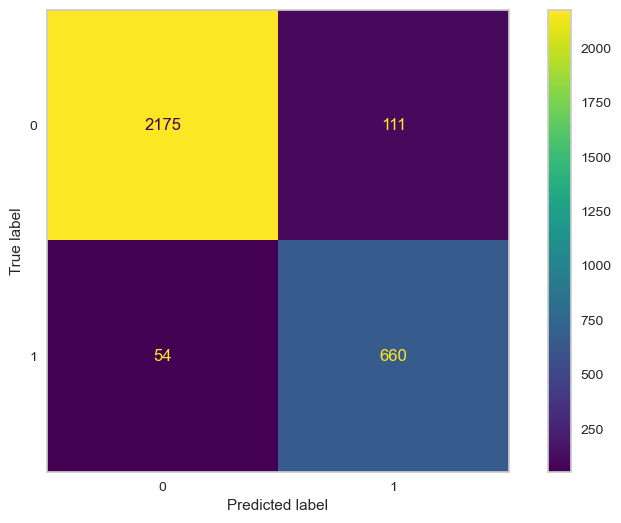




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9142
           1       0.90      0.91      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.94      0.94      0.94     11999
weighted avg       0.95      0.95      0.95     11999



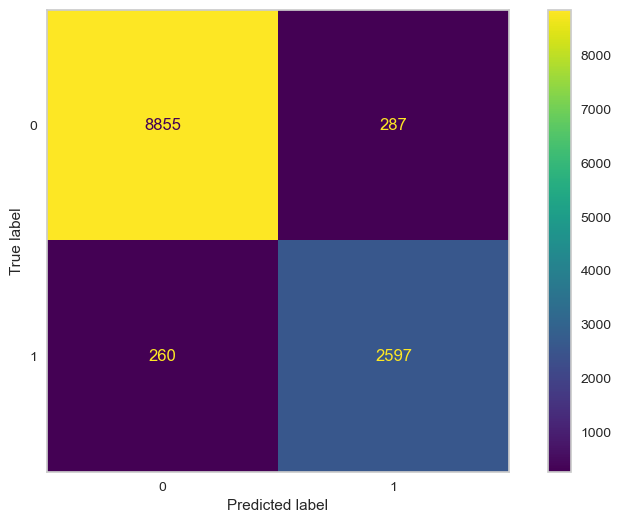

In [231]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=7))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=7\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=8

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2286
           1       0.87      0.91      0.89       714

    accuracy                           0.95      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



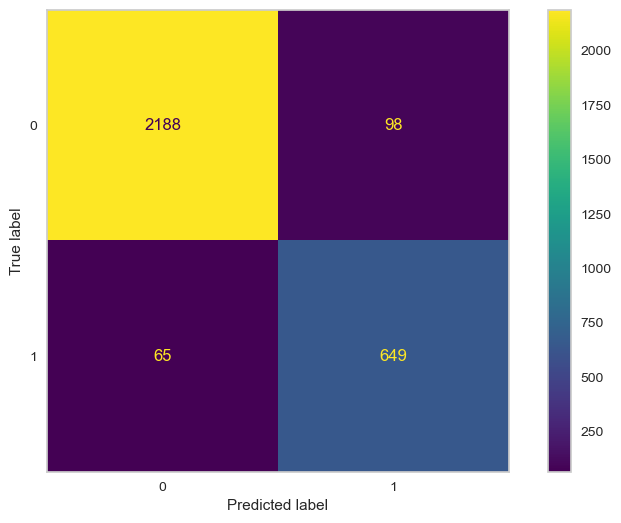




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9142
           1       0.91      0.89      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.94      0.93      0.94     11999
weighted avg       0.95      0.95      0.95     11999



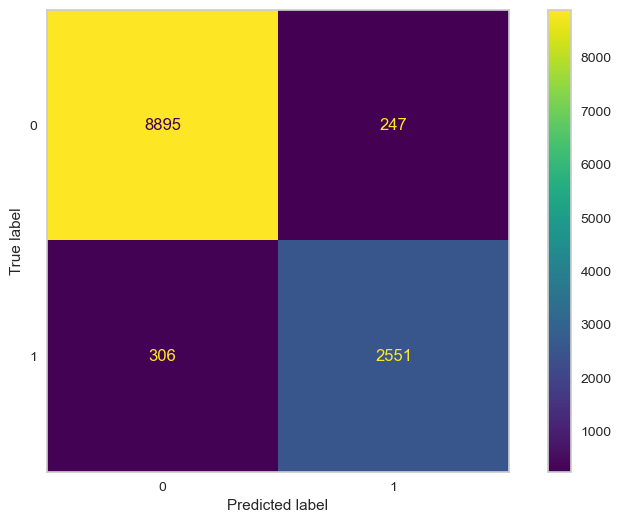

In [232]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=8))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=10

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.86      0.91      0.88       714

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



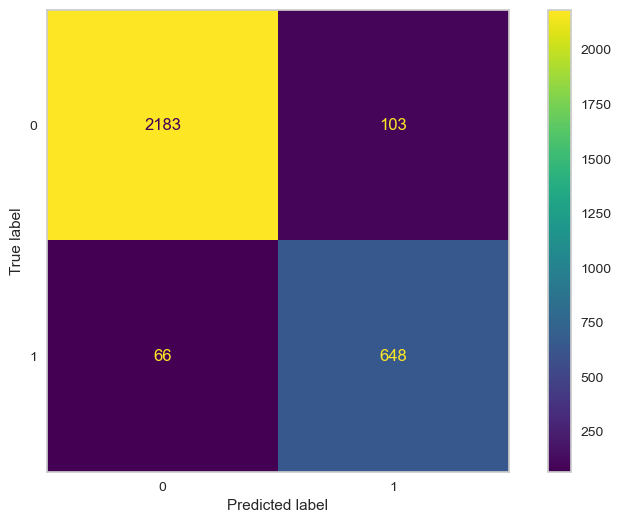




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9142
           1       0.90      0.89      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.93      0.93     11999
weighted avg       0.95      0.95      0.95     11999



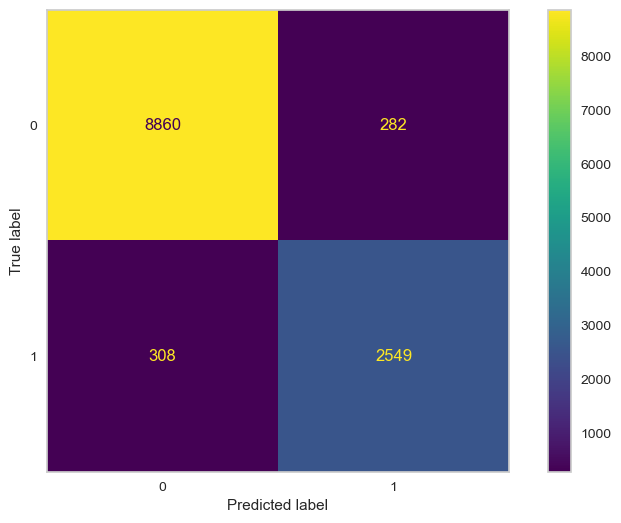

In [233]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=10))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=10\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

#### KNN Model GridsearchCV

In [234]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations)

# defining the grid parameter
k_values=[5, 6, 7, 8, 10, 15]

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', "distance"]
             }

# built KNN grid model
KNN_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [235]:
# fit grid model on train data

KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 6, 7, 8, 10, 15],
                         'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='recall')

In [236]:
KNN_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=15, p=1,
                                      weights='distance'))])

In [237]:
KNN_grid_model.best_params_

{'KNN__n_neighbors': 15, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [238]:
KNN_grid_model.best_score_

0.9636014598361358

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2286
           1       0.89      0.97      0.93       714

    accuracy                           0.96      3000
   macro avg       0.94      0.97      0.95      3000
weighted avg       0.97      0.96      0.96      3000



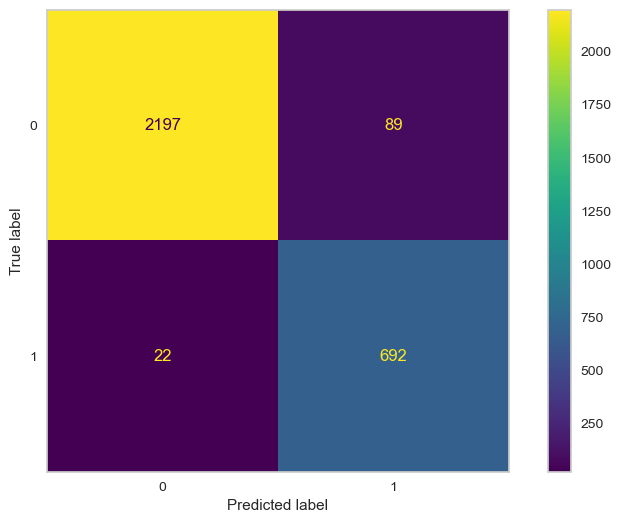




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



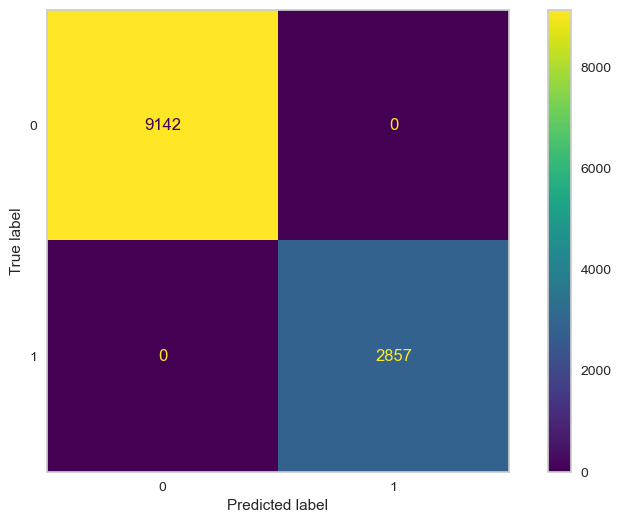

In [239]:
# checking the evaluation metrics of grid model

eval_metric(KNN_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

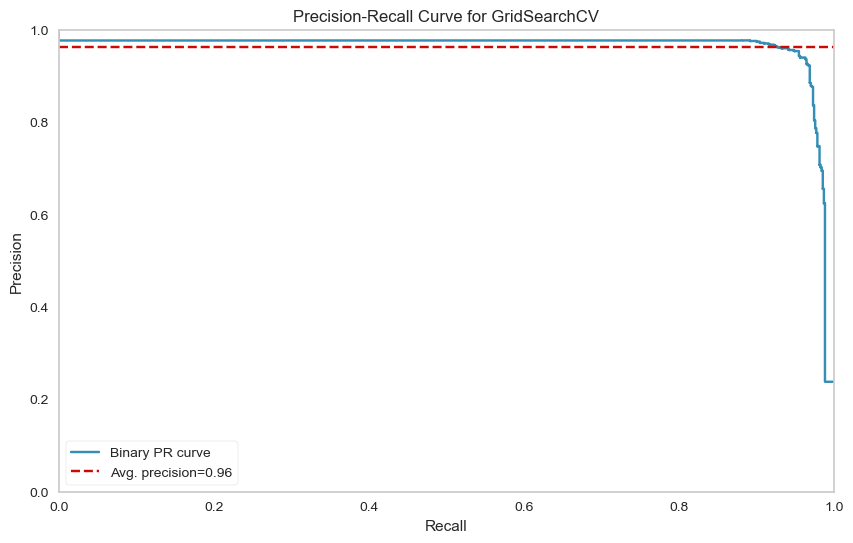

In [240]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

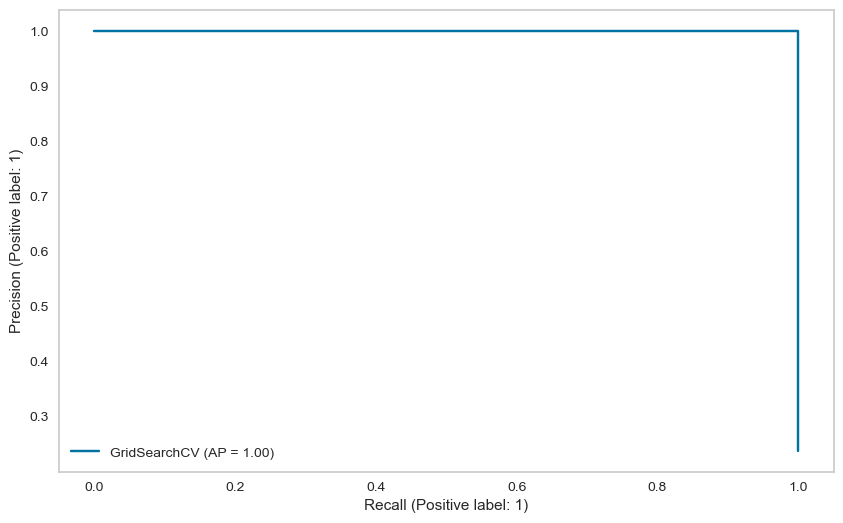

In [499]:
plot_precision_recall_curve(KNN_grid_model, X_train, y_train);

#### Prediction

In [241]:
# As we got better result with KNN model with default parameters, we will continue with it.

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)
KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN_model', KNeighborsClassifier())])

In [242]:
# predict on train and test data

y_pred_test = KNN_pipe_model.predict(X_test)
y_pred_train = KNN_pipe_model.predict(X_train)

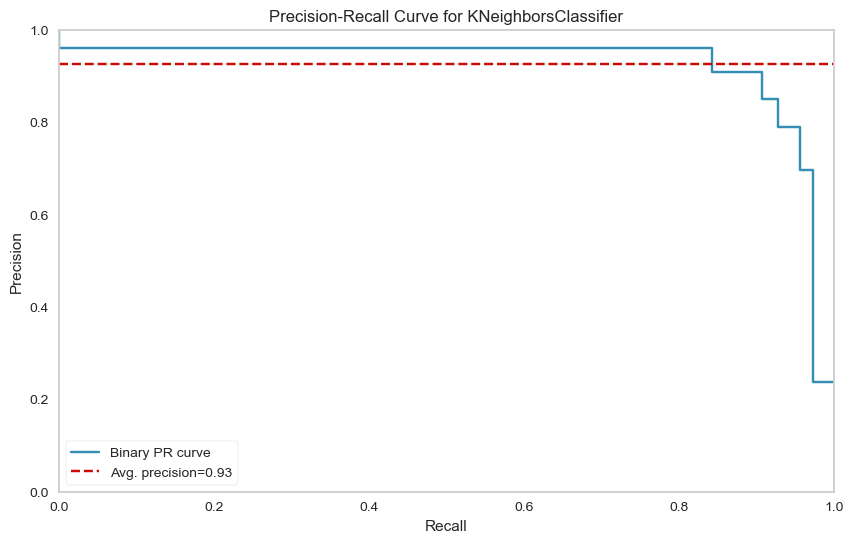

In [243]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_pipe_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [244]:
# define model comparison variables

KNN_AP = viz.score_ # AP: average precision

KNN_f1_test = f1_score(y_test, y_pred_test)
KNN_f1_train = f1_score(y_train, y_pred_train)

KNN_recall_test = recall_score(y_test, y_pred_test)
KNN_recall_train = recall_score(y_train, y_pred_train)

KNN_AP, KNN_f1_test, KNN_f1_train, KNN_recall_test, KNN_recall_train

(0.9260274621555172,
 0.8875502008032129,
 0.9270459593370921,
 0.9285714285714286,
 0.9495974798739937)

### Random Forest Model - without duplicates

In [840]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [841]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [842]:
cat = X_train.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [843]:
# defining column transformer object for tree based models without scaling, because these models doesn't need scaling

cat = X_train.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

#### Model Building

In [844]:
# built a pipe model for Random Forest with default hyperparameter

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

RF_pipe_model = Pipeline(steps=operations)

In [845]:
# fit the RF model on train data

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



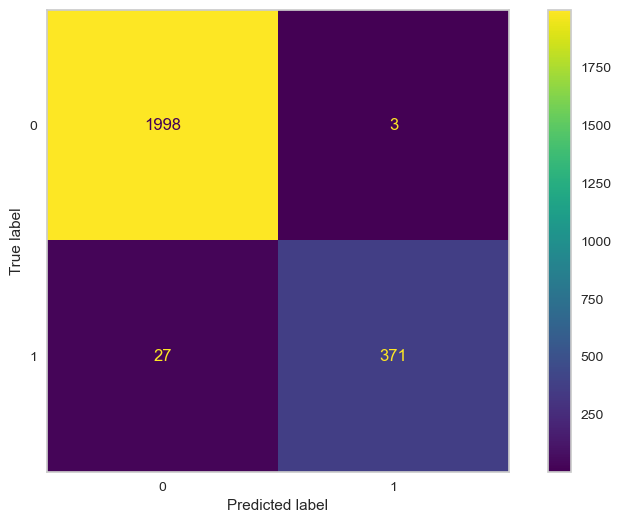

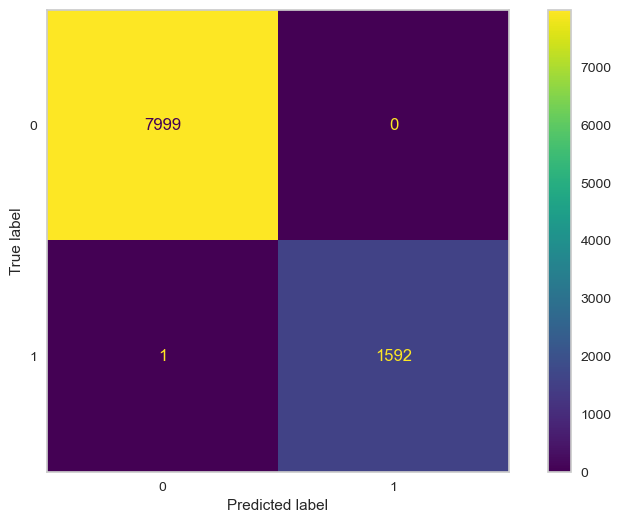

In [846]:
# check the evaluation metrics of RF pipe model

eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

#### Random Forest Model Cross Validation

In [847]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.56        0.02            0.99             1.00         0.91   
2       0.48        0.02            0.99             1.00         0.88   
3       0.63        0.02            0.99             1.00         0.89   
4       0.56        0.02            0.97             1.00         0.94   
5       0.54        0.02            1.00             1.00         0.93   
6       0.58        0.02            0.98             1.00         0.89   
7       0.58        0.02            1.00             1.00         0.92   
8       0.59        0.02            0.99             1.00         0.92   
9       0.48        0.02            0.99             1.00         0.89   
10      0.59        0.02            0.98             1.00         0.87   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           1.00     0.95      1.00           0.98            1.00  
2           1.00     0.93      1.00           0.98            1.00  
3           1.00     0.94      1.00           0.98            1.00  
4           1.00     0.96      1.00           0.99            1.00  
5           1.00     0.96      1.00           0.99            1.00  
6           1.00     0.93      1.00           0.98            1.00  
7           1.00     0.96      1.00           0.99            1.00  
8           1.00     0.95      1.00           0.99            1.00  
9           1.00     0.93      1.00           0.98            1.00  
10          1.00     0.92      1.00           0.97            1.00

In [848]:
df_scores.mean()[2:]

test_precision    0.99
train_precision   1.00
test_recall       0.90
train_recall      1.00
test_f1           0.94
train_f1          1.00
test_accuracy     0.98
train_accuracy    1.00
dtype: float64

#### Random Forest Model GridSearchCV

In [851]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"RF_model__n_estimators":[10, 50, 100],
             "RF_model__criterion":["entropy","gini"],
              "RF_model__max_features":['auto',"log2"],
              "RF_model__max_depth": [5, 10, 15],
             "RF_model__min_samples_split": [2, 5],
             "RF_model__min_samples_leaf" : [1, 5]}

In [852]:
# built RF grid model

RF_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="recall",
                          cv=5,
                          n_jobs = -1)

In [853]:
# fit he RF grid model on train data

RF_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [5, 10, 15],
                         'RF_model__max_features': ['auto', 'log2'],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5],
                         'RF_model__n_estimators': [10, 50, 100]},
             scoring='recall')

In [854]:
RF_grid_model.best_score_

0.9177677884899745

In [855]:
RF_grid_model.best_params_

{'RF_model__criterion': 'entropy',
 'RF_model__max_depth': 5,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 10}

In [856]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5,
                                        max_features='auto',
                                        min_samples_split=5, n_estimators=10,
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2001
           1       0.88      0.93      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.91      0.92      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592



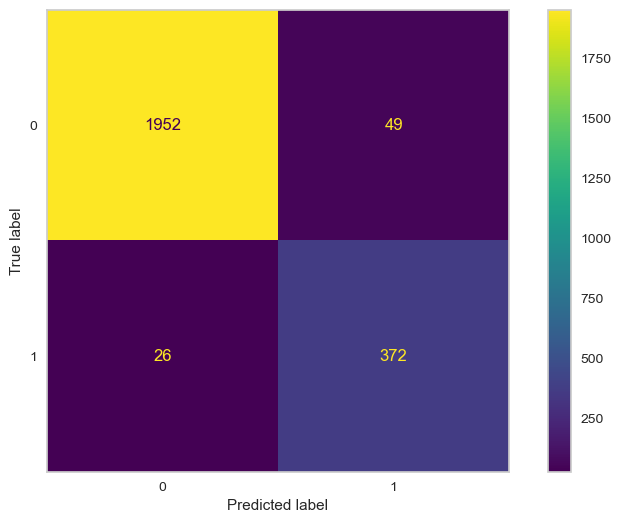

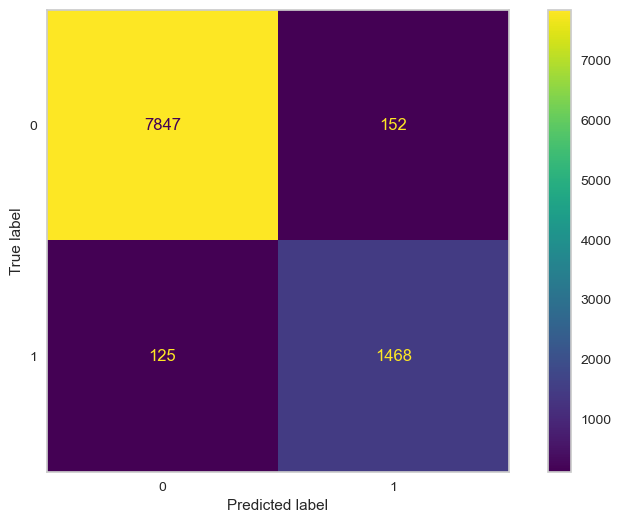

In [857]:
# check the evaluation metrics of RF grid model

eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

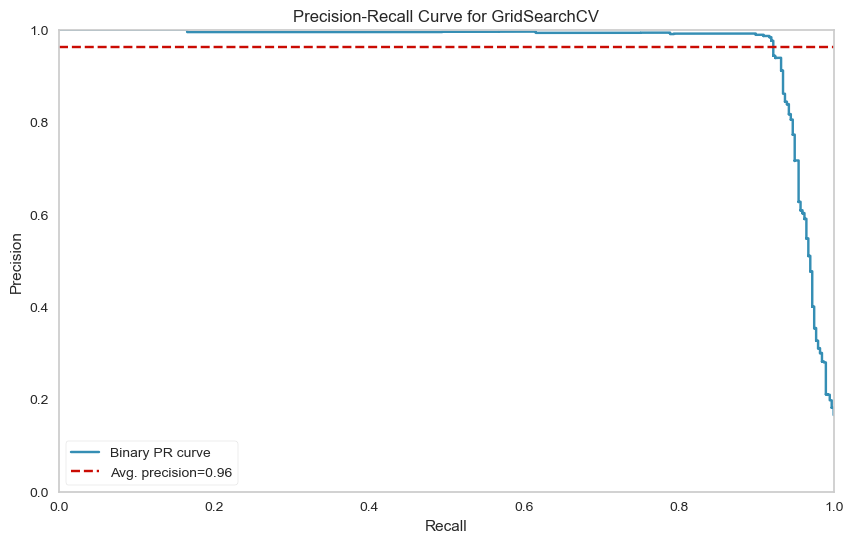

In [858]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = RF_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Prediction

In [859]:
# predict on train and test data

y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [860]:
# define model comparison variables

RF_AP = viz.score_
RF_f1_test = f1_score(y_test, y_pred_test)
RF_f1_train = f1_score(y_train, y_pred_train)

RF_recall_test = recall_score(y_test, y_pred_test)
RF_recall_train = recall_score(y_train, y_pred_train)

RF_AP, RF_f1_test, RF_f1_train, RF_recall_test, RF_recall_train

(0.9628899891693954,
 0.9084249084249084,
 0.913787737317149,
 0.9346733668341709,
 0.9215317011927181)

### Random Forest Model - with duplicates

In [245]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

#### Model Building

In [247]:
# built a pipe model for Random Forest with default hyperparameter

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

RF_pipe_model = Pipeline(steps=operations)

In [248]:
# fit the RF model on train data

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



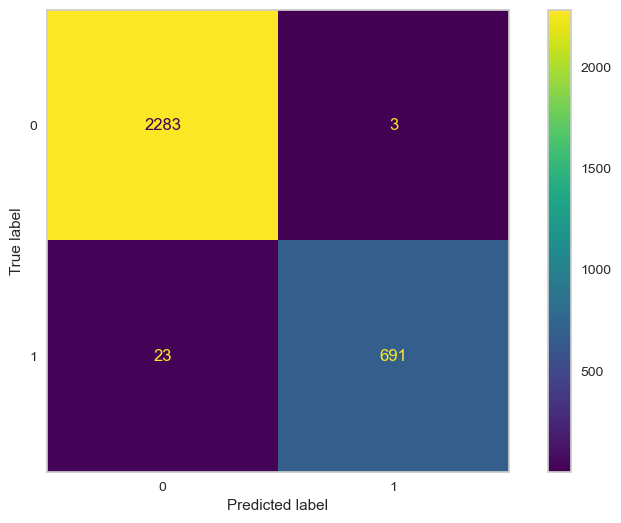




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



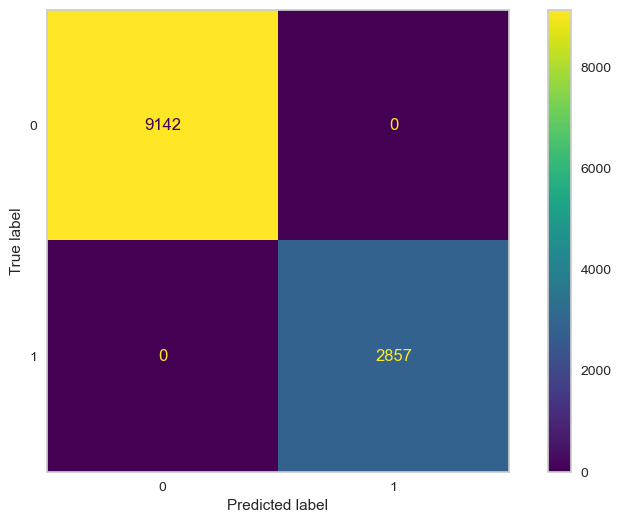

In [249]:
# check the evaluation metrics of RF pipe model

eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

#### Random Forest Model Cross Validation

In [250]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.59        0.02            1.00             1.00         0.99   
2       0.56        0.02            1.00             1.00         0.96   
3       0.65        0.03            0.99             1.00         0.97   
4       0.62        0.02            0.99             1.00         0.97   
5       0.63        0.03            1.00             1.00         0.95   
6       0.63        0.02            1.00             1.00         0.96   
7       0.62        0.03            0.99             1.00         0.97   
8       0.62        0.03            0.99             1.00         0.97   
9       0.61        0.02            1.00             1.00         0.99   
10      0.55        0.02            1.00             1.00         0.96   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           1.00     0.99      1.00           1.00            1.00  
2           1.00     0.98      1.00           0.99            1.00  
3           1.00     0.98      1.00           0.99            1.00  
4           1.00     0.98      1.00           0.99            1.00  
5           1.00     0.97      1.00           0.99            1.00  
6           1.00     0.98      1.00           0.99            1.00  
7           1.00     0.98      1.00           0.99            1.00  
8           1.00     0.98      1.00           0.99            1.00  
9           1.00     0.99      1.00           1.00            1.00  
10          1.00     0.98      1.00           0.99            1.00

In [251]:
df_scores.mean()[2:]

test_precision    0.99
train_precision   1.00
test_recall       0.97
train_recall      1.00
test_f1           0.98
train_f1          1.00
test_accuracy     0.99
train_accuracy    1.00
dtype: float64

#### Random Forest Model GridSearchCV

In [252]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"RF_model__n_estimators":[10, 50, 100],
              "RF_model__max_depth": [2, 5, 7, 10]}

In [253]:
# built RF grid model

RF_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="recall",
                          cv=5,
                          n_jobs = -1)

In [254]:
# fit he RF grid model on train data

RF_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 5, 7, 10],
                         'RF_model__n_estimators': [10, 50, 100]},
             scoring='recall')

In [255]:
RF_grid_model.best_score_

0.9321035356937284

In [256]:
RF_grid_model.best_params_

{'RF_model__max_depth': 10, 'RF_model__n_estimators': 10}

In [257]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=10, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.97      0.94      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



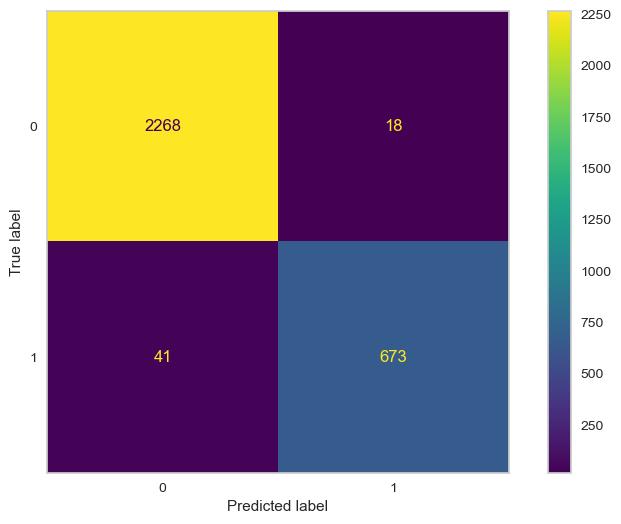




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.98      0.95      0.97      2857

    accuracy                           0.99     11999
   macro avg       0.98      0.97      0.98     11999
weighted avg       0.99      0.99      0.99     11999



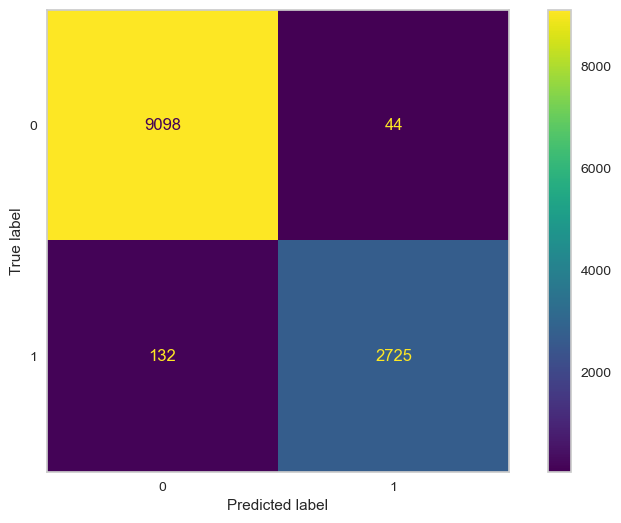

In [258]:
# check the evaluation metrics of RF grid model

eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

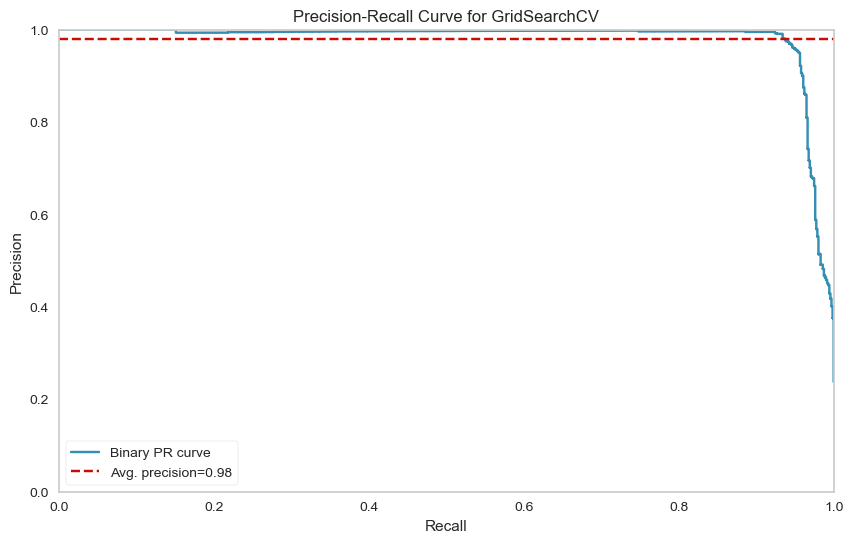

In [259]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = RF_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Prediction

In [260]:
# predict on train and test data

y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [261]:
# define model comparison variables

RF_AP = viz.score_
RF_f1_test = f1_score(y_test, y_pred_test)
RF_f1_train = f1_score(y_train, y_pred_train)

RF_recall_test = recall_score(y_test, y_pred_test)
RF_recall_train = recall_score(y_train, y_pred_train)

RF_AP, RF_f1_test, RF_f1_train, RF_recall_test, RF_recall_train

(0.9797723194524063,
 0.9580071174377225,
 0.9687166725915394,
 0.9425770308123249,
 0.9537976898844942)

### XGBoost Classifier - without duplicates

In [262]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [264]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights  # to show all class weights

array([0.59957495, 3.01067169, 0.59957495, ..., 0.59957495, 0.59957495,
       0.59957495])

#### Model Building

In [543]:
# built XGB pipe model

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)

In [544]:
# define class weights in order to use during XGBoost model fit as we have imbalanced data

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique() # to show unique class weights

array([0.59957495, 3.01067169])

In [545]:
# fit the XGB pipe model on train data

XGB_pipe_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.86      0.95      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7999
           1       0.91      0.94      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.96      0.95      9592
weighted avg       0.97      0.97      0.97      9592



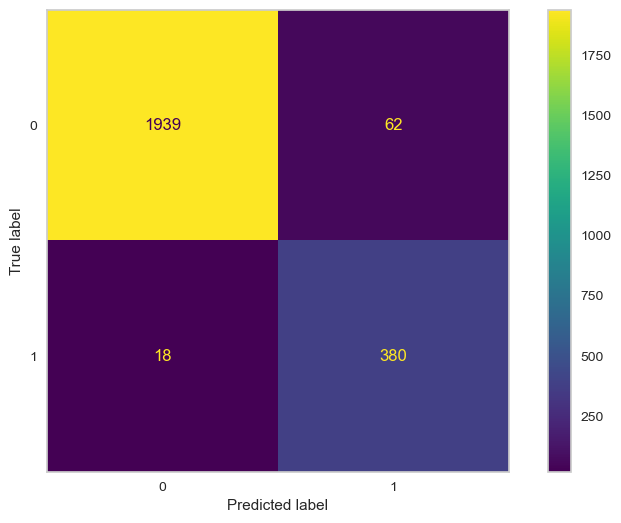

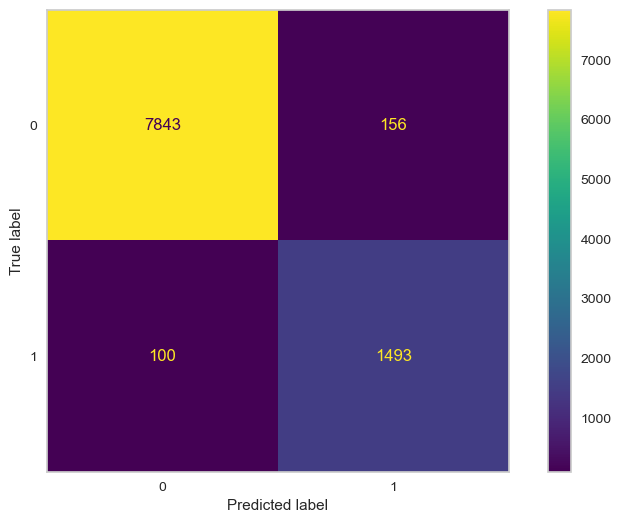

In [546]:
# check the evaluation metrics of XGB pipe model

eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

#### XGB Model Cross Validation

In [547]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10,
                        fit_params={"XGB_model__sample_weight":classes_weights},
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.37        0.00            0.88             0.89         0.93   
2       0.36        0.01            0.86             0.91         0.91   
3       0.37        0.01            0.89             0.90         0.92   
4       0.38        0.01            0.89             0.90         0.96   
5       0.36        0.01            0.90             0.90         0.95   
6       0.36        0.01            0.89             0.90         0.92   
7       0.36        0.00            0.93             0.90         0.93   
8       0.35        0.01            0.92             0.90         0.92   
9       0.36        0.00            0.88             0.91         0.93   
10      0.36        0.00            0.87             0.91         0.91   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.94     0.91      0.91           0.97            0.97  
2           0.93     0.88      0.92           0.96            0.97  
3           0.94     0.90      0.92           0.97            0.97  
4           0.93     0.92      0.92           0.97            0.97  
5           0.93     0.93      0.92           0.97            0.97  
6           0.94     0.90      0.92           0.97            0.97  
7           0.93     0.93      0.92           0.98            0.97  
8           0.94     0.92      0.92           0.97            0.97  
9           0.94     0.90      0.92           0.97            0.97  
10          0.94     0.89      0.92           0.96            0.97

In [548]:
df_scores.mean()[2:]

test_precision    0.89
train_precision   0.90
test_recall       0.93
train_recall      0.94
test_f1           0.91
train_f1          0.92
test_accuracy     0.97
train_accuracy    0.97
dtype: float64

#### XGBoost Model GridsearchCV

In [549]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [550]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

XGB_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring="recall", 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [551]:
XGB_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(learning_rate=0.3, max_depth=1,
                               random_state=101))])

In [552]:
XGB_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1}

In [553]:
XGB_grid_model.best_score_

0.9353443346937166

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.75      0.95      0.84       398

    accuracy                           0.94      2399
   macro avg       0.87      0.95      0.90      2399
weighted avg       0.95      0.94      0.94      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7999
           1       0.73      0.94      0.82      1593

    accuracy                           0.93      9592
   macro avg       0.86      0.93      0.89      9592
weighted avg       0.94      0.93      0.93      9592



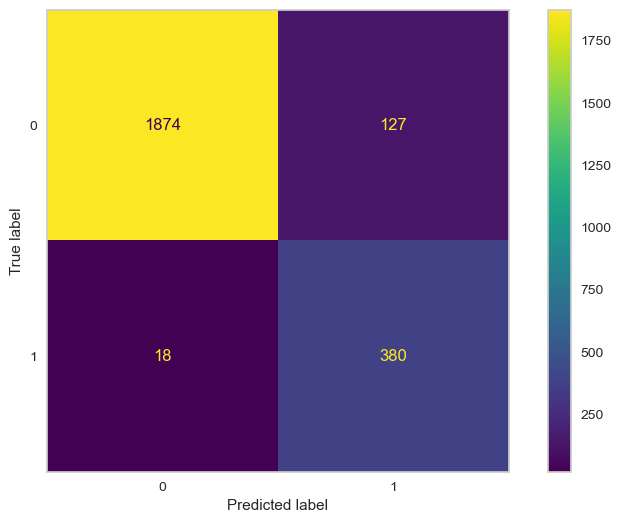

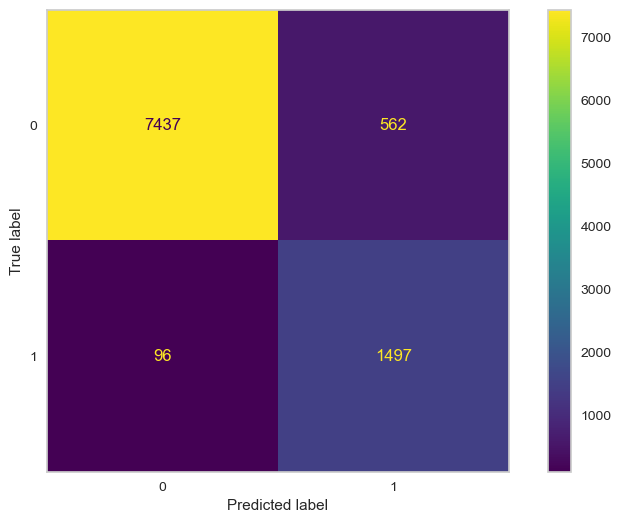

In [554]:
eval_metric(XGB_grid_model, X_train, y_train, X_test, y_test)

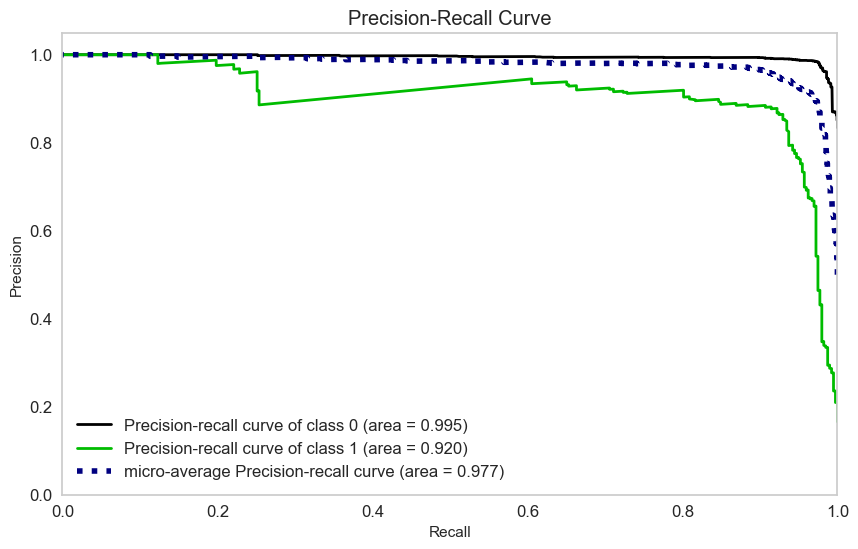

In [555]:
# from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

# operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]




# operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
#                             random_state=101, subsample=0.8, n_estimetors=50, colsample_bytree = 0.8))]

# model = Pipeline(steps=operations)

# model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = XGB_grid_model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [556]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9200744374807159

#### Prediction

In [557]:
# predict on train and test data

y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [558]:
XGB_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

XGB_f1_test = f1_score(y_test, y_pred_test)
XGB_f1_train = f1_score(y_train, y_pred_train)

XGB_recall_test = recall_score(y_test, y_pred_test)
XGB_recall_train = recall_score(y_train, y_pred_train)

XGB_AP, XGB_f1_test, XGB_f1_train, XGB_recall_test, XGB_recall_train

(0.9200744374807159,
 0.8397790055248618,
 0.8198247535596933,
 0.9547738693467337,
 0.9397363465160076)

### XGBoost Classifier - with duplicates

In [265]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

#### Model Building

In [267]:
# built XGB pipe model

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)

In [268]:
# define class weights in order to use during model fit, as we have imbalanced data

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique() # to show unique class weights

array([0.65625684, 2.09993   ])

In [269]:
# fit the XGB pipe model on train data

XGB_pipe_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('XGB_model', XGBClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.90      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



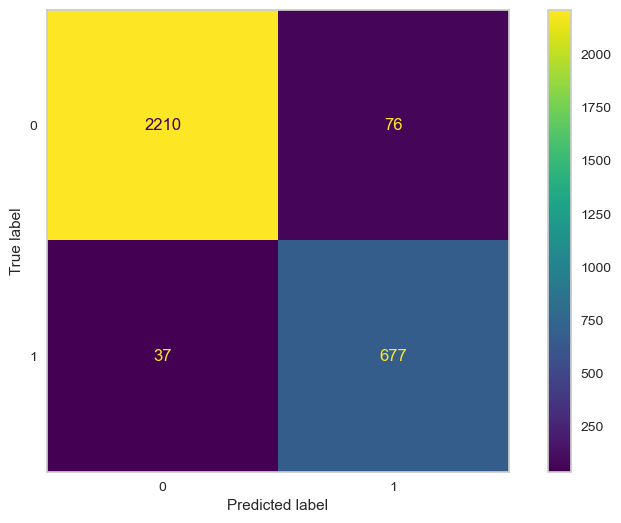




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9142
           1       0.93      0.94      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.95      0.96      0.96     11999
weighted avg       0.97      0.97      0.97     11999



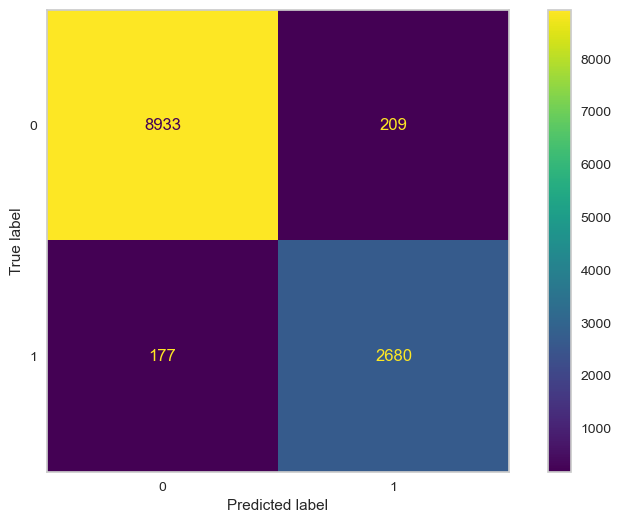

In [270]:
# check the evaluation metrics of XGB pipe model

eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

#### XGB Model Cross Validation

In [271]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10,
                        fit_params={"XGB_model__sample_weight":classes_weights},
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.66        0.01            0.97             0.93         0.95   
2       0.66        0.01            0.89             0.93         0.94   
3       0.66        0.00            0.92             0.93         0.94   
4       0.62        0.01            0.91             0.93         0.95   
5       0.67        0.02            0.92             0.93         0.91   
6       0.62        0.00            0.94             0.92         0.93   
7       0.61        0.00            0.90             0.93         0.95   
8       0.61        0.01            0.90             0.93         0.93   
9       0.58        0.00            0.92             0.93         0.94   
10      0.63        0.00            0.93             0.92         0.93   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.94     0.96      0.93           0.98            0.97  
2           0.94     0.91      0.93           0.96            0.97  
3           0.94     0.93      0.93           0.97            0.97  
4           0.94     0.93      0.93           0.96            0.97  
5           0.94     0.92      0.93           0.96            0.97  
6           0.94     0.94      0.93           0.97            0.97  
7           0.94     0.92      0.93           0.96            0.97  
8           0.94     0.92      0.93           0.96            0.97  
9           0.94     0.93      0.93           0.97            0.97  
10          0.94     0.93      0.93           0.97            0.97

In [272]:
df_scores.mean()[2:]

test_precision    0.92
train_precision   0.93
test_recall       0.94
train_recall      0.94
test_f1           0.93
train_f1          0.93
test_accuracy     0.97
train_accuracy    0.97
dtype: float64

#### XGBoost Model GridSearchCV

In [273]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1]}

In [274]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

XGB_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring="recall", 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [275]:
XGB_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('XGB_model',
                 XGBClassifier(learning_rate=0.3, max_depth=2, random_state=101,
                               subsample=0.8))])

In [276]:
XGB_grid_model.best_params_

{'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [277]:
XGB_grid_model.best_score_

0.9429506570487305

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.89      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



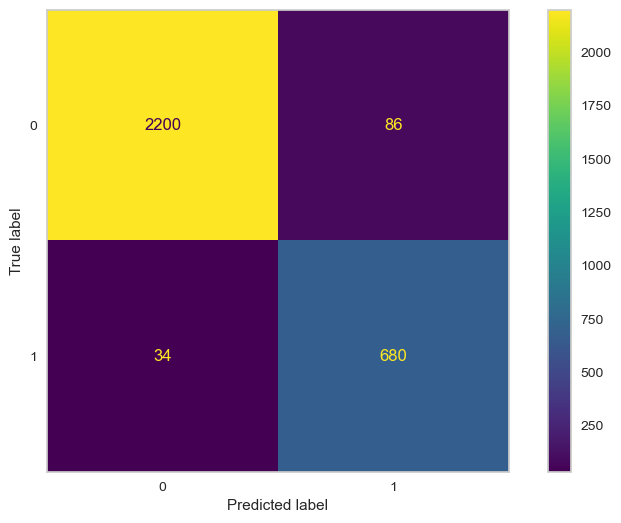




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.92      0.95      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.95      0.96      0.96     11999
weighted avg       0.97      0.97      0.97     11999



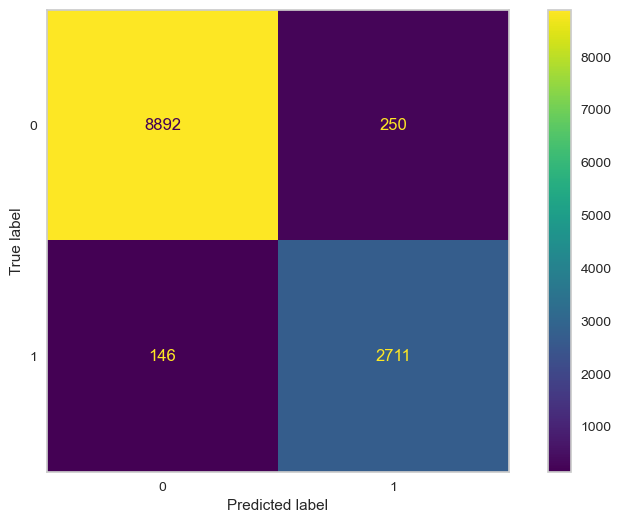

In [278]:
eval_metric(XGB_grid_model, X_train, y_train, X_test, y_test)

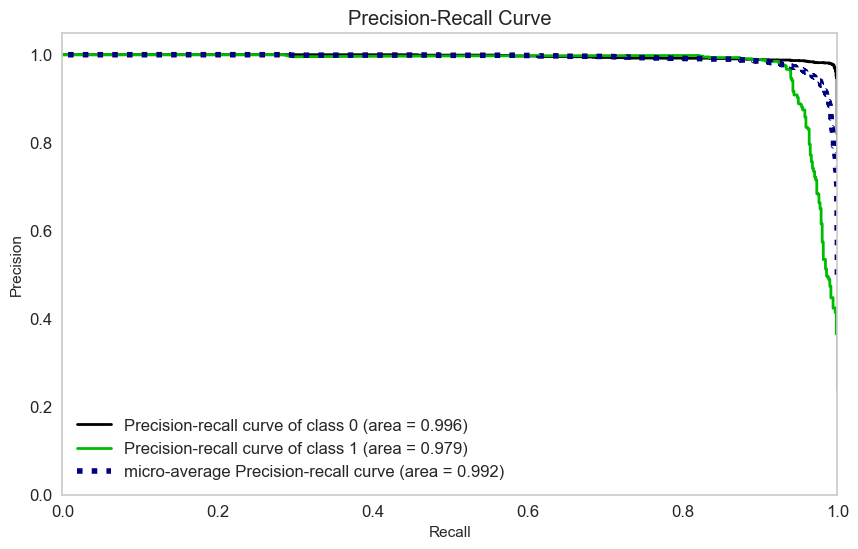

In [279]:
# from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


# operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
#                             random_state=101, subsample=0.8, n_estimetors=50, colsample_bytree = 0.8))]

# model = Pipeline(steps=operations)

# model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = XGB_grid_model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [280]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9793829259844098

#### Prediction

In [281]:
# predict on train and test data

y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [282]:
XGB_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

XGB_f1_test = f1_score(y_test, y_pred_test)
XGB_f1_train = f1_score(y_train, y_pred_train)

XGB_recall_test = recall_score(y_test, y_pred_test)
XGB_recall_train = recall_score(y_train, y_pred_train)

XGB_AP, XGB_f1_test, XGB_f1_train, XGB_recall_test, XGB_recall_train

(0.9793829259844098,
 0.9189189189189189,
 0.9319353729804056,
 0.9523809523809523,
 0.9488974448722436)

### ANN Classifier - without duplicates - without pipeline

In [133]:
# df_without_dp = pd.read_csv("df_without_dp.csv")
# df_with_dp = pd.read_csv("df_with_dp.csv")

In [134]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [136]:
# Defining class weights using scikitlaern class_weight method in order to use it in ANN model

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995749468683585, 1: 3.01067168863779}

In [137]:
# Defining column_trans object that contains  onehot encoder and ordinal encoder

onehot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((onehot_enc, ["departments"]), (ordinal_enc, ["salary"]), remainder= "passthrough")

# Defining scaler object
scaler = StandardScaler()

In [138]:
# import librraries that necessary for ANN model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#### Layer Architecture Building and Compiling without pipeline

In [715]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [716]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
seed = 101

tf.random.set_seed(seed)
tf.keras.backend.clear_session() # to reset session

model = Sequential()

model.add(Dense(26, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(14, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [718]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [719]:
%%time
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=64,
          epochs=100,
          verbose=1,
          class_weight=class_weights)

Epoch 1/100
135/135 [==============================] - 1s 3ms/step - loss: 0.6736 - recall: 0.6471 - val_loss: 0.6894 - val_recall: 0.7818
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5965 - recall: 0.7836 - val_loss: 0.5947 - val_recall: 0.9030
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4925 - recall: 0.8088 - val_loss: 0.4375 - val_recall: 0.8667
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4199 - recall: 0.8123 - val_loss: 0.3614 - val_recall: 0.8909
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3854 - recall: 0.8368 - val_loss: 0.3183 - val_recall: 0.9030
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3452 - recall: 0.8578 - val_loss: 0.2786 - val_recall: 0.9091
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3252 - recall: 0.8620 - val_loss: 0.2742 - val_recall: 0.9152
Epoch 8/100
135/135 [======

In [720]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [721]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
95  0.17    0.92      0.16        0.88
96  0.17    0.92      0.17        0.89
97  0.17    0.92      0.16        0.88
98  0.18    0.92      0.17        0.89
99  0.17    0.93      0.17        0.89

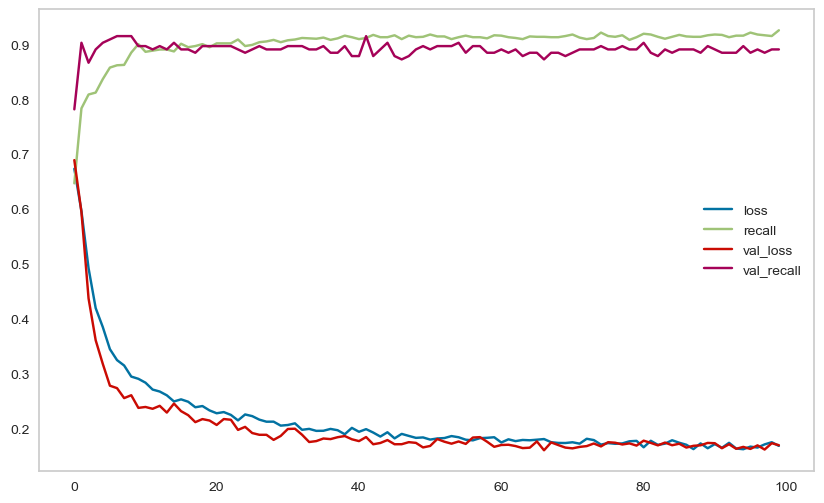

In [722]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [140]:
# define a function to compare evaluation metrics of ANN models

def eval_metric_ann(model, X_train, y_train, X_test, y_test):
    y_pred_test = model.predict(X_test) > 0.5 
    y_pred_train = model.predict(X_train) > 0.5
    
    print("TEST REPORT")
#     print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show();

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
#     print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show();

In [724]:
model.evaluate(X_test, y_test, verbose=0)

[0.16558639705181122, 0.9170854091644287]

In [725]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.16558639705181122
recall :  0.9170854091644287


300/300 [==============================] - 0s 810us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.86      0.92      0.89       398

    accuracy                           0.96      2399
   macro avg       0.92      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.92      0.92      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592



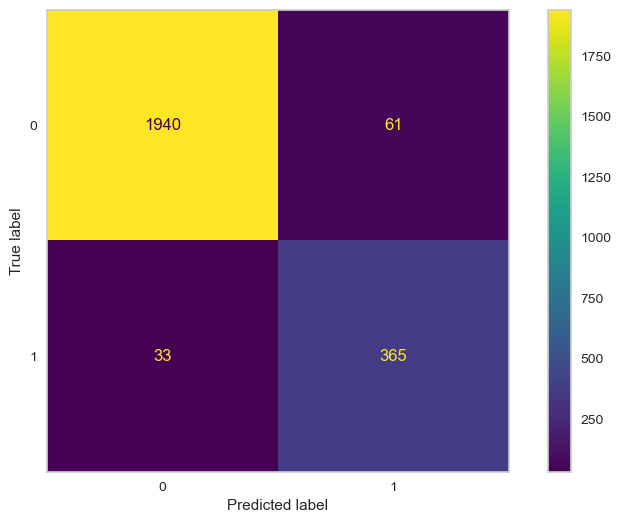

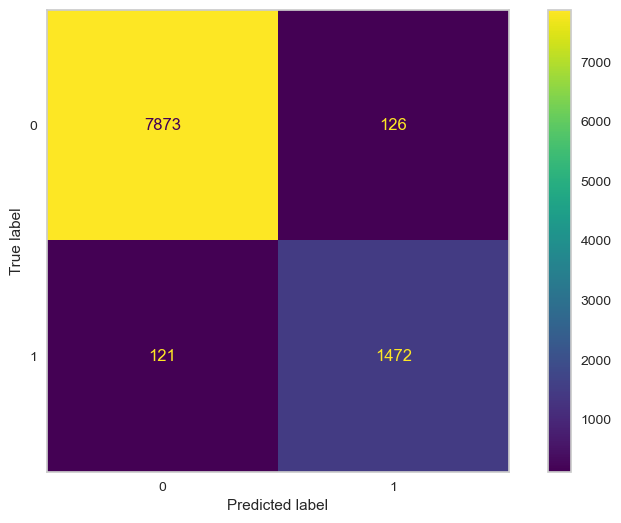

In [726]:
eval_metric_ann(model, X_train, y_train, X_test, y_test)

#### ANN Model Cross Validation

In [141]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [728]:
def build_classifier_for_CV(input_dim):
    input_dim=input_dim
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [729]:
%%time
classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_CV(input_dim=18),
                                   batch_size = 64,
                                   epochs = 100,
                                   verbose=0,
                                   class_weight = class_weights)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

270/270 [==============================] - 0s 816us/step
CPU times: total: 4min 11s
Wall time: 2min 41s


test_accuracy  train_accuracy  test_precision  train_precision  \
1            0.97            0.97            0.88             0.88   
2            0.96            0.97            0.90             0.92   
3            0.97            0.97            0.88             0.90   
4            0.96            0.97            0.86             0.89   
5            0.97            0.97            0.88             0.90   
6            0.96            0.97            0.83             0.92   
7            0.96            0.97            0.90             0.91   
8            0.97            0.97            0.90             0.90   
9            0.95            0.97            0.85             0.92   
10           0.96            0.97            0.85             0.90   

    test_recall  train_recall  test_f1  train_f1  
1          0.91          0.94     0.89      0.91  
2          0.88          0.93     0.89      0.92  
3          0.90          0.94     0.89      0.92  
4          0.92          0.93     0.89      0.91  
5          0.95          0.93     0.91      0.91  
6          0.91          0.93     0.87      0.93  
7          0.90          0.93     0.90      0.92  
8          0.94          0.92     0.92      0.91  
9          0.87          0.92     0.86      0.92  
10         0.90          0.93     0.88      0.91

In [730]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc_test", "acc_train", "pre_test", "pre_train", "rec_test", "rec_train", "f1_test", "f1_train"])

df_scores_summary

score_mean  score_std
acc_test         0.96       0.01
acc_train        0.97       0.00
pre_test         0.87       0.02
pre_train        0.90       0.01
rec_test         0.91       0.02
rec_train        0.93       0.00
f1_test          0.89       0.02
f1_train         0.92       0.01

#### ANN Model GridSearchCV

In [731]:
from tensorflow.keras.optimizers import Adam, Adadelta  # RMSprop, Nadam

In [732]:
# defining a model function for GridSearchCV

def build_classifier_for_GSCV(optimizer, learn_rate):
    
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [733]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [734]:
%%time
classifier_model = KerasClassifier(build_fn = build_classifier_for_GSCV,
                                   validation_split = 0.1,
                                   epochs = 100,
                                   class_weight = class_weights)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 0.5499 - recall: 0.6296 - val_loss: 0.3595 - val_recall: 0.9030
Epoch 2/100
270/270 [==============================] - 0s 2ms/step - loss: 0.3586 - recall: 0.8396 - val_loss: 0.2786 - val_recall: 0.9091
Epoch 3/100
270/270 [==============================] - 1s 2ms/step - loss: 0.2997 - recall: 0.8761 - val_loss: 0.2157 - val_recall: 0.9030
Epoch 4/100
270/270 [==============================] - 1s 2ms/step - loss: 0.2723 - recall: 0.8880 - val_loss: 0.2525 - val_recall: 0.9152
Epoch 5/100
270/270 [==============================] - 1s 2ms/step - loss: 0.2599 - recall: 0.8894 - val_loss: 0.2278 - val_recall: 0.9152
Epoch 5: early stopping
CPU times: total: 6.16 s
Wall time: 3min 27s


GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001302A1034F0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall')

In [735]:
grid_model.best_score_

0.9126655611302434

In [736]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [737]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
2              0.91            0.02                1   
0              0.91            0.02                2   
8              0.91            0.02                3   
6              0.91            0.02                4   
10             0.91            0.02                5   
7              0.91            0.02                6   
1              0.91            0.02                7   
9              0.90            0.02                8   
11             0.90            0.02                9   
4              0.90            0.02               10   
3              0.90            0.02               11   
5              0.90            0.02               12   

                                               params  
2   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
0   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
8   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
6   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
10  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
7   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
1   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
9   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
11  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
4   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
3   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
5   {'batch_size': 32, 'learn_rate': 0.005, 'optim...

300/300 [==============================] - 0s 943us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.76      0.92      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.93      0.90      2399
weighted avg       0.95      0.94      0.94      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7999
           1       0.77      0.92      0.84      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.93      0.90      9592
weighted avg       0.95      0.94      0.94      9592



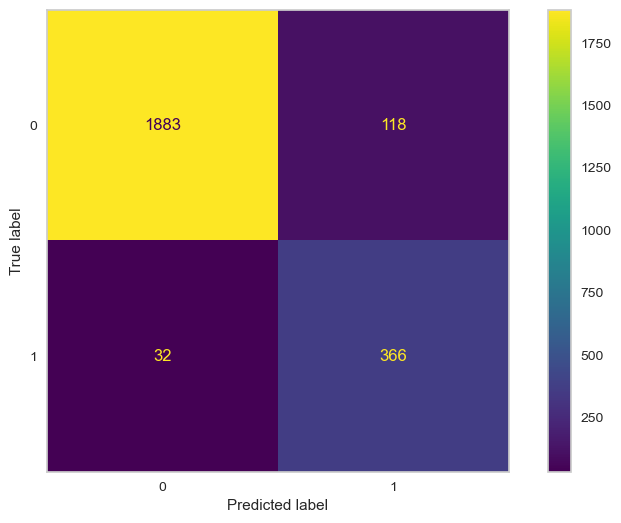

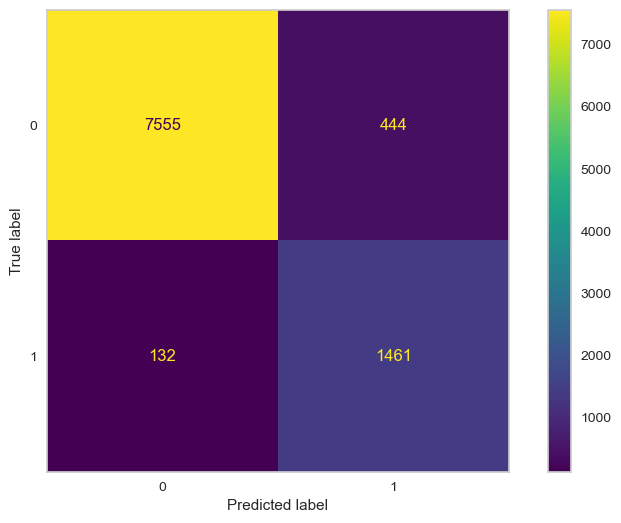

In [738]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

75/75 [==============================] - 0s 932us/step


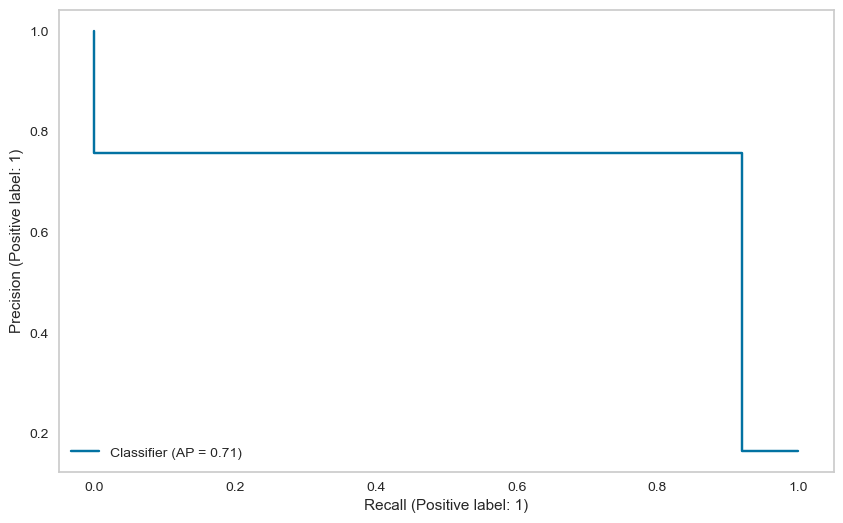

In [739]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [740]:
average_precision_score(y_test, y_pred_proba)

0.708737371207991

#### Prediction

In [741]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

300/300 [==============================] - 0s 995us/step


In [742]:
ANN_AP = average_precision_score(y_test, y_pred_proba)

ANN_f1_test = f1_score(y_test, y_pred_test)
ANN_f1_train = f1_score(y_train, y_pred_train)

ANN_recall_test = recall_score(y_test, y_pred_test)
ANN_recall_train = recall_score(y_train, y_pred_train)

ANN_AP, ANN_f1_test, ANN_f1_train, ANN_recall_test, ANN_recall_train

(0.708737371207991,
 0.8299319727891157,
 0.8353344768439108,
 0.9195979899497487,
 0.9171374764595104)

### ANN Classifier - with duplicates - without pipeline

In [743]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [744]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

#### Layer Architecture Building and Compiling without pipeline

In [745]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [746]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [747]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session() # to reset session

model = Sequential()

model.add(Dense(26, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(14, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [748]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [749]:
%%time
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=64,
          epochs=100,
          verbose=1,
          class_weight=class_weights)

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7626 - recall: 0.7225 - val_loss: 0.6624 - val_recall: 0.9216
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 0.6353 - recall: 0.8530 - val_loss: 0.5225 - val_recall: 0.9444
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 0.5262 - recall: 0.8812 - val_loss: 0.4299 - val_recall: 0.9444
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4590 - recall: 0.9032 - val_loss: 0.3784 - val_recall: 0.9379
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4210 - recall: 0.9157 - val_loss: 0.3326 - val_recall: 0.9412
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3929 - recall: 0.9189 - val_loss: 0.3279 - val_recall: 0.9379
Epoch 7/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3761 - recall: 0.9263 - val_loss: 0.3175 - val_recall: 0.9379
Epoch 8/100
169/169 [======

In [750]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [751]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
95  0.19    0.93      0.17        0.93
96  0.19    0.93      0.17        0.93
97  0.19    0.94      0.16        0.93
98  0.19    0.93      0.17        0.94
99  0.19    0.93      0.16        0.93

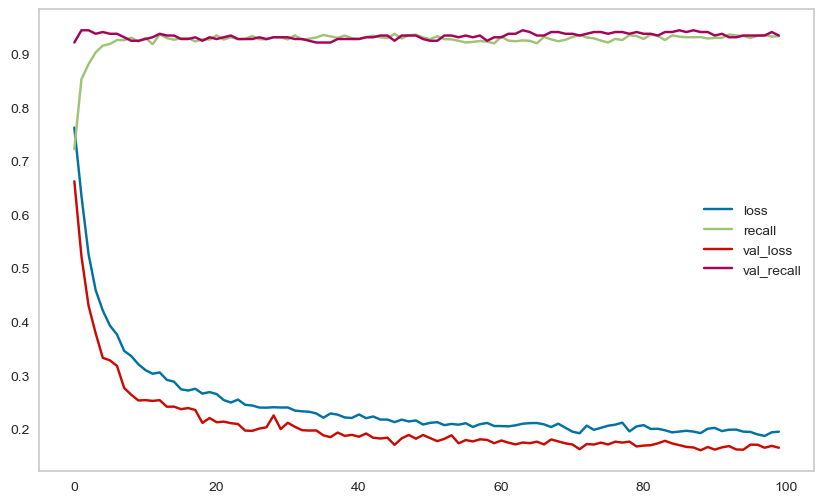

In [752]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [753]:
model.evaluate(X_test, y_test, verbose=0)

[0.17459464073181152, 0.9425770044326782]

In [754]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.17459464073181152
recall :  0.9425770044326782


375/375 [==============================] - 0s 716us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2286
           1       0.86      0.94      0.90       714

    accuracy                           0.95      3000
   macro avg       0.92      0.95      0.93      3000
weighted avg       0.95      0.95      0.95      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.89      0.95      0.92      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



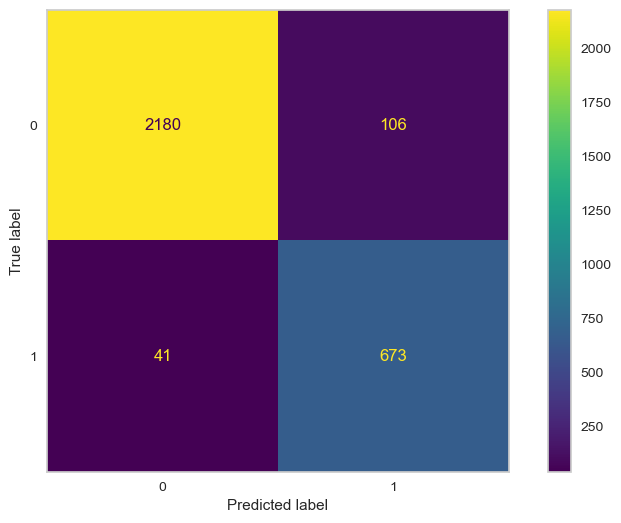

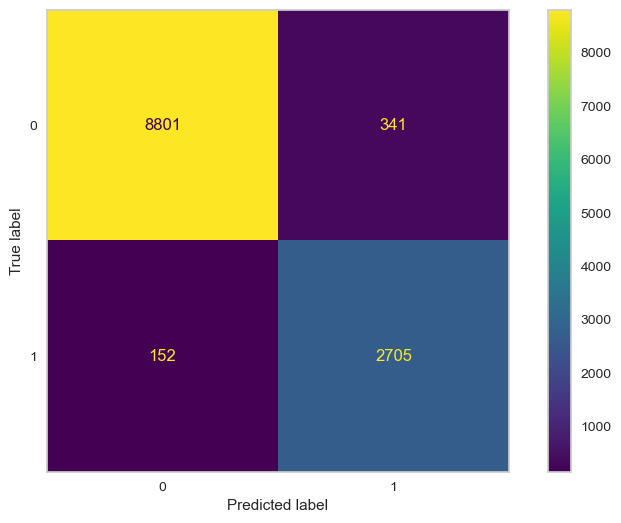

In [755]:
eval_metric_ann(model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 892us/step


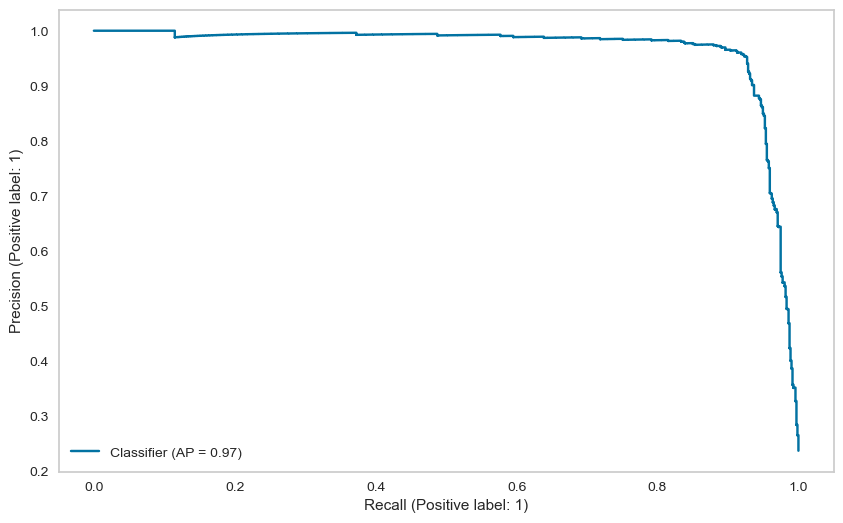

In [625]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

#### ANN Model Cross Validation

In [756]:
def build_classifier_for_CV(input_dim):
    input_dim=input_dim
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
        
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [757]:
%%time
classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_CV(input_dim=18),
                                   batch_size = 64,
                                   epochs = 100,
                                   verbose=0,
                                   class_weight = class_weights)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

338/338 [==============================] - 0s 779us/step
CPU times: total: 5min 11s
Wall time: 3min 17s


test_accuracy  train_accuracy  test_precision  train_precision  \
1            0.97            0.97            0.93             0.92   
2            0.95            0.97            0.88             0.92   
3            0.95            0.96            0.87             0.90   
4            0.95            0.96            0.84             0.89   
5            0.95            0.97            0.89             0.92   
6            0.97            0.97            0.94             0.95   
7            0.96            0.97            0.89             0.92   
8            0.96            0.97            0.91             0.94   
9            0.96            0.97            0.89             0.91   
10           0.95            0.96            0.87             0.88   

    test_recall  train_recall  test_f1  train_f1  
1          0.94          0.94     0.93      0.93  
2          0.93          0.94     0.90      0.93  
3          0.95          0.95     0.91      0.93  
4          0.94          0.95     0.89      0.92  
5          0.91          0.94     0.90      0.93  
6          0.92          0.94     0.93      0.94  
7          0.94          0.94     0.91      0.93  
8          0.91          0.94     0.91      0.94  
9          0.94          0.95     0.91      0.93  
10         0.94          0.95     0.90      0.91

In [758]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc_test", "acc_train", "pre_test", "pre_train", "rec_test", "rec_train", "f1_test", "f1_train"])

df_scores_summary

score_mean  score_std
acc_test         0.96       0.01
acc_train        0.97       0.00
pre_test         0.89       0.03
pre_train        0.91       0.02
rec_test         0.93       0.01
rec_train        0.94       0.00
f1_test          0.91       0.01
f1_train         0.93       0.01

#### ANN Model GridSearchCV

In [759]:
# defining a model function for GridSearchCV

def build_classifier_for_GSCV(optimizer, learn_rate):
    
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [760]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [761]:
%%time
classifier_model = KerasClassifier(build_fn = build_classifier_for_GSCV,
                                   validation_split = 0.1,
                                   epochs = 100,
                                   class_weight = class_weights)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Epoch 1/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5545 - recall: 0.8636 - val_loss: 0.3292 - val_recall: 0.9052
Epoch 2/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3554 - recall: 0.8989 - val_loss: 0.2733 - val_recall: 0.9216
Epoch 3/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3045 - recall: 0.9138 - val_loss: 0.2472 - val_recall: 0.9183
Epoch 4/100
338/338 [==============================] - 0s 1ms/step - loss: 0.2799 - recall: 0.9204 - val_loss: 0.2355 - val_recall: 0.9216
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.2701 - recall: 0.9142 - val_loss: 0.2233 - val_recall: 0.9183
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.2543 - recall: 0.9208 - val_loss: 0.1881 - val_recall: 0.9118
Epoch 7/100
338/338 [==============================] - 0s 1ms/step - loss: 0.2494 - recall: 0.9216 - val_loss: 0.1888 - val_recall: 0.9183
Epoch 8/100
338/338 [======

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001303E4A0730>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall')

In [762]:
grid_model.best_score_

0.9251530228194215

In [763]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [764]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
2              0.93            0.01                1   
6              0.92            0.01                2   
1              0.92            0.01                3   
8              0.92            0.01                4   
0              0.92            0.01                5   
10             0.92            0.01                6   
7              0.92            0.01                7   
4              0.92            0.02                8   
5              0.92            0.02                9   
9              0.92            0.01               10   
3              0.91            0.02               11   
11             0.91            0.02               12   

                                               params  
2   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
6   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
1   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
8   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
0   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
10  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
7   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
4   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
5   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
9   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
3   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
11  {'batch_size': 64, 'learn_rate': 0.005, 'optim...

375/375 [==============================] - 0s 667us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.88      0.93      0.90       714

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9142
           1       0.90      0.92      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



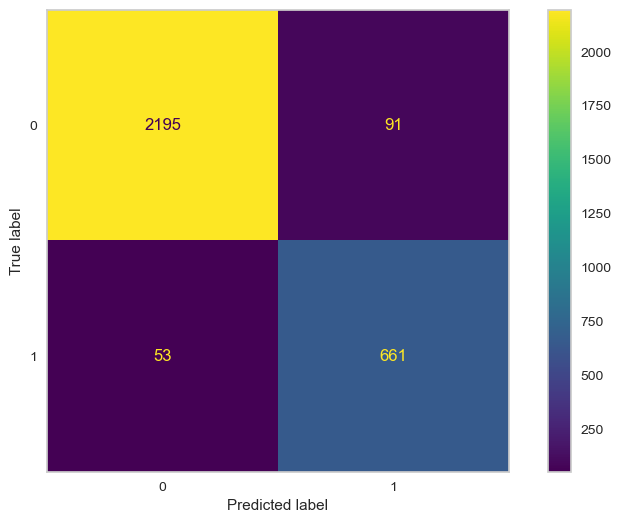

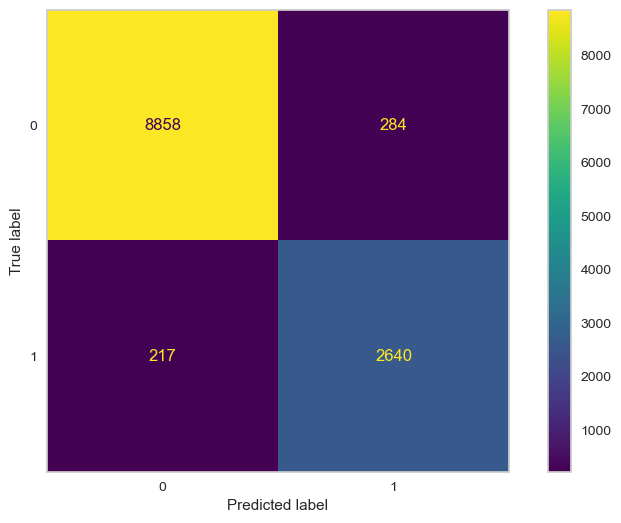

In [765]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 735us/step


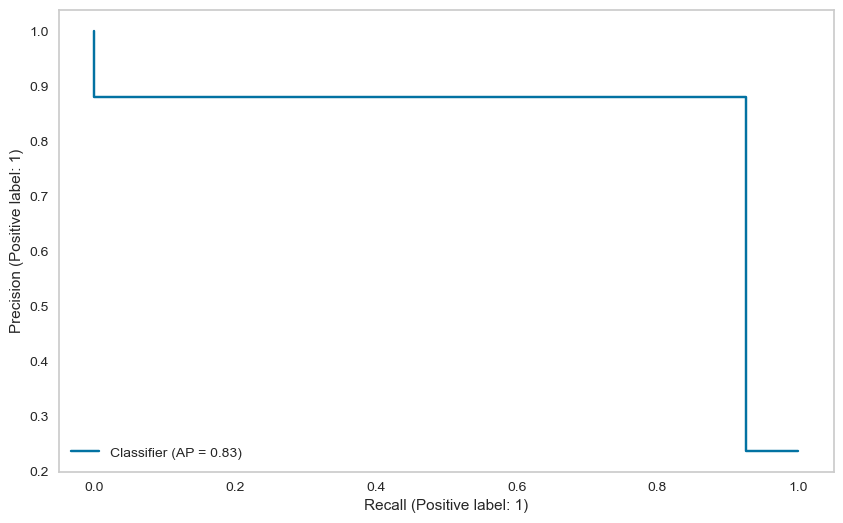

In [766]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [767]:
average_precision_score(y_test, y_pred_proba)

0.8314089188867037

#### Prediction

In [768]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

375/375 [==============================] - 0s 707us/step


In [769]:
ANN_AP = average_precision_score(y_test, y_pred_proba)

ANN_f1_test = f1_score(y_test, y_pred_test)
ANN_f1_train = f1_score(y_train, y_pred_train)

ANN_recall_test = recall_score(y_test, y_pred_test)
ANN_recall_train = recall_score(y_train, y_pred_train)

ANN_AP, ANN_f1_test, ANN_f1_train, ANN_recall_test, ANN_recall_train

(0.8314089188867037,
 0.9017735334242838,
 0.9133367929423976,
 0.9257703081232493,
 0.9240462023101155)

### ANN Classifier with Pipeline - without duplicates

In [142]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [772]:
# Defining a function for ANN model creation - way 1

def create_ann_model(input_dim):
    input_dim = input_dim
    import tensorflow as tf
    from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
#     from keras.optimizers import Adam, Nadam, RMSprop, Nadam
    tf.keras.backend.clear_session()
    tf.random.set_seed(101)
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim = input_dim))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [773]:
# Defining a function for ANN model creation - way 2

def create_ann_model(input_dim):
    input_dim = input_dim
    
    import tensorflow as tf
    from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
            
    model = Sequential()
    model.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 14, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))
       
    model.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = ['Recall'])
    return model

In [774]:
model = create_ann_model(input_dim=18)

operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", model)]

ANN_pipe_model = Pipeline(steps=operations)

In [775]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 3, restore_best_weights=True)

In [776]:
%%time
ANN_pipe_model.fit(X_train, y_train,
                   ANN_model__validation_split = 0.1,
                   ANN_model__batch_size = 64,
                   ANN_model__epochs = 100,
#                    ANN_model__verbose = 1,
                   ANN_model__callbacks = [early_stop],
                   ANN_model__class_weight=class_weights)

Epoch 1/100
135/135 [==============================] - 1s 2ms/step - loss: 0.6711 - recall: 0.6261 - val_loss: 0.6202 - val_recall: 0.8364
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 0.6124 - recall: 0.7542 - val_loss: 0.5033 - val_recall: 0.8727
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5435 - recall: 0.8333 - val_loss: 0.4229 - val_recall: 0.8909
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4837 - recall: 0.8676 - val_loss: 0.3998 - val_recall: 0.9455
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4171 - recall: 0.8782 - val_loss: 0.3494 - val_recall: 0.9455
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3940 - recall: 0.8725 - val_loss: 0.3054 - val_recall: 0.9455
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3648 - recall: 0.8782 - val_loss: 0.2954 - val_recall: 0.9333
Epoch 8/100
135/135 [======

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('ANN_model',
                 <keras.engine.sequential.Sequential object at 0x000001302F67B970>)])

In [777]:
ANN_pipe_model["ANN_model"].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [778]:
loss_df = pd.DataFrame(ANN_pipe_model["ANN_model"].history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
12  0.27    0.90      0.21        0.91
13  0.27    0.90      0.20        0.90
14  0.26    0.90      0.23        0.92
15  0.25    0.91      0.20        0.90
16  0.24    0.90      0.21        0.91

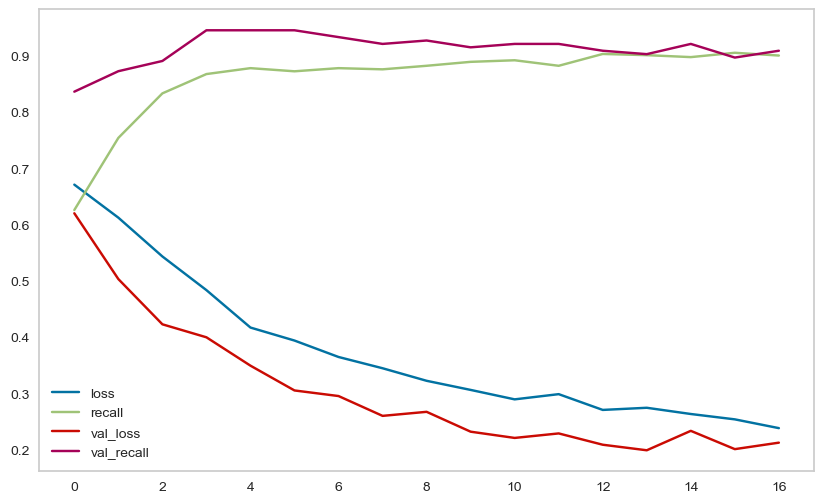

In [779]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [780]:
ANN_pipe_model["ANN_model"].evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)  # Eğer pipeline modeli oluşturduysanız model.evaluate() metodu içine encoder ve scaler işlemleri uygulanmış veri girilmelidir.

[0.1922437995672226, 0.9170854091644287]

In [781]:
loss, recall = model.evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.1922437995672226
recall :  0.9170854091644287


In [782]:
print("Test result :", ANN_pipe_model[-1].evaluate((ANN_pipe_model[:-1].transform(X_test)), y_test, verbose=0, return_dict=1),
      "Train result :", ANN_pipe_model[-1].evaluate((ANN_pipe_model[:-1].transform(X_train)), y_train, verbose=0, return_dict=1), sep='\n')

Test result :
{'loss': 0.1922437995672226, 'recall': 0.9170854091644287}
Train result :
{'loss': 0.17672216892242432, 'recall': 0.9202762246131897}


300/300 [==============================] - 0s 684us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2001
           1       0.79      0.92      0.85       398

    accuracy                           0.95      2399
   macro avg       0.89      0.93      0.91      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7999
           1       0.81      0.92      0.86      1593

    accuracy                           0.95      9592
   macro avg       0.89      0.94      0.91      9592
weighted avg       0.95      0.95      0.95      9592



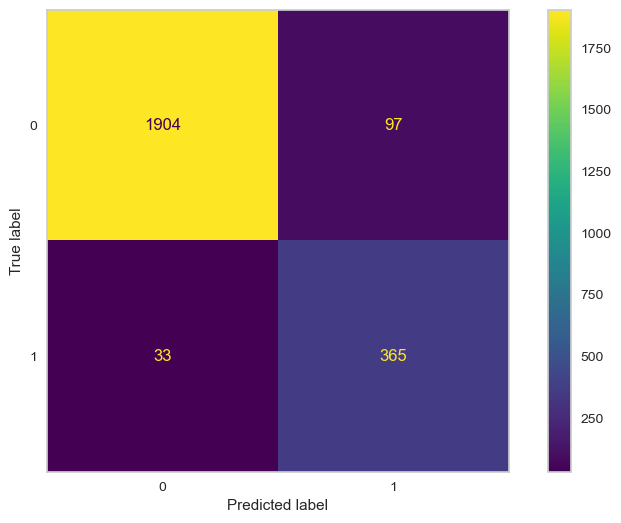

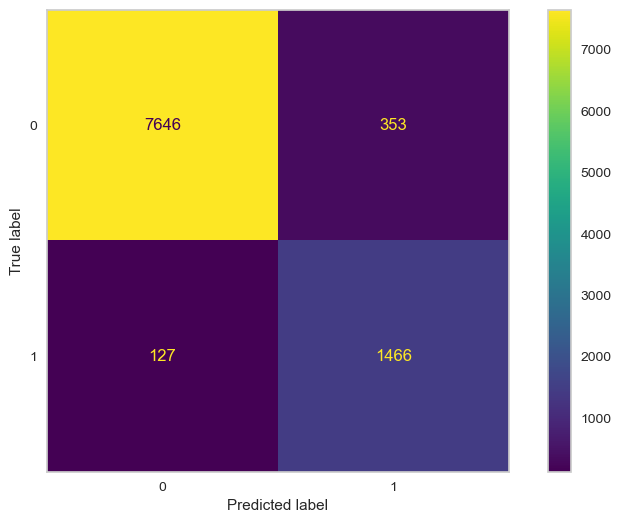

In [783]:
eval_metric_ann(ANN_pipe_model, X_train, y_train, X_test, y_test)

75/75 [==============================] - 0s 868us/step


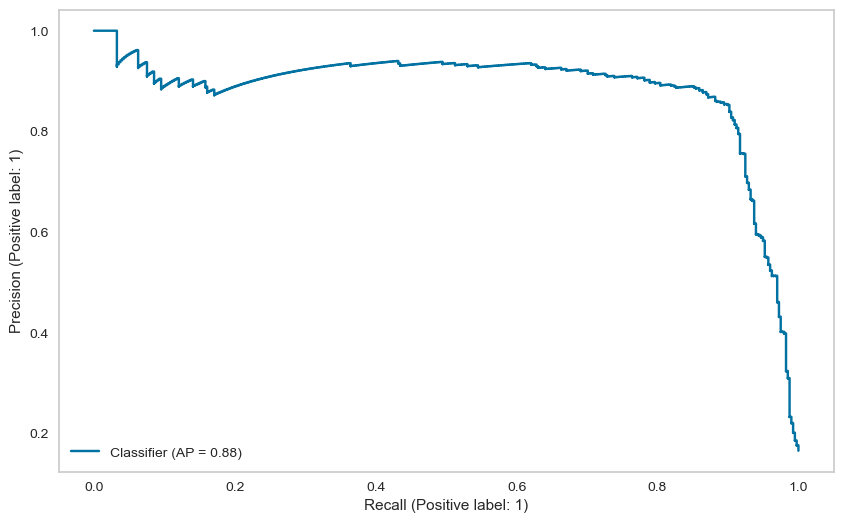

In [784]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = ANN_pipe_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
# As we get greater eval metric with data contains duplicates, we will not implement cross validation and grid search here.

### ANN Classifier with Pipeline - with duplicates

In [144]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [146]:
# Defining a function for ANN model creation

def create_ann_model(input_dim):
    input_dim = input_dim
    
#     import tensorflow as tf
    from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
            
    model = Sequential()
    model.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 14, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = ['Recall'])
    return model

In [147]:
model = create_ann_model(input_dim=18)

operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", model)]

ANN_pipe_model = Pipeline(steps=operations) 

In [789]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 3, restore_best_weights=True)

In [790]:
%%time
ANN_pipe_model.fit(X_train, y_train,
                   ANN_model__validation_split = 0.1,
                   ANN_model__batch_size = 64,
                   ANN_model__epochs = 100,
#                    ANN_model__verbose = 1,
                   ANN_model__callbacks = [early_stop],
                   ANN_model__class_weight=class_weights)

Epoch 1/100
169/169 [==============================] - 1s 2ms/step - loss: 0.6851 - recall: 0.8310 - val_loss: 0.5988 - val_recall: 0.9314
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 0.5715 - recall: 0.8459 - val_loss: 0.4963 - val_recall: 0.9379
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4828 - recall: 0.8636 - val_loss: 0.4029 - val_recall: 0.9281
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4159 - recall: 0.8769 - val_loss: 0.3318 - val_recall: 0.9118
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3722 - recall: 0.8938 - val_loss: 0.3048 - val_recall: 0.9216
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3451 - recall: 0.9036 - val_loss: 0.2815 - val_recall: 0.9183
Epoch 7/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3260 - recall: 0.9094 - val_loss: 0.2701 - val_recall: 0.9216
Epoch 8/100
169/169 [======

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('ANN_model',
                 <keras.engine.sequential.Sequential object at 0x000001301F219CA0>)])

In [791]:
ANN_pipe_model["ANN_model"].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [792]:
loss_df = pd.DataFrame(ANN_pipe_model["ANN_model"].history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
19  0.24    0.92      0.18        0.92
20  0.24    0.92      0.18        0.92
21  0.24    0.92      0.18        0.92
22  0.23    0.92      0.18        0.92
23  0.24    0.92      0.18        0.93

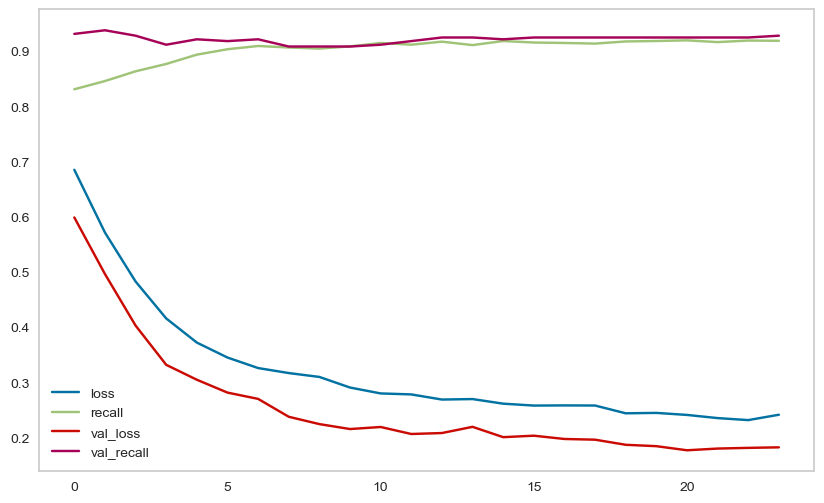

In [793]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [794]:
ANN_pipe_model["ANN_model"].evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)  # Eğer pipeline modeli oluşturduysanız model.evaluate() metodu içine encoder ve scaler işlemleri uygulanmış veri girilmelidir.

[0.18168731033802032, 0.9313725233078003]

In [795]:
loss, recall = model.evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.18168731033802032
recall :  0.9313725233078003


375/375 [==============================] - 0s 724us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.88      0.93      0.90       714

    accuracy                           0.95      3000
   macro avg       0.93      0.95      0.94      3000
weighted avg       0.95      0.95      0.95      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9142
           1       0.90      0.93      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



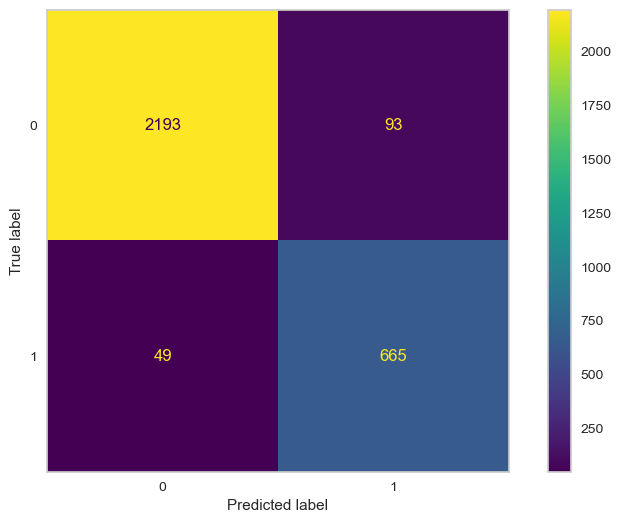

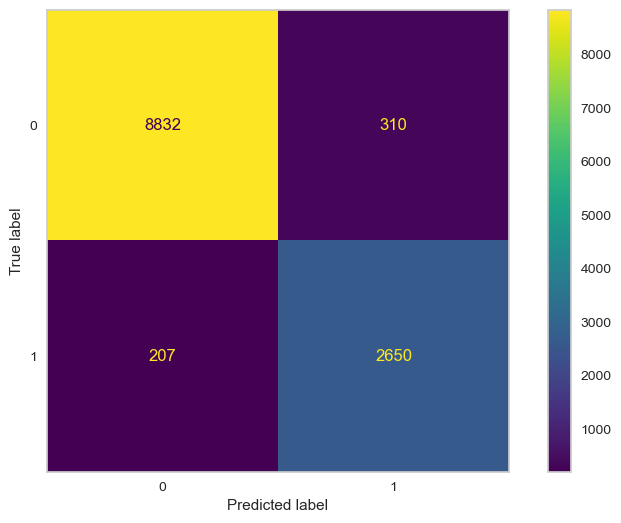

In [796]:
eval_metric_ann(ANN_pipe_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 800us/step


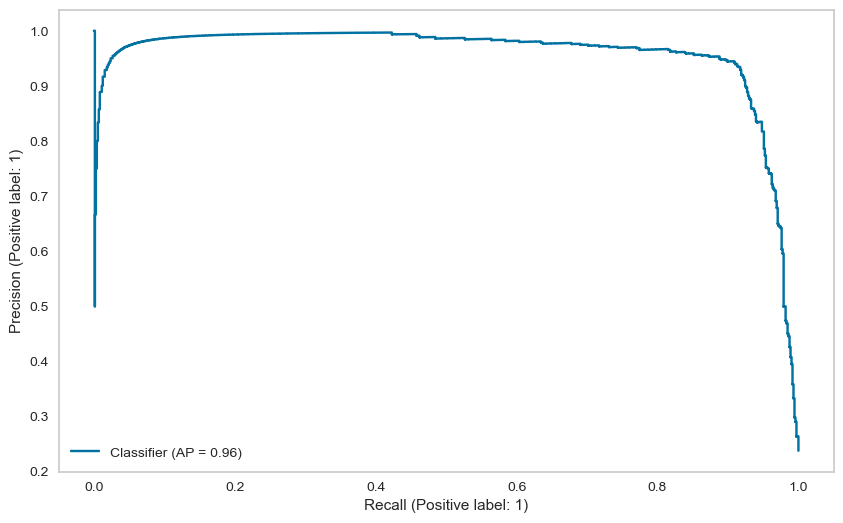

In [797]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = ANN_pipe_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

#### ANN Pipe Model Cross Validation

In [815]:
def build_classifier_for_CV(input_dim):
    
    tf.keras.backend.clear_session()
    input_dim=input_dim
    tf.random.set_seed(seed)
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [816]:
# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier

classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_CV(input_dim=18),
                             validation_split = 0.1,
                             batch_size = 64,
                             epochs = 100,
                             verbose=1,
                             callbacks = [early_stop], class_weight = class_weights,
)

operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", classifier_model)]

ANN_pipe_CV = Pipeline(steps=operations)


scores = cross_validate(ANN_pipe_CV, X_train, y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        return_train_score=True,
                        error_score="raise",
                        n_jobs=-1,
                        cv=10)  # fit_params={"ann__sample_weight":sample_weight}


df_scores = pd.DataFrame.from_dict(scores, orient='columns')

df_scores.mean()[2:]

test_accuracy     0.94
train_accuracy    0.95
test_precision    0.85
train_precision   0.85
test_recall       0.93
train_recall      0.94
test_f1           0.89
train_f1          0.89
dtype: float64

#### ANN Pipe Model GridSearchCV

In [817]:
# defining a model function for GridSearchCV

def build_classifier_for_GSCV(input_dim):
    input_dim= input_dim
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', weighted_metrics = ['Recall'])
    return classifier

In [818]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [819]:
%%time
classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_GSCV(input_dim=18) ,
                                   validation_split = 0.1,
                                   batch_size = 64,
                                   epochs = 100,
                                   callbacks = [early_stop],
                                   class_weight = class_weights)


operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", classifier_model)]

ANN_pipe_GSCV = Pipeline(steps=operations)


parameters = {'ANN_model__batch_size': [32, 64],
              'ANN_model__optimizer': ["Adam", "RMSprop"],  # "Adadelta", "Nadam"
              'ANN_model__optimizer__learning_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = ANN_pipe_GSCV,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train)

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7449 - recall: 0.7550 - val_loss: 0.6458 - val_recall: 0.8529
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 0.5947 - recall: 0.8769 - val_loss: 0.4928 - val_recall: 0.9346
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4995 - recall: 0.9075 - val_loss: 0.4115 - val_recall: 0.9510
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4323 - recall: 0.9310 - val_loss: 0.3615 - val_recall: 0.9444
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3908 - recall: 0.9341 - val_loss: 0.3294 - val_recall: 0.9412
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3681 - recall: 0.9314 - val_loss: 0.2973 - val_recall: 0.9444
Epoch 7/100
169/169 [==============================] - 0s 2ms/step - loss: 0.3382 - recall: 0.9287 - val_loss: 0.2841 - val_recall: 0.9379
Epoch 8/100
169/169 [======

169/169 [==============================] - 0s 2ms/step - loss: 0.2266 - recall: 0.9236 - val_loss: 0.2117 - val_recall: 0.9248
Epoch 34/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2278 - recall: 0.9216 - val_loss: 0.2111 - val_recall: 0.9281
Epoch 35/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2208 - recall: 0.9247 - val_loss: 0.2072 - val_recall: 0.9281
Epoch 36/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2191 - recall: 0.9224 - val_loss: 0.2075 - val_recall: 0.9281
Epoch 37/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2196 - recall: 0.9212 - val_loss: 0.2065 - val_recall: 0.9216
Epoch 38/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2191 - recall: 0.9200 - val_loss: 0.2072 - val_recall: 0.9281
Epoch 39/100
169/169 [==============================] - 0s 2ms/step - loss: 0.2202 - recall: 0.9228 - val_loss: 0.2060 - val_recall: 0.9216
Epoch 40/100
169/169 [===========

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('ANN_model',
                                        KerasClass...00001301F213040>, callbacks=[<keras.callbacks.EarlyStopping object at 0x000001303E5E7CD0>], class_weight={0: 0.5995749468683585, 1: 3.01067168863779}, epochs=100, validation_split=0.1))]),
             n_jobs=-1,
             param_grid={'ANN_model__batch_size': [32, 64],
                         'ANN_model__optimizer': ['Adam', 'RMSprop'],
                         'ANN_model__optimizer__learning_rate': [0.001, 0.003,
                                                                 0.005]},
             scoring='recall')

In [820]:
grid_model.best_score_

0.9286013986013986

In [821]:
grid_model.best_params_

{'ANN_model__batch_size': 64,
 'ANN_model__optimizer': 'RMSprop',
 'ANN_model__optimizer__learning_rate': 0.003}

In [822]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
10             0.93            0.01                1   
8              0.93            0.01                2   
11             0.93            0.01                3   
0              0.93            0.01                4   
2              0.93            0.01                5   
6              0.93            0.01                6   
4              0.93            0.01                7   
7              0.93            0.02                8   
5              0.93            0.02                9   
1              0.93            0.01               10   
3              0.92            0.01               11   
9              0.92            0.01               12   

                                               params  
10  {'ANN_model__batch_size': 64, 'ANN_model__opti...  
8   {'ANN_model__batch_size': 64, 'ANN_model__opti...  
11  {'ANN_model__batch_size': 64, 'ANN_model__opti...  
0   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
2   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
6   {'ANN_model__batch_size': 64, 'ANN_model__opti...  
4   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
7   {'ANN_model__batch_size': 64, 'ANN_model__opti...  
5   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
1   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
3   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
9   {'ANN_model__batch_size': 64, 'ANN_model__opti...

188/188 [==============================] - 0s 771us/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2286
           1       0.86      0.94      0.90       714

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.89      0.94      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.93      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



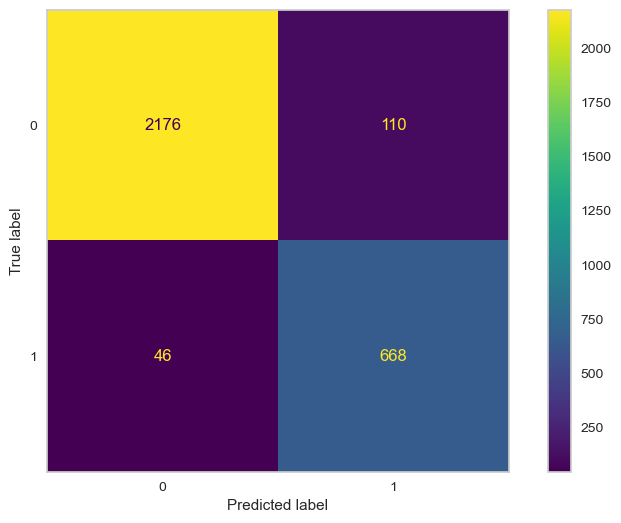

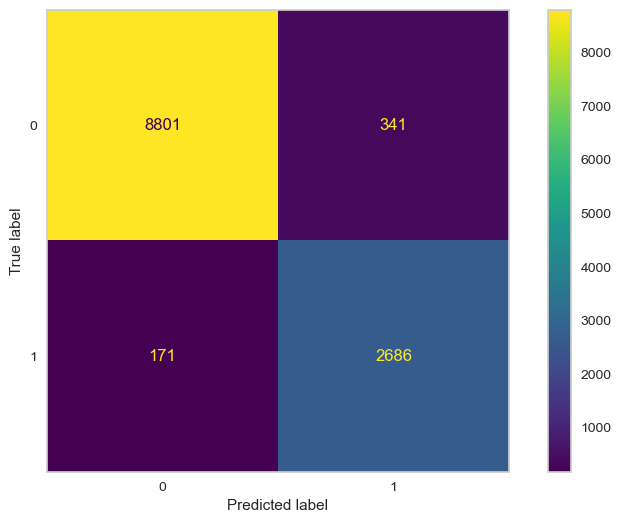

In [823]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

47/47 [==============================] - 0s 801us/step


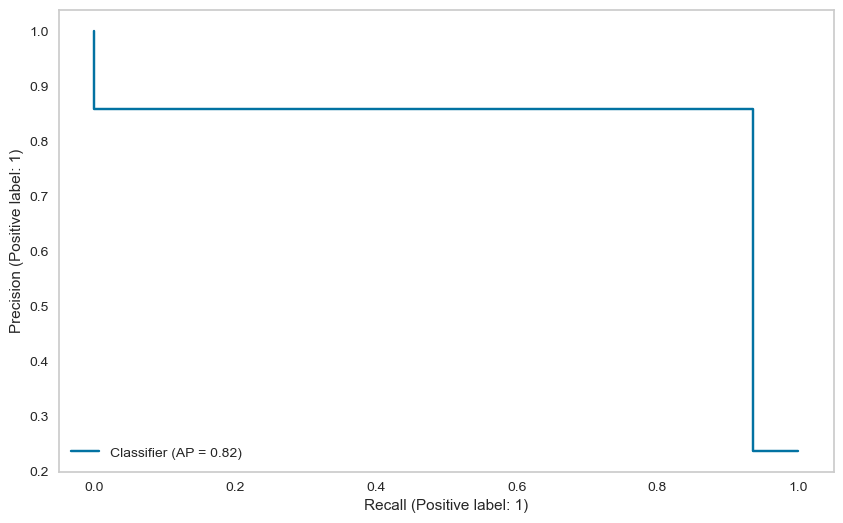

In [824]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [825]:
average_precision_score(y_test, y_pred_proba)

0.8186284302924255

#### ANN Pipe Model GridSearchCV

In [193]:
# defining a model function for GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

def build_classifier_for_GSCV(input_dim, optimizer, learn_rate):
#     input_dim= input_dim
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', weighted_metrics = ['Recall'])
    return classifier

In [194]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [195]:
%%time

classifier_model = KerasClassifier(model = build_classifier_for_GSCV ,
                                   input_dim= 18,
                                   validation_split = 0.1,
                                   epochs = 100,
                                   callbacks = [early_stop],
                                   class_weight = class_weights)


operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", classifier_model)]

ANN_pipe_GSCV = Pipeline(steps=operations)


parameters = {'ANN_model__batch_size': [32, 64],
              'ANN_model__model__optimizer': [Adam, RMSprop],  # "Adadelta", "Nadam"
              'ANN_model__model__learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = ANN_pipe_GSCV,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train)

Epoch 1/100
338/338 [==============================] - 1s 3ms/step - loss: 0.5298 - recall: 0.8934 - val_loss: 0.3027 - val_recall: 0.9379
Epoch 2/100
338/338 [==============================] - 1s 2ms/step - loss: 0.3279 - recall: 0.9145 - val_loss: 0.2730 - val_recall: 0.9314
Epoch 3/100
338/338 [==============================] - 1s 2ms/step - loss: 0.2997 - recall: 0.9224 - val_loss: 0.2514 - val_recall: 0.9281
Epoch 4/100
338/338 [==============================] - 1s 2ms/step - loss: 0.2706 - recall: 0.9243 - val_loss: 0.2401 - val_recall: 0.9314
Epoch 5/100
338/338 [==============================] - 1s 2ms/step - loss: 0.2653 - recall: 0.9243 - val_loss: 0.2374 - val_recall: 0.9248
Epoch 6/100
338/338 [==============================] - 1s 2ms/step - loss: 0.2502 - recall: 0.9263 - val_loss: 0.2376 - val_recall: 0.9314
Epoch 7/100
338/338 [==============================] - 1s 2ms/step - loss: 0.2460 - recall: 0.9267 - val_loss: 0.2325 - val_recall: 0.9248
Epoch 8/100
338/338 [======

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('ANN_model',
                                        KerasClass...=18, model=<function build_classifier_for_GSCV at 0x0000019A806B3430>, validation_split=0.1))]),
             n_jobs=-1,
             param_grid={'ANN_model__batch_size': [32, 64],
                         'ANN_model__model__learn_rate': [0.001, 0.003, 0.005],
                         'ANN_model__model__optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                                         <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall')

In [196]:
grid_model.best_score_

0.9313973745552693

In [197]:
grid_model.best_params_

{'ANN_model__batch_size': 32,
 'ANN_model__model__learn_rate': 0.005,
 'ANN_model__model__optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [198]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
4              0.93            0.02                1   
0              0.93            0.01                2   
2              0.93            0.02                3   
6              0.93            0.01                4   
10             0.93            0.01                5   
7              0.92            0.01                6   
8              0.92            0.01                7   
5              0.92            0.01                8   
11             0.92            0.01                9   
9              0.92            0.01               10   
3              0.92            0.02               11   
1              0.91            0.01               12   

                                               params  
4   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
0   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
2   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
6   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
10  {'ANN_model__batch_size': 64, 'ANN_model__mode...  
7   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
8   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
5   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
11  {'ANN_model__batch_size': 64, 'ANN_model__mode...  
9   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
3   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
1   {'ANN_model__batch_size': 32, 'ANN_model__mode...

375/375 [==============================] - 0s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2286
           1       0.87      0.94      0.90       714

    accuracy                           0.95      3000
   macro avg       0.92      0.95      0.93      3000
weighted avg       0.95      0.95      0.95      3000



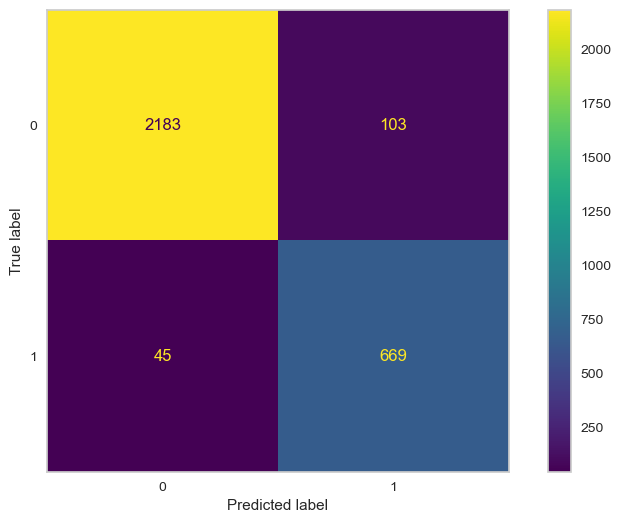




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.89      0.93      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.93      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



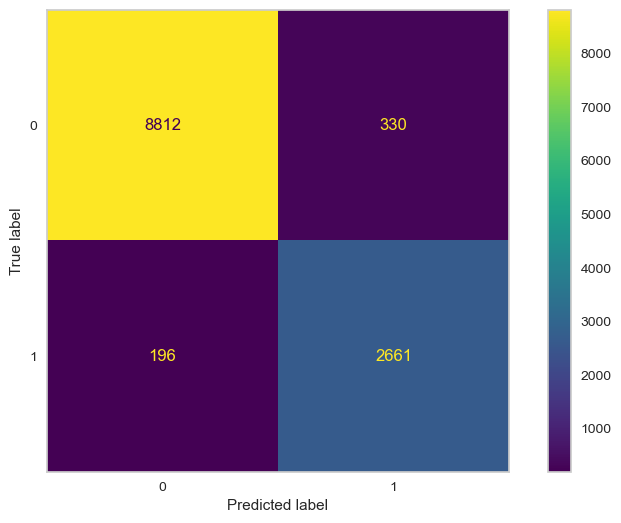

In [199]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 1ms/step


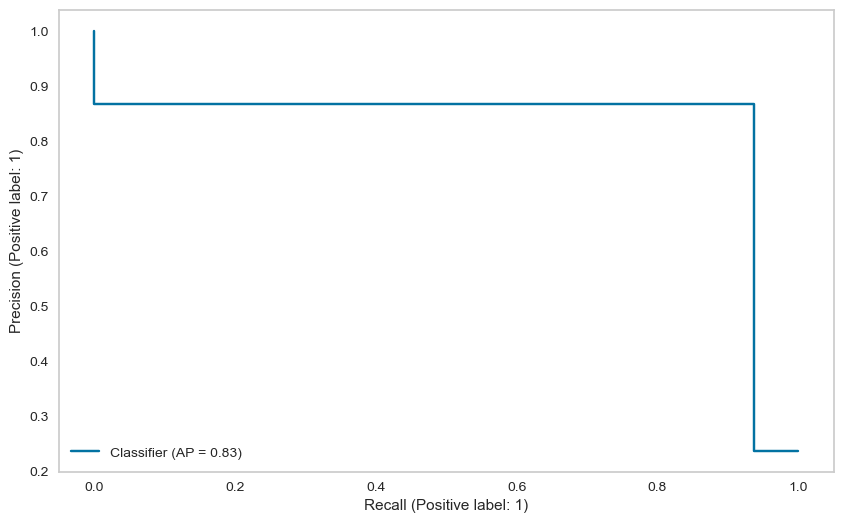

In [200]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [201]:
average_precision_score(y_test, y_pred_proba)

0.8269639047328776

#### Prediction

In [202]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

375/375 [==============================] - 0s 977us/step


In [203]:
ANN_AP = average_precision_score(y_test, y_pred_proba)

ANN_f1_test = f1_score(y_test, y_pred_test)
ANN_f1_train = f1_score(y_train, y_pred_train)

ANN_recall_test = recall_score(y_test, y_pred_test)
ANN_recall_train = recall_score(y_train, y_pred_train)

ANN_AP, ANN_f1_test, ANN_f1_train, ANN_recall_test, ANN_recall_train

(0.8269639047328776,
 0.9004037685060565,
 0.9100547195622434,
 0.9369747899159664,
 0.9313965698284914)

### Model Comparision

In [204]:
compare = pd.DataFrame({"Model": ["SVC", "KNN", "Random Forest", "XGBoost", "ANN"],
                        
                        "F1_Score": [KNN_f1_test, SVC_f1_test,  RF_f1_test,  XGB_f1_test, ANN_f1_test],
                        
                        "Recall_Score": [KNN_recall_test, SVC_recall_test, RF_recall_test, XGB_recall_test, ANN_recall_test],
                        
                        "Average_Precision_Score": [SVC_AP, KNN_AP, RF_AP, XGB_AP, ANN_AP]})




plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

NameError: name 'KNN_f1_test' is not defined

### Final Model

**As we get the better model metrics with Random Forest model, we decided to use it as final model.**

In [163]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [164]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['departments', 'salary']

In [165]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(max_depth=10, n_estimators=10, class_weight="balanced", random_state=101))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=10, random_state=101))])

In [166]:
X.describe()

satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  work_accident  \
count              14999.00            14999.00       14999.00   
mean                 201.05                3.50           0.14   
std                   49.94                1.46           0.35   
min                   96.00                2.00           0.00   
25%                  156.00                3.00           0.00   
50%                  200.00                3.00           0.00   
75%                  245.00                4.00           0.00   
max                  310.00               10.00           1.00   

       promotion_last_5years  
count               14999.00  
mean                    0.02  
std                     0.14  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.00

In [167]:
X.describe(include="O")

departments salary
count        14999  14999
unique          10      3
top          sales    low
freq          4140   7316

In [168]:
my_dict = {
    "satisfaction_level": 0.64,
    "last_evaluation": 0.4,
    "number_project": 4,
    "average_montly_hours": 200,
    "time_spend_company": 3,
    "work_accident": 1,
    "promotion_last_5years": 0,
    "departments": "sales",
    "salary": "medium"
    
}

new_obs = pd.DataFrame([my_dict])
new_obs

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.64             0.40               4                   200   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              1                      0       sales   

   salary  
0  medium

In [169]:
final_model.predict(new_obs)

array([0], dtype=int64)

#### Feature Importance of Final Model

In [170]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns)
features

['departments',
 'salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years']

In [173]:
# 2nd way

# features = final_model["OrdinalEncoder"].get_feature_names_out()
# features

array(['onehotencoder__departments_IT',
       'onehotencoder__departments_RandD',
       'onehotencoder__departments_accounting',
       'onehotencoder__departments_hr',
       'onehotencoder__departments_management',
       'onehotencoder__departments_marketing',
       'onehotencoder__departments_product_mng',
       'onehotencoder__departments_sales',
       'onehotencoder__departments_support',
       'onehotencoder__departments_technical', 'ordinalencoder__salary',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_montly_hours',
       'remainder__time_spend_company', 'remainder__work_accident',
       'remainder__promotion_last_5years'], dtype=object)

In [102]:
final_model[-1].feature_importances_

array([0.00374517, 0.00925891, 0.31359451, 0.12760732, 0.12734634,
       0.15333221, 0.25522903, 0.00849635, 0.00139016])

In [103]:
np.argsort(final_model[-1].feature_importances_)

array([8, 0, 7, 1, 4, 3, 5, 6, 2], dtype=int64)

In [104]:
df_f_i = pd.DataFrame(data = final_model[-1].feature_importances_, index=features,
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

Feature Importance
satisfaction_level                   0.31
time_spend_company                   0.26
average_montly_hours                 0.15
last_evaluation                      0.13
number_project                       0.13
salary                               0.01
work_accident                        0.01
departments                          0.00
promotion_last_5years                0.00

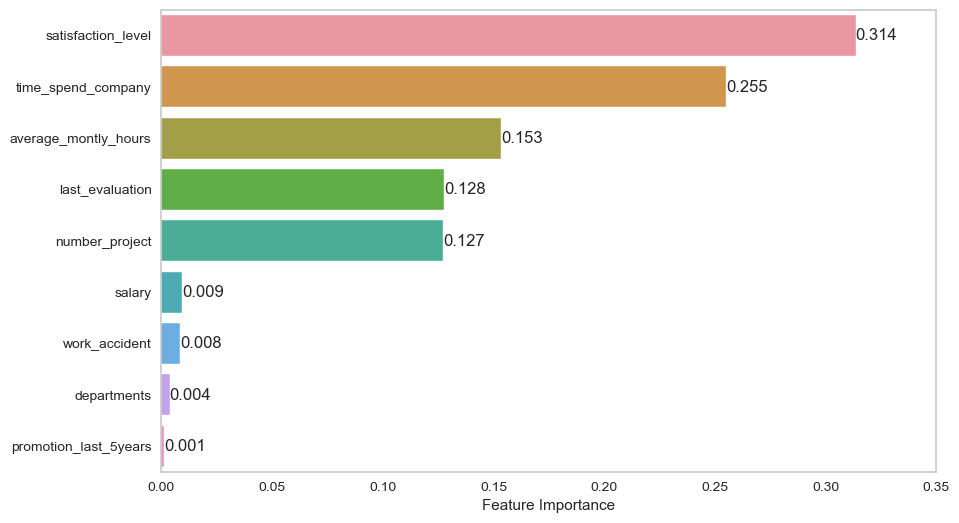

In [107]:
ax =sns.barplot(x = 'Feature Importance', y = df_f_i.index,  data = df_f_i)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xlim(right=0.35)
plt.show()

### Rebuilding Final Model with Most Important Features

In [109]:
X = X[["satisfaction_level", "time_spend_company", "average_montly_hours", "last_evaluation", "number_project"]]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [111]:
X_train.head()

satisfaction_level  time_spend_company  average_montly_hours  \
9355                 0.70                   3                   168   
8808                 0.33                   3                   280   
11737                0.69                   6                   215   
8741                 0.50                   3                   142   
2143                 0.88                   4                   157   

       last_evaluation  number_project  
9355              0.66               4  
8808              0.95               4  
11737             0.66               3  
8741              0.67               2  
2143              0.68               5

In [112]:
# Reset Final Model

final_model = RandomForestClassifier(max_depth=10, n_estimators=10, class_weight="balanced", random_state=101)
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       random_state=101)

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.98      0.95      0.97       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



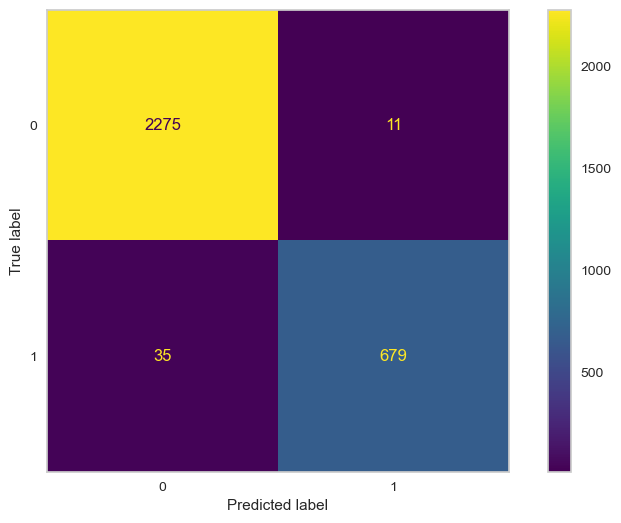




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.96      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



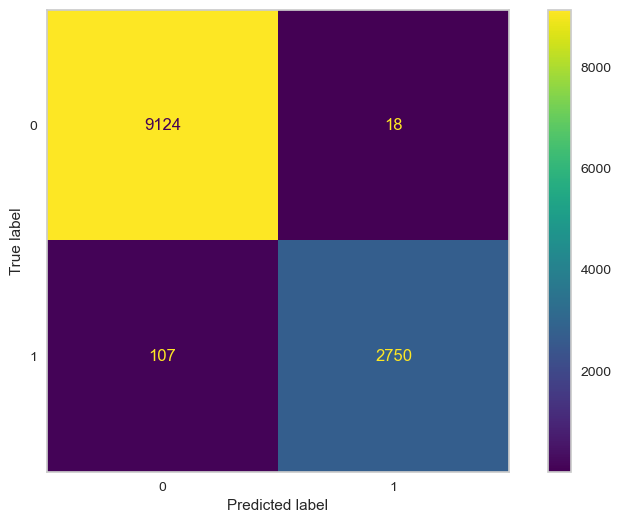

In [119]:
eval_metric(final_model, X_train, y_train, X_test, y_test)

In [116]:
model = RandomForestClassifier(max_depth=10, n_estimators=10, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time          0.05
score_time        0.00
test_precision    0.99
train_precision   0.99
test_recall       0.95
train_recall      0.97
test_f1           0.97
train_f1          0.98
test_accuracy     0.98
train_accuracy    0.99
dtype: float64

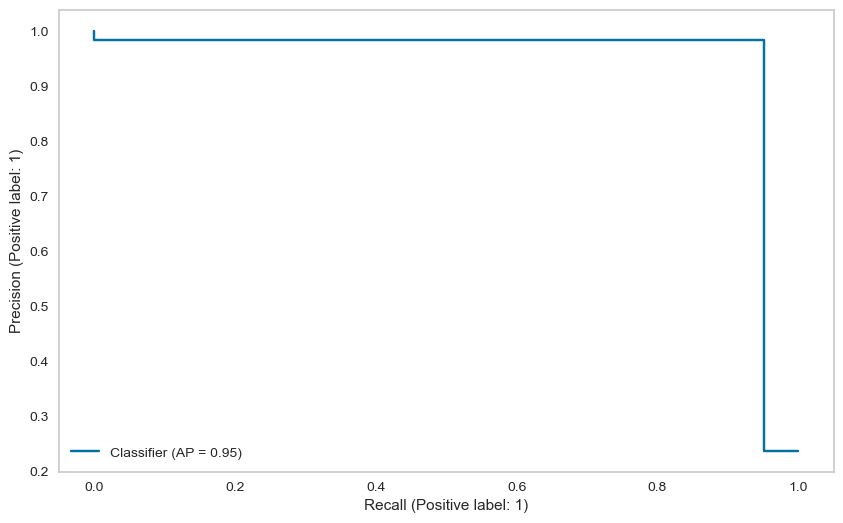

In [120]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = final_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

**When we build final model with the most important features, the evaluation metrics of the model was almost the same with we get from original model. So we decided to build final model with the most important features.**

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

In [121]:
X = df_with_dp[["satisfaction_level", "time_spend_company", "average_montly_hours", "last_evaluation", "number_project"]]
y = df_with_dp.left

In [123]:
final_model = RandomForestClassifier(max_depth=10, n_estimators=10, class_weight="balanced", random_state=101)

final_model.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       random_state=101)

In [124]:
# Savinf final model

import pickle
pickle.dump(final_model, open("final_model_employee_churn", 'wb'))

In [125]:
# Exporting final model

import pickle
model = pickle.load(open("final_model_employee_churn", "rb"))

In [126]:
model

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       random_state=101)

In [129]:
my_dict = {
    "satisfaction_level": 0.64,
    "time_spend_company": 3,
    "average_montly_hours": 200,
    "last_evaluation": 0.4,
    "number_project": 4,
    }

new_obs = pd.DataFrame([my_dict])
new_obs

satisfaction_level  time_spend_company  average_montly_hours  \
0                0.64                   3                   200   

   last_evaluation  number_project  
0             0.40               4

In [130]:
model.predict(new_obs)

array([0], dtype=int64)

### Save and Export Variables


In [941]:
df_with_dp[df_with_dp.left==1].iloc[1]  # left employee

satisfaction_level         0.80
last_evaluation            0.86
number_project                5
average_montly_hours        262
time_spend_company            6
work_accident                 0
left                          1
promotion_last_5years         0
departments               sales
salary                   medium
Name: 1, dtype: object

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___